NameError: name 'sys' is not defined

In [1]:
# Appending the directory containing your `python_startup` file, with credentials filled out
import sys
sys.path.append('/Users/Myers/Documents/GitHub/myers2022/Python/Jupyter/python_startup.py')
from python_startup import * 

from tqdm import tqdm
from collections import Counter

In /Users/Myers/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Myers/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Myers/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/Myers/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/Myers/opt/miniconda3/lib/pytho

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


Loading BokehJS ...

In [97]:
p

NameError: name 'p' is not defined

# Calculation of multi-step effective connectivity, from adult MB FIB paper

* In several analyses, we computed the “effective” connectivity through multi-synaptic pathways between a set of source and target neurons: Figure 10-figure supplement 2; Figure 11-figure supplement 1; Figure 26-figure supplement 1 and 2; Figure 27-figure supplement 3. 

* Although our procedure generalizes to pathways of any length, we only performed it for two-step (or “one-hop”) pathways. 

* To do so, we determined the set of interneurons either postsynaptic to the source population or presynaptic to the target population. 

* Starting with the matrices of source-interneuron connectivity and interneuron-target connectivity, we normalized each so that the sum of inputs to each postsynaptic cell summed to  1. 

* Then we multiplied the two matrices to yield an estimate of effective source-target connectivity. 

* This procedure reflects the assumption that an output synapse from an interneuron conveys information about its inputs to varying degrees, which are proportional to the number of input synapses coming from each input.

#Philip: I want to expand this to an analysis of all uPNs to all DNs. Ideally there will be multiple outputs for different parameters within the analysis. Should we confine our interneuron population to LHNs? Or just all downstream targets of uPNs? How do we maintain glomerular identity in the final analysis? How do we treat cell types? Worth having a look at the MB FIB paper figures referenced above for this. 

# Getting uPNs

This is a bunch of python code to call subsets of neurons. We should start with our defined uPNs, either filtering out mPNs for the time being, or treating them as a block (in the first analysis). While I do this I'll be keeping track of useful bits of code for exploring data in python, which I've largely forgotten. So first, how to look at the dataset we've loaded and figure out what's going on. Use https://connectome-neuprint.github.io/neuprint-python/docs/notebooks/QueryTutorial.html for guidance. And: https://connectome-neuprint.github.io/neuprint-python/docs/index.html. You can use the neuprint website to get an idea of how the data is organised. 

Common queries is a very useful resource: https://connectome-neuprint.github.io/neuprint-python/docs/queries.html#queries

In [2]:
from neuprint import fetch_roi_hierarchy

# Show the ROI hierarchy, with primary ROIs marked with '*'
print(fetch_roi_hierarchy(False, mark_primary=True, format='text'))

hemibrain
 +-- AL(L)*
 +-- AL(R)*
 +-- AOT(R)
 +-- CX
 |   +-- AB(L)*
 |   +-- AB(R)*
 |   +-- EB*
 |   +-- FB*
 |   +-- NO*
 |   +-- PB*
 +-- GC
 +-- GF(R)
 +-- GNG*
 +-- INP
 |   +-- ATL(L)*
 |   +-- ATL(R)*
 |   +-- CRE(L)*
 |   +-- CRE(R)*
 |   +-- IB*
 |   +-- ICL(L)*
 |   +-- ICL(R)*
 |   +-- SCL(L)*
 |   +-- SCL(R)*
 +-- LH(R)*
 +-- LX(L)
 |   +-- BU(L)*
 |   +-- LAL(L)*
 +-- LX(R)
 |   +-- BU(R)*
 |   +-- LAL(R)*
 +-- MB(+ACA)(R)
 |   +-- MB(R)
 |   |   +-- CA(R)*
 |   |   +-- PED(R)*
 |   |   +-- a'L(R)*
 |   |   +-- aL(R)*
 |   |   +-- b'L(R)*
 |   |   +-- bL(R)*
 |   |   +-- gL(R)*
 |   +-- dACA(R)
 |   +-- lACA(R)
 |   +-- vACA(R)
 +-- MB(L)
 |   +-- CA(L)*
 |   +-- a'L(L)*
 |   +-- aL(L)*
 |   +-- b'L(L)*
 |   +-- bL(L)*
 |   +-- gL(L)*
 +-- OL(R)
 |   +-- AME(R)*
 |   +-- LO(R)*
 |   +-- LOP(R)*
 |   +-- ME(R)*
 +-- PENP
 |   +-- CAN(R)*
 |   +-- FLA(R)*
 |   +-- PRW*
 |   +-- SAD*
 +-- POC
 +-- SNP(L)
 |   +-- SIP(L)*
 |   +-- SMP(L)*
 +-- SNP(R)
 |   +-- SIP(R)*
 |   +-

In [3]:
from neuprint import NeuronCriteria as NC

q = """MATCH (m:`hemibrain_Meta`) WITH m.superLevelRois AS rois MATCH (neuron :`hemibrain_Neuron` {`AL(R)`: true}) WHERE (neuron.type CONTAINS "PN" OR neuron.instance CONTAINS "PN")    
        RETURN neuron.bodyId AS bodyid, neuron.instance AS bodyname, neuron.type AS bodytype, neuron.status AS neuronStatus, neuron.roiInfo AS roiInfo, neuron.size AS size, neuron.pre AS npre, neuron.post AS npost, rois ORDER BY neuron.bodyId
"""
PN_df = neu.fetch_custom(q)

print(f"Found {len(PN_df)} results")

PN_df.head()



Found 337 results


bodyid     bodyname   bodytype neuronStatus  \
0  294792184  M_vPNml53_R  M_vPNml53       Traced   
1  329599710  M_lvPNm32_R  M_lvPNm32       Traced   
2  417199910  M_lvPNm36_R  M_lvPNm36       Traced   
3  480927537  M_vPNml70_R  M_vPNml70       Traced   
4  481268653  M_vPNml89_R  M_vPNml89       Traced   

                                             roiInfo       size  npre  npost  \
0  {"SNP(R)": {"pre": 70, "post": 155, "downstrea...  420662445    92    344   
1  {"SNP(R)": {"pre": 180, "post": 93, "downstrea...  343478957   247    285   
2  {"SNP(R)": {"pre": 156, "post": 95, "downstrea...  387058559   162    347   
3  {"SNP(R)": {"pre": 15, "post": 18, "downstream...  240153322    82    276   
4  {"SNP(R)": {"pre": 10, "post": 2, "downstream"...  265085609   146     58   

                                                rois  
0  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
1  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
2  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
3  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
4  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...

In [4]:
PN_bids = PN_df.bodyid.tolist()

In [5]:
PN_df[['bodyid']]

bodyid
0     294792184
1     329599710
2     417199910
3     480927537
4     481268653
..          ...
332  5813090752
333  5901194250
334  5901194556
335  5901222731
336  5901222910

[337 rows x 1 columns]

In [100]:
PN_to_type = dict(zip(PN_df.bodyid.tolist(), PN_df.bodytype.tolist()))

In [6]:
PN_bids

[294792184,
 329599710,
 417199910,
 480927537,
 481268653,
 509626405,
 541632990,
 542311358,
 542634818,
 542652506,
 542665377,
 543010474,
 544021095,
 572663539,
 573333835,
 573669915,
 574032862,
 574037266,
 574037281,
 574374051,
 577542489,
 603349484,
 603785283,
 604031203,
 604726283,
 605050789,
 606090268,
 609924156,
 610274029,
 610274046,
 630714299,
 632751823,
 634379734,
 634707780,
 634759240,
 635048729,
 635062078,
 635407942,
 635416407,
 636418270,
 636789080,
 637462647,
 639276164,
 662776660,
 663432544,
 663787020,
 664814903,
 666135689,
 666818300,
 667823920,
 693125078,
 693479072,
 693483018,
 694834412,
 697132371,
 697145036,
 697485362,
 697844568,
 697848868,
 698508565,
 698526273,
 698565676,
 698569832,
 722817260,
 724816115,
 726207450,
 727472481,
 727855437,
 729219639,
 729544359,
 729608317,
 730213826,
 730252777,
 733316908,
 754534424,
 754538881,
 754854077,
 755518957,
 757258507,
 757556799,
 757569579,
 757591093,
 759922408,
 760

In [7]:
fib_PN_neurons = nvneu.fetch_skeletons(PN_df.bodyid, heal = True)
#fib_split = navis.split_axon_dendrite(fib_cent_neurons, method = 'bending')

In [8]:
fib_PN_neurons.head()

type         name         id  n_nodes  n_connectors  \
0  navis.TreeNeuron  M_vPNml53_R  294792184     3670           436   
1  navis.TreeNeuron  M_vPNml70_R  480927537     2949           358   
2  navis.TreeNeuron  M_vPNml70_R  541632990     3179           407   
3  navis.TreeNeuron  M_vPNml69_R  542311358     2302           246   
4  navis.TreeNeuron  M_lvPNm36_R  417199910     3542           509   

   n_branches n_leafs   cable_length    soma        units  
0         180    None  189307.000000  3649.0  8 nanometer  
1         165    None  147566.718750     NaN  8 nanometer  
2         182    None  152100.671875     NaN  8 nanometer  
3          56    None  131737.375000  2223.0  8 nanometer  
4         274    None  183558.671875  3442.0  8 nanometer

In [9]:
LH = nvneu.fetch_roi('LH(R)')

In [10]:
fib_PN_LH = navis.in_volume(fib_PN_neurons, LH)

In [11]:
fib_PN_LH = fib_PN_LH[fib_PN_LH.n_nodes > 0]
fib_PN_LH.head()

type         name         id  n_nodes  n_connectors  \
0  navis.TreeNeuron  M_vPNml53_R  294792184      501            44   
1  navis.TreeNeuron  M_vPNml70_R  480927537     1268           201   
2  navis.TreeNeuron  M_vPNml70_R  541632990     1539           264   
3  navis.TreeNeuron  M_vPNml69_R  542311358      934           183   
4  navis.TreeNeuron  M_vPNml89_R  481268653      689           163   

   n_branches n_leafs  cable_length  soma        units  
0          20    None  24774.667969  None  8 nanometer  
1          95    None  62192.539062  None  8 nanometer  
2         131    None  71541.281250  None  8 nanometer  
3          21    None  52197.585938  None  8 nanometer  
4          19    None  44659.984375  None  8 nanometer

# Need to match connectors in the LH to connections between neurons

In [12]:
fib_PN_LH[[0]][0].connectors

connector_id  node_id  type     x      y      z     roi  confidence
0              0     3082   pre  5546  16289  11693   LH(R)    0.994000
1              2     3015   pre  6696  16923  12914   LH(R)    0.965000
2              3     3015   pre  6687  16909  12880   LH(R)    0.994000
3              5     3176   pre  4256  15618  12378   LH(R)    0.999000
4              6     3133   pre  4165  15589  12310   LH(R)    0.986000
5              7     3341  post  7248  17524   9798   LH(R)    0.950082
6              9     3031  post  6698  16653  12179   LH(R)    0.330900
7             10     3032   pre  6700  16597  11949   LH(R)    0.996000
8             12     2970  post  7786  18889  14953   LH(R)    0.989000
9             13     2963   pre  8204  19202  15455   LH(R)    0.785000
10            14     3050   pre  6241  16559  10924   LH(R)    0.988000
11            15     3049   pre  6256  16645  10901   LH(R)    0.987000
12            28     3376   pre  7484  18772   9213   LH(R)    0.980000
13            29     3376   pre  7538  18753   9300   LH(R)    0.994000
14            30     3374   pre  7515  18703   9198   LH(R)    0.988000
15            31     2963  post  8227  19150  15438   LH(R)    0.986000
16            32     3396   pre  7256  19425   8837   LH(R)    0.998000
17            33     3396   pre  7193  19341   8834   LH(R)    0.993000
18            38     3402  post  7052  19472   8985   LH(R)    0.944543
19            39     3400  post  7119  19457   8957   LH(R)    0.650988
20            59     3485   pre  5845  20032   8105   LH(R)    0.996000
21           115     2963  post  8226  19198  15441   LH(R)    0.303135
22           117     3420  post  6678  19417   8405   LH(R)    0.885556
23           129     3485   pre  5922  20021   8156   LH(R)    0.935000
24           130     3486   pre  5861  20079   8136   LH(R)    0.996000
25           133     3485   pre  5928  20075   8130   LH(R)    0.706000
26           134     3323  post  7196  17323  10301   LH(R)    0.453936
27           138     3002  post  6889  17201  13394   LH(R)    0.853723
28           139     3304  post  6556  17098  10890   LH(R)    0.636685
29           140     3000  post  6901  17255  13424   LH(R)    0.995455
30           141     3288  post  6201  17063  10738   LH(R)    0.855580
31           154     3500  post  5727  20480   7881   LH(R)    0.702237
32           155     3429  post  6457  19436   8178   LH(R)    0.573111
33           158     3067  post  5785  16476  11269   LH(R)    0.674331
34           159     3311  post  7170  17160  10633   LH(R)    0.520056
35           171     3492  post  5849  20263   7930  SLP(R)    0.754330
36           172     3015  post  6678  16961  12983   LH(R)    0.332741
37           191     3376  post  7573  18791   9276   LH(R)    0.522323
38           339     3099  post  5079  16128  11874   LH(R)    0.455100
39           423     3287  post  6206  17027  10725   LH(R)    0.474592
40           424     3187  post  6031  16770  11167   LH(R)    0.768429
41           430     3168  post  3281  15641  12078   LH(R)    0.578320
42           431     3167  post  3312  15623  12068   LH(R)    0.974011
43           432     3170  post  3263  15666  12000   LH(R)    0.652315

In [13]:
fib_PN_LH[[0]][0]

type            navis.TreeNeuron
name                 M_vPNml53_R
id                     294792184
n_nodes                      501
n_connectors                  44
n_branches                    20
n_leafs                     None
cable_length             24774.7
soma                        None
units                8 nanometer
dtype: object

In [14]:
t = nvneu.fetch_synapse_connections(source_criteria=fib_PN_LH[[0]][0].id)

In [15]:
t.head()

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0   294792184    983007405   LH(R)    LH(R)   5546  16289  11693    5552   
1   294792184    980391580  SLP(R)   SLP(R)  15004  21436   5836   15004   
2   294792184    885940095  SLP(R)   SLP(R)  14785  21214   5036   14791   
3   294792184    792040520   LH(R)    LH(R)   8204  19202  15455    8200   
4   294792184    731917767   LH(R)    LH(R)   8204  19202  15455    8204   

   y_post  z_post  confidence_pre  confidence_post  
0   16312   11687           0.994         0.859476  
1   21446    5848           0.992         0.905003  
2   21221    5022           0.990         0.993779  
3   19209   15469           0.785         0.682000  
4   19212   15444           0.785         0.695000

In [16]:
t.bodyId_post.tolist()

[983007405,
 980391580,
 885940095,
 792040520,
 731917767,
 727182822,
 669857319,
 635424442,
 635424442,
 633101926,
 5901193482,
 5901193482,
 5901193482,
 5901193482,
 5901193482,
 5901193482,
 5901193482,
 5813109792,
 5813109792,
 5813088391,
 5813087551,
 5813077567,
 5813077567,
 5813077567,
 5813077562,
 5813075909,
 5813075909,
 5813075909,
 5813075909,
 5813075909,
 5813075909,
 5813069636,
 5813064478,
 5813064478,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813057148,
 5813056278,
 5813056278,
 5813055798,
 5813047130,
 5813047004,
 5813047004,
 5813047004,
 5813047004,
 5813039880,
 5813039877,
 5813039877,
 5813039875,
 5813039875,
 5813010135,
 5813009416,
 5813009354,
 5813009260,
 5813009260,
 5813008848,
 5813008848,
 5813008848,
 5813008848,
 5813008848,
 5813008848,
 5813008848,
 5813008848,
 5813008848,
 58130088

In [17]:
n, _ = nvneu.fetch_neurons(np.unique(t.bodyId_post.tolist()))

In [18]:
n.head()

bodyId  instance    type  pre  post        size  status cropped  \
0  264438143  SLP418_R  SLP418   53   275   209621323  Traced   False   
1  264822904  SLP414_R  SLP414  122   737   303274164  Traced   False   
2  265120424  SLP414_R  SLP414   69  1196   305082190  Traced   False   
3  265120467  SLP414_R  SLP414   84   892   319898888  Traced   False   
4  265120597    FB1D_R    FB1D  370  1129  1134759777  Traced   False   

      statusLabel cellBodyFiber  somaRadius          somaLocation  \
0  Roughly traced         PDM18       240.5  [17337, 23551, 3164]   
1  Roughly traced         PDM18       222.0  [17903, 23262, 3064]   
2  Roughly traced         PDM18       248.5  [18468, 21341, 3256]   
3  Roughly traced         PDM18       227.0  [18314, 22374, 3056]   
4  Roughly traced         PDL05       386.0  [6660, 14316, 11056]   

                                           inputRois  \
0                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
1                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
2                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
3                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
4  [AB(R), CX, FB, FB-column3, FBl1, FBl2, SIP(R)...   

                                          outputRois  \
0                                   [SLP(R), SNP(R)]   
1                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
2                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
3                   [SIP(R), SLP(R), SMP(R), SNP(R)]   
4  [AB(R), CX, FB, FB-column3, FBl1, FBl2, SLP(R)...   

                                             roiInfo  
0  {'SNP(R)': {'pre': 53, 'post': 275, 'downstrea...  
1  {'SNP(R)': {'pre': 122, 'post': 737, 'downstre...  
2  {'SNP(R)': {'pre': 68, 'post': 1195, 'downstre...  
3  {'SNP(R)': {'pre': 84, 'post': 891, 'downstrea...  
4  {'SNP(R)': {'pre': 3, 'post': 732, 'downstream...

In [19]:
dict(zip(n.bodyId.tolist(), n.type.tolist()))[264438143]

'SLP418'

In [20]:
n.type.tolist()

['SLP418',
 'SLP414',
 'SLP414',
 'SLP414',
 'FB1D',
 'SLP413',
 'PPL203',
 'SLP373',
 'SLP203',
 'LHPD4e1_b',
 'FB1D',
 'SLP416',
 'SLP416',
 'SLP458',
 'SLP352',
 'SLP271',
 'SLP416',
 'SLP416',
 'SLP414',
 'FB1E_b',
 'SLP419',
 'SLP415',
 'SLP028',
 'SLP416',
 'SLP346',
 None,
 'SLP301',
 'SLP211',
 'SLP420',
 'SA1_a',
 'SLP416',
 'SLP093',
 'LHPV6a3_a',
 'SLP108',
 'FB8D',
 'SLP272',
 'LHAV3a2',
 'SLP268',
 'SLP309',
 'LHAV3n1',
 'LHAV3a5',
 'SLP028',
 'SLP415',
 'LHAV3c2',
 'LHAV3c1',
 'LHAV3h1',
 'LHPV4c2',
 'SLP094',
 'LHAV3n1',
 None,
 'LHAV3a1_a',
 'SLP374',
 'SLP226',
 'LHAV3n1',
 'LHAV2i4',
 'SLP044_e',
 'SLP088',
 'LHAV3a1_a',
 'LHPV8a1',
 'LHPV6i1_b',
 'LHAV3c1',
 'LHAV3c1',
 'LHAV6b1_a',
 'LHAV2i1',
 'LHAV3f1',
 'LHAD1d1',
 'LHAV4b4',
 'LHPV4c2',
 'LHPV6i1_a',
 'LHAV4b3',
 'LHPV6f3_b',
 'LHPV5b1',
 'PPM1201',
 'FB8H',
 'FB8A',
 'SLP226',
 'SLP334',
 'M_vPNml83',
 'SA1_c',
 'M_vPNml54',
 'M_vPNml53',
 'DC3_adPN',
 'VA1d_vPN',
 None,
 'LHPD3b1_a',
 'SLP414',
 'SLP414',
 'SL

In [21]:
def adjx_from_syn_conn(
    x,
    presyn_postsyn = "pre",
    roi = None,
    rename_index = False):

    """
    Creates an adjacency matrix from synapse connections
    Parameters
    ----------
    presyn_postsyn:
    x :                 list
                        a list of bodyIds of which you want to find their synaptic (pre/post) connections
    presyn_postsyn :    str
                        a string of either 'pre' or 'post'
                        If 'pre', the function will search for the
                        presynaptic connections / downstream neurons of x
                        If 'post', the function will search for the
                        postsynaptic connections / upstream neurons of x
    roi :               navis.Volume
                        A region of interest within which you are filtering the connections for
    rename_index :      bool
                        Whether to rename the index using the type of the connected neuron
    Returns
    -------
    df :                a DataFrame where x are the columns, the connection type (pre/post) are the rows
                        and the values the number of connections
    partner_type_dict : a dictionary where the keys are bodyIds of the
                        upstream/downstream neurons and the values are their types
    Examples
    --------
    """

    if presyn_postsyn == "pre":

        con = nvneu.fetch_synapse_connections(source_criteria=x)

        if roi:

            tt = navis.in_volume(con[["x_pre", "y_pre", "z_pre"]].values, roi)
            con = con[tt].copy()

        neurons = con.bodyId_post.unique()
        n, _ = nvneu.fetch_neurons(neurons)
        partner_type_dict = dict(zip(n.bodyId.tolist(), n.type.tolist()))

        count = Counter(con.bodyId_post)
        count = count.most_common()
        count_dict = dict(count)

        df = pd.DataFrame(columns = [x], index = [i for i, j in count], data = [count_dict[i] for i, j in count])

    elif presyn_postsyn == "post":

        con = nvneu.fetch_synapse_connections(target_criteria=x)

        if roi:

            tt = navis.in_volume(con[["x_post", "y_post", "z_post"]].values, roi)
            con = con[tt].copy()

        neurons = con.bodyId_pre.unique()
        n, _ = nvneu.fetch_neurons(neurons)
        partner_type_dict = dict(zip(n.bodyId.tolist(), n.type.tolist()))

        count = Counter(con.bodyId_pre)
        count = count.most_common()
        count_dict = dict(count)

        df = pd.DataFrame(index = [i for i, j in count], columns = [x], data = [count_dict[i] for i, j in count])
        df = df.T.copy()

    # df = pd.DataFrame(
    #     columns=[x], index=[i for i, j in count], data=[count_dict[i] for i, j in count])

    if rename_index:

        df.index = [partner_type_dict[i] for i in df.index]

    return (df, partner_type_dict)

In [22]:
# def adjx_from_syn_conn(x, roi, rename_axis = True):
    
#     presyn_con = nvneu.fetch_synapse_connections(source_criteria=x)
#     postsyn_con = nvneu.fetch_synapse_connections(target_criteria=x)
    
#     pre_tt = navis.in_volume(presyn_con[['x_pre','y_pre','z_pre']].values, roi)
#     post_tt = navis.in_volume(postsyn_con[['x_pre','y_pre','z_pre']].values, roi)
    
#     roi_presyn_con = presyn_con[pre_tt].copy()
#     roi_postsyn_con = postsyn_con[post_tt].copy()
    
#     postsyn_roi_neurons = roi_presyn_con.bodyId_post.unique()
    
#     n, _ = nvneu.fetch_neurons(postsyn_roi_neurons)
#     partner_type_dict = dict(zip(n.bodyId.tolist(), n.type.tolist()))
    
#     count = Counter(roi_presyn_con.bodyId_post)
#     count = count.most_common()
#     count_dict = dict(count)
    
    
#     df = pd.DataFrame(columns=[x], index = [i for i, j in count], data = [count_dict[i] for i, j in count])
    
#     if rename_axis: 
        
#         df.index = [partner_type_dict[i] for i in df.index]
    
#     return(df, partner_type_dict)
    
    

Lateral horn neuron (LHNs, light green) are distinct from other TOONs (red) in that they have at least 10
connections within the lateral horn

In [23]:
fib_PN_LH.id.tolist()[:10]

[294792184,
 480927537,
 541632990,
 542311358,
 481268653,
 542665377,
 542652506,
 572663539,
 544021095,
 543010474]

In [25]:
import time

In [104]:
start_time = time.time()
lh_conn_mat = []
roi_partner_name_dict = []

#for i in fib_PN_LH.id.tolist():
for i in fib_PN_LH.id.tolist()[:50]:
    
    #a, b = adjx_from_syn_conn(i, LH, rename_axis = False)
    a, b = adjx_from_syn_conn(i, presyn_postsyn = 'pre', roi = LH, rename_index = False)
    
    lh_conn_mat.append(a)
    roi_partner_name_dict.append(b)

print("This cell takes {} minutes to run".format((time.time() - start_time) / 60))

This cell takes 2.788923267523448 minutes to run


In [105]:
#lh_conn_mat[0]

In [106]:
mega_df = pd.concat(lh_conn_mat)
mega_df = mega_df.groupby(lambda x:x, axis = 0).sum()
#mega_df = mega_df.T.copy()
#mega_df = mega_df.rename_axis(index = 'source', columns = 'target')
mega_df.head()

294792184  480927537  481268653  541632990  542311358  542634818  \
263674097        0.0        0.0        0.0        0.0        0.0        1.0   
264014957        0.0        0.0        0.0        0.0        0.0        5.0   
264779403        0.0        0.0        0.0        0.0        0.0        0.0   
264783939        0.0        0.0        0.0        0.0        0.0        0.0   
265120324        0.0        0.0        0.0        0.0        0.0        0.0   

           542652506  542665377  543010474  544021095  ...  664814903  \
263674097        0.0        0.0        0.0        0.0  ...        0.0   
264014957        0.0        0.0        0.0        0.0  ...        0.0   
264779403        0.0        2.0        0.0        0.0  ...        0.0   
264783939        0.0        5.0        0.0        0.0  ...        0.0   
265120324        0.0        0.0        0.0        0.0  ...        0.0   

           666135689  666818300  693125078  693479072  693483018  694834412  \
263674097        0.0        0.0        0.0        3.0        0.0        0.0   
264014957        0.0        0.0        2.0        0.0       10.0        0.0   
264779403        0.0        0.0        0.0        0.0        2.0        0.0   
264783939        0.0        0.0        0.0        0.0        0.0        0.0   
265120324        0.0        0.0        0.0        0.0        0.0        0.0   

           697132371  697145036  697485362  
263674097        0.0        0.0        0.0  
264014957        0.0        0.0        1.0  
264779403        0.0        0.0        0.0  
264783939        0.0        0.0        0.0  
265120324        0.0        0.0        0.0  

[5 rows x 50 columns]

In [107]:
mega_df.shape

(2114, 50)

<Figure size 432x288 with 0 Axes>

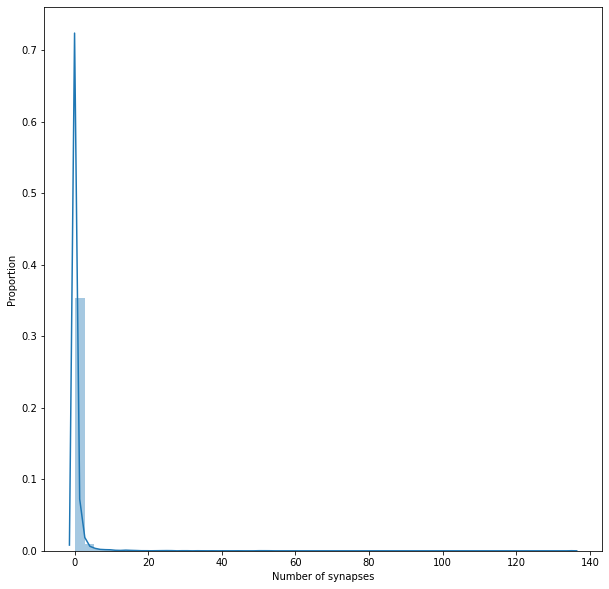

In [29]:
plt.clf()

fig, ax = plt.subplots(figsize = (10,10))

sns.distplot(mega_df.values.flatten())
plt.xlabel('Number of synapses')
plt.ylabel('Proportion')

plt.show()

In [108]:
master_dict = {k: v for d in roi_partner_name_dict for k, v in d.items()}
master_dict

{294786630: 'LHPD4e1_b',
 295120601: 'SLP352',
 295127956: 'SLP271',
 295797312: 'SLP346',
 295814411: 'SLP211',
 325455473: 'LHPV6a3_a',
 355816896: 'SLP309',
 358541542: 'LHAV3c1',
 360259229: 'LHAV3h1',
 386838814: 'LHPV4c2',
 418861761: 'LHAV3n1',
 419929377: 'LHAV3a1_a',
 449223263: 'LHAV3n1',
 452996289: 'SLP044_e',
 480257896: 'LHAV3a1_a',
 480258208: 'LHPV8a1',
 481946285: 'LHPV6i1_b',
 510956058: 'LHAV3c1',
 510956443: 'LHAV3c1',
 574377845: 'LHAV3f1',
 574688277: 'LHAD1d1',
 575729037: 'LHAV4b4',
 633101926: 'LHPV4c2',
 635424442: 'LHPV6i1_a',
 731917767: 'LHPV5b1',
 792040520: 'PPM1201',
 983007405: 'SLP226',
 1888524453: 'VA1d_vPN',
 5812980270: 'LHPD3b1_a',
 5813047004: 'LHAV3n1',
 5813047130: 'LHPV5j5',
 5813087551: 'LHPV6a4_c',
 5813109792: 'LHAV3c1',
 294782488: 'LHPV6a9_b',
 294787849: 'LHPV5e2',
 295111672: 'LHPV6b1',
 295798962: 'LHAV3a1_a',
 295816140: 'SLP269',
 296120593: 'LHAV3a1_c',
 325458991: 'LHPD1a1',
 325472654: 'LHPV6b1',
 326137566: 'LHPD3b1_a',
 32616463

In [31]:
# mega_df[['' in j for j in ['None' if v is None else v for v in [master_dict[i] for i in mega_df.index]]]].copy()

In [109]:
# Only selecting LH
LH_only = mega_df[['LH' in j for j in ['None' if v is None else v for v in [master_dict[i] for i in mega_df.index]]]].copy()
LH_only

294792184  480927537  481268653  541632990  542311358  542634818  \
263674097         0.0        0.0        0.0        0.0        0.0        1.0   
264014957         0.0        0.0        0.0        0.0        0.0        5.0   
264779403         0.0        0.0        0.0        0.0        0.0        0.0   
264783939         0.0        0.0        0.0        0.0        0.0        0.0   
265120324         0.0        0.0        0.0        0.0        0.0        0.0   
...               ...        ...        ...        ...        ...        ...   
5901203559        0.0        0.0        0.0        0.0        0.0        0.0   
5901203780        0.0        0.0        0.0        0.0        0.0        0.0   
5901208044        0.0        0.0        0.0        0.0        0.0        3.0   
5901213816        0.0        0.0        0.0        0.0        0.0        0.0   
5901219179        0.0        0.0        0.0        0.0        0.0        0.0   

            542652506  542665377  543010474  544021095  ...  664814903  \
263674097         0.0        0.0        0.0        0.0  ...        0.0   
264014957         0.0        0.0        0.0        0.0  ...        0.0   
264779403         0.0        2.0        0.0        0.0  ...        0.0   
264783939         0.0        5.0        0.0        0.0  ...        0.0   
265120324         0.0        0.0        0.0        0.0  ...        0.0   
...               ...        ...        ...        ...  ...        ...   
5901203559        0.0        0.0        0.0        0.0  ...        0.0   
5901203780        0.0        0.0        0.0        0.0  ...        0.0   
5901208044        1.0        0.0        0.0        0.0  ...        0.0   
5901213816        0.0        0.0        0.0        0.0  ...        0.0   
5901219179        0.0        3.0        0.0        0.0  ...        0.0   

            666135689  666818300  693125078  693479072  693483018  694834412  \
263674097         0.0        0.0        0.0        3.0        0.0        0.0   
264014957         0.0        0.0        2.0        0.0       10.0        0.0   
264779403         0.0        0.0        0.0        0.0        2.0        0.0   
264783939         0.0        0.0        0.0        0.0        0.0        0.0   
265120324         0.0        0.0        0.0        0.0        0.0        0.0   
...               ...        ...        ...        ...        ...        ...   
5901203559        0.0        0.0        0.0        0.0        0.0        0.0   
5901203780        0.0        0.0        0.0        0.0       16.0        0.0   
5901208044        0.0        0.0        0.0        0.0        0.0        0.0   
5901213816        0.0        0.0        0.0        0.0        0.0        0.0   
5901219179        0.0        0.0        0.0        0.0        0.0        0.0   

            697132371  697145036  697485362  
263674097         0.0        0.0        0.0  
264014957         0.0        0.0        1.0  
264779403         0.0        0.0        0.0  
264783939         0.0        0.0        0.0  
265120324         0.0        0.0        0.0  
...               ...        ...        ...  
5901203559        0.0        0.0        0.0  
5901203780        0.0        0.0        0.0  
5901208044        0.0        0.0        0.0  
5901213816        0.0        0.0        0.0  
5901219179        0.0        0.0        0.0  

[1302 rows x 50 columns]

In [ ]:
# Using 'LH' will also include centrifugal neurons (LHCENTs) -- need to remove this 

In [110]:
LH_only = LH_only.T.copy()
LH_only.rename_axis(index = 'source', columns = 'target', inplace = True)
LH_only

target     263674097   264014957   264779403   264783939   265120324   \
source                                                                  
294792184         0.0         0.0         0.0         0.0         0.0   
480927537         0.0         0.0         0.0         0.0         0.0   
481268653         0.0         0.0         0.0         0.0         0.0   
541632990         0.0         0.0         0.0         0.0         0.0   
542311358         0.0         0.0         0.0         0.0         0.0   
542634818         1.0         5.0         0.0         0.0         0.0   
542652506         0.0         0.0         0.0         0.0         0.0   
542665377         0.0         0.0         2.0         5.0         0.0   
543010474         0.0         0.0         0.0         0.0         0.0   
544021095         0.0         0.0         0.0         0.0         0.0   
572663539         0.0         0.0         0.0         0.0         0.0   
573333835         0.0         0.0         0.0         0.0         0.0   
573669915         0.0         0.0         0.0         0.0         0.0   
574032862         0.0         0.0         1.0         2.0         0.0   
574037266         0.0         0.0         4.0         1.0         0.0   
574037281         0.0         0.0         0.0         5.0         0.0   
574374051         0.0         0.0         0.0         2.0         0.0   
577542489         0.0         0.0         0.0         0.0         0.0   
603349484         0.0         0.0         0.0         0.0         0.0   
604031203         0.0         0.0         0.0         0.0         0.0   
604726283         0.0         0.0         0.0         0.0         0.0   
605050789         0.0         1.0         0.0         0.0         0.0   
606090268         0.0         0.0         0.0         0.0         0.0   
609924156         0.0         0.0         0.0         0.0         0.0   
610274029         0.0         0.0         0.0         0.0         0.0   
610274046         2.0         0.0         0.0         0.0         0.0   
630714299         2.0         1.0         0.0         0.0         0.0   
632751823         0.0         0.0         0.0         0.0         0.0   
634379734         0.0         0.0         0.0         0.0         0.0   
634707780         0.0         0.0         0.0         0.0         0.0   
634759240         0.0         0.0         0.0         0.0         0.0   
635048729         0.0         0.0         0.0         0.0         0.0   
635062078         0.0         7.0         0.0         0.0         0.0   
635407942         0.0         0.0         0.0         0.0         0.0   
635416407         1.0         1.0         0.0         0.0         0.0   
636418270         0.0         0.0         0.0         0.0         0.0   
636789080         0.0         0.0         0.0         0.0         0.0   
637462647         0.0         0.0         0.0         0.0         0.0   
662776660         0.0         0.0         0.0         0.0         3.0   
663787020         0.0         0.0         0.0         0.0         0.0   
664814903         0.0         0.0         0.0         0.0         0.0   
666135689         0.0         0.0         0.0         0.0         0.0   
666818300         0.0         0.0         0.0         0.0         0.0   
693125078         0.0         2.0         0.0         0.0         0.0   
693479072         3.0         0.0         0.0         0.0         0.0   
693483018         0.0        10.0         2.0         0.0         0.0   
694834412         0.0         0.0         0.0         0.0         0.0   
697132371         0.0         0.0         0.0         0.0         0.0   
697145036         0.0         0.0         0.0         0.0         0.0   
697485362         0.0         1.0         0.0         0.0         0.0   

target     294432626   294445931   294756576   294760680   294760837   ...  \
source                                                                 ...   
294792184         0.0         0.0         0.0  

# Collapsing by type (PN and LHN)

In [114]:
[PN_to_type[i] for i in LH_only.index]

['M_vPNml53',
 'M_vPNml70',
 'M_vPNml89',
 'M_vPNml70',
 'M_vPNml69',
 'DM1_lPN',
 'DM4_vPN',
 'M_vPNml79',
 'VP4+_vPN',
 'DA4l_adPN',
 'M_vPNml87',
 'DM4_adPN',
 'M_vPNml83',
 'VA5_lPN',
 'DA4m_adPN',
 'VA5_lPN',
 'VA5_lPN',
 'M_lvPNm24',
 'M_vPNml85',
 'DM4_vPN',
 'M_vPNml77',
 'M_vPNml84',
 'VC1_lPN',
 'M_lvPNm39',
 'M_vPNml50',
 'M_vPNml50',
 'DM2_lPN',
 'VC5_lvPN',
 'M_vPNml88',
 'M_vPNml58',
 'VP4_vPN',
 'DP1m_vPN',
 'DP1m_adPN',
 'M_vPNml85',
 'DM5_lPN',
 'M_vPNml58',
 'VC5_adPN',
 'M_vPNml80',
 'VC3m_lvPN',
 'VP1m+_lvPN',
 'VP1m+_lvPN',
 'DA3_adPN',
 'V_l2PN',
 'VC3l_adPN',
 'VM7v_adPN',
 'DL5_adPN',
 'VM4_adPN',
 'VM2_adPN',
 'M_vPNml83',
 'DM5_lPN']

In [122]:
LH_only_type = LH_only.copy()
LH_only_type.index = [PN_to_type[i] for i in LH_only.index]
LH_only_type

target      263674097   264014957   264779403   264783939   265120324   \
M_vPNml53          0.0         0.0         0.0         0.0         0.0   
M_vPNml70          0.0         0.0         0.0         0.0         0.0   
M_vPNml89          0.0         0.0         0.0         0.0         0.0   
M_vPNml70          0.0         0.0         0.0         0.0         0.0   
M_vPNml69          0.0         0.0         0.0         0.0         0.0   
DM1_lPN            1.0         5.0         0.0         0.0         0.0   
DM4_vPN            0.0         0.0         0.0         0.0         0.0   
M_vPNml79          0.0         0.0         2.0         5.0         0.0   
VP4+_vPN           0.0         0.0         0.0         0.0         0.0   
DA4l_adPN          0.0         0.0         0.0         0.0         0.0   
M_vPNml87          0.0         0.0         0.0         0.0         0.0   
DM4_adPN           0.0         0.0         0.0         0.0         0.0   
M_vPNml83          0.0         0.0         0.0         0.0         0.0   
VA5_lPN            0.0         0.0         1.0         2.0         0.0   
DA4m_adPN          0.0         0.0         4.0         1.0         0.0   
VA5_lPN            0.0         0.0         0.0         5.0         0.0   
VA5_lPN            0.0         0.0         0.0         2.0         0.0   
M_lvPNm24          0.0         0.0         0.0         0.0         0.0   
M_vPNml85          0.0         0.0         0.0         0.0         0.0   
DM4_vPN            0.0         0.0         0.0         0.0         0.0   
M_vPNml77          0.0         0.0         0.0         0.0         0.0   
M_vPNml84          0.0         1.0         0.0         0.0         0.0   
VC1_lPN            0.0         0.0         0.0         0.0         0.0   
M_lvPNm39          0.0         0.0         0.0         0.0         0.0   
M_vPNml50          0.0         0.0         0.0         0.0         0.0   
M_vPNml50          2.0         0.0         0.0         0.0         0.0   
DM2_lPN            2.0         1.0         0.0         0.0         0.0   
VC5_lvPN           0.0         0.0         0.0         0.0         0.0   
M_vPNml88          0.0         0.0         0.0         0.0         0.0   
M_vPNml58          0.0         0.0         0.0         0.0         0.0   
VP4_vPN            0.0         0.0         0.0         0.0         0.0   
DP1m_vPN           0.0         0.0         0.0         0.0         0.0   
DP1m_adPN          0.0         7.0         0.0         0.0         0.0   
M_vPNml85          0.0         0.0         0.0         0.0         0.0   
DM5_lPN            1.0         1.0         0.0         0.0         0.0   
M_vPNml58          0.0         0.0         0.0         0.0         0.0   
VC5_adPN           0.0         0.0         0.0         0.0         0.0   
M_vPNml80          0.0         0.0         0.0         0.0         0.0   
VC3m_lvPN          0.0         0.0         0.0         0.0         3.0   
VP1m+_lvPN         0.0         0.0         0.0         0.0         0.0   
VP1m+_lvPN         0.0         0.0         0.0         0.0         0.0   
DA3_adPN           0.0         0.0         0.0         0.0         0.0   
V_l2PN             0.0         0.0         0.0         0.0         0.0   
VC3l_adPN          0.0         2.0         0.0         0.0         0.0   
VM7v_adPN          3.0         0.0         0.0         0.0         0.0   
DL5_adPN           0.0        10.0         2.0         0.0         0.0   
VM4_adPN           0.0         0.0         0.0         0.0         0.0   
VM2_adPN           0.0         0.0         0.0         0.0         0.0   
M_vPNml83          0.0         0.0         0.0         0.0         0.0   
DM5_lPN            0.0         1.0         0.0         0.0         0.0   

target      294432626   294445931   294756576   294760680   294760837   ...  \
M_vPNml53          0.0         0.0         0.0         0.0         0.0  ...   
M_vPNml70          0.0         0.0         0.0         0.0         

In [123]:
LH_only.shape

(50, 1302)

In [124]:
LH_only_type = LH_only_type.groupby(lambda x:x, axis = 0).sum().copy()
LH_only_type

target      263674097   264014957   264779403   264783939   265120324   \
DA3_adPN           0.0         0.0         0.0         0.0         0.0   
DA4l_adPN          0.0         0.0         0.0         0.0         0.0   
DA4m_adPN          0.0         0.0         4.0         1.0         0.0   
DL5_adPN           0.0        10.0         2.0         0.0         0.0   
DM1_lPN            1.0         5.0         0.0         0.0         0.0   
DM2_lPN            2.0         1.0         0.0         0.0         0.0   
DM4_adPN           0.0         0.0         0.0         0.0         0.0   
DM4_vPN            0.0         0.0         0.0         0.0         0.0   
DM5_lPN            1.0         2.0         0.0         0.0         0.0   
DP1m_adPN          0.0         7.0         0.0         0.0         0.0   
DP1m_vPN           0.0         0.0         0.0         0.0         0.0   
M_lvPNm24          0.0         0.0         0.0         0.0         0.0   
M_lvPNm39          0.0         0.0         0.0         0.0         0.0   
M_vPNml50          2.0         0.0         0.0         0.0         0.0   
M_vPNml53          0.0         0.0         0.0         0.0         0.0   
M_vPNml58          0.0         0.0         0.0         0.0         0.0   
M_vPNml69          0.0         0.0         0.0         0.0         0.0   
M_vPNml70          0.0         0.0         0.0         0.0         0.0   
M_vPNml77          0.0         0.0         0.0         0.0         0.0   
M_vPNml79          0.0         0.0         2.0         5.0         0.0   
M_vPNml80          0.0         0.0         0.0         0.0         0.0   
M_vPNml83          0.0         0.0         0.0         0.0         0.0   
M_vPNml84          0.0         1.0         0.0         0.0         0.0   
M_vPNml85          0.0         0.0         0.0         0.0         0.0   
M_vPNml87          0.0         0.0         0.0         0.0         0.0   
M_vPNml88          0.0         0.0         0.0         0.0         0.0   
M_vPNml89          0.0         0.0         0.0         0.0         0.0   
VA5_lPN            0.0         0.0         1.0         9.0         0.0   
VC1_lPN            0.0         0.0         0.0         0.0         0.0   
VC3l_adPN          0.0         2.0         0.0         0.0         0.0   
VC3m_lvPN          0.0         0.0         0.0         0.0         3.0   
VC5_adPN           0.0         0.0         0.0         0.0         0.0   
VC5_lvPN           0.0         0.0         0.0         0.0         0.0   
VM2_adPN           0.0         0.0         0.0         0.0         0.0   
VM4_adPN           0.0         0.0         0.0         0.0         0.0   
VM7v_adPN          3.0         0.0         0.0         0.0         0.0   
VP1m+_lvPN         0.0         0.0         0.0         0.0         0.0   
VP4+_vPN           0.0         0.0         0.0         0.0         0.0   
VP4_vPN            0.0         0.0         0.0         0.0         0.0   
V_l2PN             0.0         0.0         0.0         0.0         0.0   

target      294432626   294445931   294756576   294760680   294760837   ...  \
DA3_adPN          15.0         1.0         0.0         0.0         0.0  ...   
DA4l_adPN          0.0         2.0         0.0         0.0        23.0  ...   
DA4m_adPN          0.0         0.0         4.0         0.0         1.0  ...   
DL5_adPN           0.0         1.0         0.0         0.0         0.0  ...   
DM1_lPN            0.0         0.0         0.0         0.0         0.0  ...   
DM2_lPN            0.0         0.0         1.0         0.0         0.0  ...   
DM4_adPN           0.0        11.0         0.0         0.0         0.0  ...   
DM4_vPN            0.0         0.0         0.0         0.0         0.0  ...   
DM5_lPN            0.0         0.0         0.0         0.0         0.0  ...   
DP1m_adPN          0.0         1.0         0.0         0.0         0.0  ...   
DP1m_vPN           0.0         0.0         0.0         0.0         0.0  ...   
M_lvPNm24        

In [ ]:
[master_dict[i] for i in LH_only_type.columns]

In [121]:
LH_only_type

LHPD2a5_a  LHPD2a5_a  LHPV5a3  LHPV5a3  LHPV5a3  LHPD3b2  \
DA3_adPN          0.0        0.0      0.0      0.0      0.0     15.0   
DA4l_adPN         0.0        0.0      0.0      0.0      0.0      0.0   
DA4m_adPN         0.0        0.0      4.0      1.0      0.0      0.0   
DL5_adPN          0.0       10.0      2.0      0.0      0.0      0.0   
DM1_lPN           1.0        5.0      0.0      0.0      0.0      0.0   
DM2_lPN           2.0        1.0      0.0      0.0      0.0      0.0   
DM4_adPN          0.0        0.0      0.0      0.0      0.0      0.0   
DM4_vPN           0.0        0.0      0.0      0.0      0.0      0.0   
DM5_lPN           1.0        2.0      0.0      0.0      0.0      0.0   
DP1m_adPN         0.0        7.0      0.0      0.0      0.0      0.0   
DP1m_vPN          0.0        0.0      0.0      0.0      0.0      0.0   
M_lvPNm24         0.0        0.0      0.0      0.0      0.0      0.0   
M_lvPNm39         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml50         2.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml53         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml58         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml69         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml70         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml77         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml79         0.0        0.0      2.0      5.0      0.0      0.0   
M_vPNml80         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml83         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml84         0.0        1.0      0.0      0.0      0.0      0.0   
M_vPNml85         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml87         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml88         0.0        0.0      0.0      0.0      0.0      0.0   
M_vPNml89         0.0        0.0      0.0      0.0      0.0      0.0   
VA5_lPN           0.0        0.0      1.0      9.0      0.0      0.0   
VC1_lPN           0.0        0.0      0.0      0.0      0.0      0.0   
VC3l_adPN         0.0        2.0      0.0      0.0      0.0      0.0   
VC3m_lvPN         0.0        0.0      0.0      0.0      3.0      0.0   
VC5_adPN          0.0        0.0      0.0      0.0      0.0      0.0   
VC5_lvPN          0.0        0.0      0.0      0.0      0.0      1.0   
VM2_adPN          0.0        0.0      0.0      0.0      0.0      0.0   
VM4_adPN          0.0        0.0      0.0      0.0      0.0      0.0   
VM7v_adPN         3.0        0.0      0.0      0.0      0.0      0.0   
VP1m+_lvPN        0.0        0.0      0.0      0.0      0.0      0.0   
VP4+_vPN          0.0        0.0      0.0      0.0      0.0      0.0   
VP4_vPN           0.0        0.0      0.0      0.0      0.0      0.0   
V_l2PN            0.0        0.0      0.0      0.0      0.0      0.0   

            LHPV6a2_b  LHPV6a4_b  LHPV6a4_a  LHPV6i2_a  ...  LHAV5a2_c  \
DA3_adPN          1.0        0.0        0.0        0.0  ...        0.0   
DA4l_adPN         2.0        0.0        0.0       23.0  ...        0.0   
DA4m_adPN         0.0        4.0        0.0        1.0  ...        0.0   
DL5_adPN          1.0        0.0        0.0        0.0  ...        0.0   
DM1_lPN           0.0        0.0        0.0        0.0  ...        0.0   
DM2_lPN           0.0        1.0        0.0        0.0  ...        0.0   
DM4_adPN         11.0        0.0        0.0        0.0  ...        0.0   
DM4_vPN           0.0        0.0        0.0        0.0  ...        1.0   
DM5_lPN           0.0        0.0        0.0        0.0  ...        0.0   
DP1m_adPN         1.0        0.0        0.0        0.0  ...        2.0   
DP1m_vPN          0.0        0.0        0.0        0.0  ...        0.0   
M_lvPNm24         0.0        0.0        0.0        0.0  ...        0.0   
M_lvPNm39         0.0        0.0        0.0        0.0  ...        0.0   
M_vPNml50         0.0  

In [125]:
LH_only_type.columns = [master_dict[i] for i in LH_only_type.columns]
LH_only_type = LH_only_type.groupby(lambda x:x, axis = 1).sum().copy()
LH_only_type.shape

(40, 636)

In [126]:
LH_only_type

LHAD1a1  LHAD1a2_a  LHAD1a2_b  LHAD1a2_c  LHAD1a3  LHAD1a4_a  \
DA3_adPN        0.0        0.0        0.0        0.0      0.0        0.0   
DA4l_adPN       0.0        0.0        0.0        0.0      0.0        0.0   
DA4m_adPN       0.0        0.0        0.0        0.0      0.0        0.0   
DL5_adPN        0.0        0.0        0.0        0.0      0.0        0.0   
DM1_lPN        27.0        0.0        2.0        4.0      3.0        0.0   
DM2_lPN         5.0        0.0       12.0       18.0      0.0        3.0   
DM4_adPN       15.0        0.0        7.0       27.0      0.0        0.0   
DM4_vPN         0.0        0.0        0.0        0.0      0.0        0.0   
DM5_lPN         3.0        0.0        1.0        3.0      1.0        0.0   
DP1m_adPN      19.0        0.0        3.0        8.0      1.0       18.0   
DP1m_vPN        0.0        0.0        0.0        0.0      0.0        0.0   
M_lvPNm24       0.0        0.0        0.0        0.0      0.0        0.0   
M_lvPNm39       2.0        0.0        0.0        1.0      0.0        0.0   
M_vPNml50       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml53       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml58       1.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml69       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml70       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml77       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml79       0.0        0.0        1.0        0.0      0.0        0.0   
M_vPNml80       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml83       0.0        0.0        0.0        0.0      0.0        0.0   
M_vPNml84       0.0        1.0        3.0        0.0      0.0        0.0   
M_vPNml85      11.0        0.0        0.0        1.0      0.0        6.0   
M_vPNml87       0.0        0.0        1.0        0.0      0.0        0.0   
M_vPNml88       0.0        0.0        0.0        0.0      0.0        3.0   
M_vPNml89       0.0        0.0        0.0        0.0      0.0        0.0   
VA5_lPN         0.0        0.0        0.0        0.0      0.0        0.0   
VC1_lPN         0.0        0.0        0.0        0.0      1.0        0.0   
VC3l_adPN       0.0        0.0        6.0        1.0      1.0        0.0   
VC3m_lvPN       0.0        0.0        0.0        0.0      0.0        5.0   
VC5_adPN        0.0        0.0        0.0        0.0      0.0        0.0   
VC5_lvPN        0.0        0.0        0.0        0.0      0.0        0.0   
VM2_adPN        0.0        0.0        2.0        7.0      4.0       10.0   
VM4_adPN        0.0        0.0        0.0        0.0      0.0        0.0   
VM7v_adPN       1.0        1.0        2.0        1.0      0.0        0.0   
VP1m+_lvPN      0.0        0.0        0.0        0.0      0.0        0.0   
VP4+_vPN        0.0        0.0        0.0        0.0      0.0        0.0   
VP4_vPN         0.0        0.0        0.0        0.0      0.0        0.0   
V_l2PN          1.0       12.0        9.0        1.0      0.0        0.0   

            LHAD1a4_b  LHAD1b1_b  LHAD1b2_a  LHAD1b2_b  ...  LHPV6l1  LHPV6l2  \
DA3_adPN          0.0        0.0        0.0        0.0  ...      0.0      0.0   
DA4l_adPN         0.0        0.0        4.0        0.0  ...      0.0      0.0   
DA4m_adPN         0.0        0.0        1.0        0.0  ...      0.0      0.0   
DL5_adPN          0.0        0.0       36.0        2.0  ...      0.0      0.0   
DM1_lPN           1.0        0.0        0.0        8.0  ...      0.0      0.0   
DM2_lPN           0.0        0.0        0.0        0.0  ...      0.0      0.0   
DM4_adPN          0.0        0.0        0.0        0.0  ...      0.0      0.0   
DM4_vPN           0.0        0.0        0.0        2.0  ...      0.0      0.0   
DM5_lPN           0.0        0.0        0.0        0.0  ...      0.0      0.0   
DP1m_adPN         1.0        0.0        1.0       16.0  ...      4.0      0.0   
DP1m

##### Need to perform column normalisation, as described in the Adult MB FIB paper 

In [ ]:
LH_only_norm = LH_only.div(LH_only.sum(axis = 0), axis = 1)
LH_only_norm

###### Normalising the type matrix 

In [138]:
LH_only_type_norm = LH_only_type.div(LH_only_type.sum(axis = 0), axis = 1)
LH_only_type_norm

LHAD1a1  LHAD1a2_a  LHAD1a2_b  LHAD1a2_c   LHAD1a3  LHAD1a4_a  \
DA3_adPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
DA4l_adPN   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
DA4m_adPN   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
DL5_adPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
DM1_lPN     0.317647   0.000000   0.040816   0.055556  0.272727   0.000000   
DM2_lPN     0.058824   0.000000   0.244898   0.250000  0.000000   0.066667   
DM4_adPN    0.176471   0.000000   0.142857   0.375000  0.000000   0.000000   
DM4_vPN     0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
DM5_lPN     0.035294   0.000000   0.020408   0.041667  0.090909   0.000000   
DP1m_adPN   0.223529   0.000000   0.061224   0.111111  0.090909   0.400000   
DP1m_vPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_lvPNm24   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_lvPNm39   0.023529   0.000000   0.000000   0.013889  0.000000   0.000000   
M_vPNml50   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml53   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml58   0.011765   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml69   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml70   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml77   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml79   0.000000   0.000000   0.020408   0.000000  0.000000   0.000000   
M_vPNml80   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml83   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
M_vPNml84   0.000000   0.071429   0.061224   0.000000  0.000000   0.000000   
M_vPNml85   0.129412   0.000000   0.000000   0.013889  0.000000   0.133333   
M_vPNml87   0.000000   0.000000   0.020408   0.000000  0.000000   0.000000   
M_vPNml88   0.000000   0.000000   0.000000   0.000000  0.000000   0.066667   
M_vPNml89   0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VA5_lPN     0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VC1_lPN     0.000000   0.000000   0.000000   0.000000  0.090909   0.000000   
VC3l_adPN   0.000000   0.000000   0.122449   0.013889  0.090909   0.000000   
VC3m_lvPN   0.000000   0.000000   0.000000   0.000000  0.000000   0.111111   
VC5_adPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VC5_lvPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VM2_adPN    0.000000   0.000000   0.040816   0.097222  0.363636   0.222222   
VM4_adPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VM7v_adPN   0.011765   0.071429   0.040816   0.013889  0.000000   0.000000   
VP1m+_lvPN  0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VP4+_vPN    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
VP4_vPN     0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
V_l2PN      0.011765   0.857143   0.183673   0.013889  0.000000   0.000000   

            LHAD1a4_b  LHAD1b1_b  LHAD1b2_a  LHAD1b2_b  ...   LHPV6l1  \
DA3_adPN          0.0        0.0   0.000000   0.000000  ...  0.000000   
DA4l_adPN         0.0        0.0   0.017316   0.000000  ...  0.000000   
DA4m_adPN         0.0        0.0   0.004329   0.000000  ...  0.000000   
DL5_adPN          0.0        0.0   0.155844   0.025316  ...  0.000000   
DM1_lPN           0.5        0.0   0.000000   0.101266  ...  0.000000   
DM2_lPN           0.0        0.0   0.000000   0.000000  ...  0.000000   
DM4_adPN          0.0        0.0   0.000000   0.000000  ...  0.000000   
DM4_vPN           0.0        0.0   0.000000   0.025316  ...  0.000000   
DM5_lPN           0.0        0.0   0.000000   0.000000  ...  0.000000   
DP1m_adPN         0.5        0.0   0.004329   0.202532  ...  0.666667   
DP1m_vPN   

In [119]:
#LH_only.sum(axis = 1)

In [120]:
#LH_only.sum(axis = 0)

In [121]:
#LH_only[LH_only > 10]

target     264779403   264783939   294445931   294756576   294760680   \
source                                                                  
294792184         0.0         0.0    0.000000         0.0         0.0   
480927537         0.0         0.0    0.000000         0.0         0.0   
481268653         0.0         0.0    0.000000         0.0         0.0   
541632990         0.0         0.0    0.000000         0.0         0.0   
542311358         0.0         0.0    0.000000         0.0         0.0   
542652506         0.0         0.0    0.000000         0.0         0.0   
542665377         1.0         1.0    0.714286         1.0         1.0   
543010474         0.0         0.0    0.000000         0.0         0.0   
544021095         0.0         0.0    0.285714         0.0         0.0   
572663539         0.0         0.0    0.000000         0.0         0.0   

target     294760837   294782488   294786630   294787849   295111672   ...  \
source                                                                 ...   
294792184        0.00    0.000000         0.5         0.0    0.000000  ...   
480927537        0.00    0.105263         0.0         0.3    0.076923  ...   
481268653        0.00    0.000000         0.0         0.0    0.000000  ...   
541632990        0.04    0.105263         0.0         0.7    0.000000  ...   
542311358        0.00    0.000000         0.0         0.0    0.769231  ...   
542652506        0.00    0.000000         0.0         0.0    0.000000  ...   
542665377        0.00    0.052632         0.0         0.0    0.000000  ...   
543010474        0.04    0.000000         0.0         0.0    0.000000  ...   
544021095        0.92    0.736842         0.0         0.0    0.153846  ...   
572663539        0.00    0.000000         0.5         0.0    0.000000  ...   

target     5813106089  5813109792  5813134617  5901195359  5901195496  \
source                                                                  
294792184         0.0    0.181818         0.0         0.0         0.0   
480927537         0.0    0.272727         0.0         0.0         0.0   
481268653         0.0    0.000000         0.0         0.0         0.0   
541632990         0.0    0.090909         0.0         0.0         0.0   
542311358         0.0    0.000000         0.5         0.0         0.6   
542652506         0.0    0.000000         0.0         1.0         0.0   
542665377         0.0    0.090909         0.0         0.0         0.4   
543010474         0.0    0.000000         0.0         0.0         0.0   
544021095         0.0    0.363636         0.0         0.0         0.0   
572663539         1.0    0.000000         0.5         0.0         0.0   

target     5901196932  5901197773  5901203780  5901208044  5901219179  
source                                                                 
294792184    0.000000         0.0         0.0         0.0         0.0  
480927537    0.000000         0.0         0.0         0.0         0.0  
481268653    0.000000         0.0         0.0         0.0         0.0  
541632990    0.000000         0.0         0.0         0.0         0.0  
542311358    0.333333         0.0         0.0         0.0         0.0  
542652506    0.555556         0.0         0.0         1.0         0.0  
542665377    0.000000         0.0         0.0         0.0         1.0  
543010474    0.000000         0.0         0.0         0.0         0.0  
544021095    0.111111         0.0         0.0         0.0         0.0  
572663539    0.000000         1.0         1.0         0.0         0.0  

[10 rows x 586 columns]

In [ ]:
LH_only_norm.columns

In [97]:
master_dict

{294786630: 'LHPD4e1_b',
 295120601: 'SLP352',
 295127956: 'SLP271',
 295797312: 'SLP346',
 295814411: 'SLP211',
 325455473: 'LHPV6a3_a',
 355816896: 'SLP309',
 358541542: 'LHAV3c1',
 360259229: 'LHAV3h1',
 386838814: 'LHPV4c2',
 418861761: 'LHAV3n1',
 419929377: 'LHAV3a1_a',
 449223263: 'LHAV3n1',
 452996289: 'SLP044_e',
 480257896: 'LHAV3a1_a',
 480258208: 'LHPV8a1',
 481946285: 'LHPV6i1_b',
 510956058: 'LHAV3c1',
 510956443: 'LHAV3c1',
 574377845: 'LHAV3f1',
 574688277: 'LHAD1d1',
 575729037: 'LHAV4b4',
 633101926: 'LHPV4c2',
 635424442: 'LHPV6i1_a',
 731917767: 'LHPV5b1',
 792040520: 'PPM1201',
 983007405: 'SLP226',
 1888524453: 'VA1d_vPN',
 5812980270: 'LHPD3b1_a',
 5813047004: 'LHAV3n1',
 5813047130: 'LHPV5j5',
 5813087551: 'LHPV6a4_c',
 5813109792: 'LHAV3c1',
 294782488: 'LHPV6a9_b',
 294787849: 'LHPV5e2',
 295111672: 'LHPV6b1',
 295798962: 'LHAV3a1_a',
 295816140: 'SLP269',
 296120593: 'LHAV3a1_c',
 325458991: 'LHPD1a1',
 325472654: 'LHPV6b1',
 326137566: 'LHPD3b1_a',
 32616463

In [42]:
# Now need to get KC to MBON matrix
list(LH_only_norm.columns)

[264779403,
 264783939,
 294445931,
 294756576,
 294760680,
 294760837,
 294782488,
 294786630,
 294787849,
 295111672,
 295115794,
 295443724,
 295461871,
 295779879,
 295798962,
 295807429,
 296120593,
 325455473,
 325458991,
 325460206,
 325472654,
 325787243,
 325797488,
 325797575,
 325802256,
 325814669,
 326137566,
 326154371,
 326159907,
 326164634,
 326475920,
 326812225,
 326817565,
 327499164,
 327506825,
 327933008,
 328519904,
 328542009,
 328611004,
 328861282,
 329210713,
 329211098,
 329566467,
 329581637,
 330246657,
 356144721,
 356467849,
 356486199,
 356499529,
 356818664,
 356823065,
 356832508,
 357160116,
 357496172,
 357855613,
 358538040,
 358538491,
 358541542,
 358865451,
 359223830,
 359524536,
 359555689,
 359560762,
 359581549,
 359891881,
 359892436,
 359913782,
 360238069,
 360246734,
 360259229,
 360314997,
 360573708,
 360578907,
 360596183,
 361955275,
 361968122,
 386821054,
 386825553,
 386825636,
 386833812,
 386838513,
 386838814,
 387180498,
 387

In [43]:
out_cypher = """
         MATCH (m:`hemibrain_Neuron`)-[e:ConnectsTo]->(n)
         WHERE m.bodyId in {}
         RETURN m.instance AS Source_name, m.bodyId AS Source_bid, 
         n.instance AS Target_name, n.bodyId AS Target_bid, e.weight AS Weight
         """

In [44]:
# Find the targets of the columns

def get_best_partners(x, postsyn_budget_threshold = 0.05, num_syn_threshold = 50, Filter = True):
    
    df = neu.fetch_custom(out_cypher.format(x))
    df.sort_values(by = ['Weight'], ascending = False, inplace = True)
    df = df[~df.Target_name.isnull()].copy()
    
    if Filter:
        
        target_df = neu.fetch_custom(p.format(df.Target_bid.unique().tolist()))
        
        for i, j in df.iterrows():
        
            bid = j.Target_bid
            postsyn_value = target_df[target_df.bodyid == bid].npost.values
            weight = j.Weight
            df.loc[i, 'postsyn_norm_weight'] = weight / postsyn_value
        
        df = df[(df.postsyn_norm_weight > postsyn_budget_threshold) | (df.Weight > num_syn_threshold)].copy()
        return(df)
    
    else:
        
        return(df)

In [45]:
LHLN_output = get_best_partners(list(LH_only.columns), 
                                postsyn_budget_threshold=.0, 
                                num_syn_threshold=0, Filter = False)

In [46]:
LHLN_output

Source_name  Source_bid     Target_name  Target_bid  Weight
265818     LHMB1_R  5813020988           APL_R   425790257     451
81198   LHPV10b1_R   604709727        CRE011_R  5901213440     340
265811     LHMB1_R  5813020988  MBON31(a'1a)_R   894020730     332
430634   LHCENT2_R   327499164         LHMB1_R  5813020988     254
318471   LHCENT1_R   328861282       DM1_lPN_R   542634818     245
...            ...         ...             ...         ...     ...
321218   LHAV3b5_R   421292214     LHAD3f1_b_R   547457113       1
321310   LHAV3b5_R   421292214        SLP012_R   480978811       1
321260   LHAV3b5_R   421292214        SLP156_R   358877435       1
321264   LHAV3b5_R   421292214        SMP294_R   389563849       1
321266   LHAV3b5_R   421292214        SLP352_R   294778999       1

[101740 rows x 5 columns]

In [55]:
dn_ids = pd.read_csv("/Users/Myers/Documents/GitHub/Python/Jupyter/DNs.csv")
dn_ids = dn_ids.value.tolist()

In [139]:
dns_neurons, _ = nvneu.fetch_neurons(dn_ids)
dns_neurons

bodyId    instance      type  pre  post        size  status  cropped  \
0     295063181     DNES2_R     DNES2    1   584  2051016758  Traced    False   
1     297921642  SMP486_b_R  SMP486_b   40   264   369414626  Traced    False   
2     297925719    SMP478_R    SMP478   11   514   887352389  Traced    False   
3     298275356    SMP545_R    SMP545  291  3105  2027218468  Traced    False   
4     298961895    SMP478_R    SMP478    8   569   862856817  Traced    False   
..          ...         ...       ...  ...   ...         ...     ...      ...   
340  5813095193     DNp16_R     DNp16   70   683   292910198  Traced    False   
341  5813096489    VES081_R    VES081   14  1321   928031787  Traced    False   
342  5813108230  DNp16/17_R  DNp16/17    5   177   304268206  Traced    False   
343  5813123748     PS020_R     PS020  618  2150   817338106  Traced    False   
344  5813133660     PS032_R     PS032  310   934   584173856  Traced    False   

        statusLabel cellBodyFiber  somaRadius           somaLocation  \
0    Roughly traced         PDM31       427.0    [6063, 21133, 5000]   
1    Roughly traced         PDM15       301.0  [18736, 14395, 11184]   
2    Roughly traced         PDM15       301.0  [18670, 15472, 12256]   
3    Roughly traced         PDM27       331.0  [22923, 13259, 17088]   
4    Roughly traced         PDM15       301.0  [17329, 15560, 10624]   
..              ...           ...         ...                    ...   
340  Roughly traced         PVM02       276.0  [25941, 10730, 20000]   
341  Roughly traced         PVM15       451.0  [15106, 10109, 20144]   
342  Roughly traced         PVM02       321.5  [23677, 10111, 18544]   
343  Roughly traced         ADM03       292.5  [14249, 34168, 17752]   
344  Roughly traced         ADM03       292.5  [14607, 33081, 15208]   

                                             inputRois  \
0    [CA(R), MB(+ACA)(R), MB(R), SLP(R), SMP(L), SM...   
1             [SIP(R), SMP(L), SMP(R), SNP(L), SNP(R)]   
2    [INP, SCL(R), SIP(R), SLP(R), SMP(L), SMP(R), ...   
3    [FLA(R), GOR(R), PENP, SMP(L), SMP(R), SNP(L),...   
4        [INP, SCL(R), SMP(L), SMP(R), SNP(L), SNP(R)]   
..                                                 ...   
340  [CAN(R), GNG, IB, INP, IPS(R), PENP, SPS(R), V...   
341  [AL(R), GNG, IPS(R), LAL(-GA)(R), LAL(R), LX(R...   
342               [GNG, IB, INP, IPS(R), SPS(R), VMNP]   
343  [EPA(R), GNG, IPS(R), LAL(-GA)(R), LAL(R), LX(...   
344  [EPA(R), GNG, IPS(R), SPS(R), VES(R), VLNP(R),...   

                                            outputRois  \
0                                     [SMP(R), SNP(R)]   
1                                     [SMP(R), SNP(R)]   
2                             [SIP(R), SMP(R), SNP(R)]   
3       [FLA(R), PENP, SMP(L), SMP(R), SNP(L), SNP(R)]   
4                     [SMP(L), SMP(R), SNP(L), SNP(R)]   
..                                                 ...   
340          [CAN(R), GNG, IPS(R), PENP, SPS(R), VMNP]   
341                                [GNG, VES(R), VMNP]   
342                             [IPS(R), SPS(R), VMNP]   
343  [EPA(R), GNG, IPS(R), LAL(-GA)(R), LAL(R), LX(...   
344  [GNG, IPS(R), SPS(R), VES(R), VLNP(R), VMNP, W...   

                                               roiInfo  
0    {'SNP(R)': {'pre': 1, 'post': 561, 'downstream...  
1    {'SNP(R)': {'pre': 40, 'post': 254, 'downstrea...  
2    {'SNP(R)': {'pre': 8, 'post': 411, 'downstream...  
3    {'SNP(R)': {'pre': 265, 'post': 2909, 'downstr...  
4    {'SNP(R)': {'pre': 5, 'post': 317, 'downstream...  
..                                                 ...  
340  {'INP': {'post': 34, 'upstream': 34}, 'IB': {'...  
341  {'VMNP': {'pre': 5, 'post': 1190, 'downstream'...  
342  {'INP': {'post': 2, 'upstream': 2}, 'IB': {'po...  
343  {'MB(R)': {'post': 1, 'upstream': 1}, 'a'L(R)'...  
344  {'VMNP': {'pre': 253, 'post': 846, 'downstream...  

[345 rows x 15 columns]

In [56]:
LHLN_output[LHLN_output.Target_bid.isin(dn_ids)]

Source_name  Source_bid  Target_name  Target_bid  Weight
558452    LHAV1a1_R   820563959      DNp42_R   981000564      25
55750     LHPV8a1_R   480258208     CRE101_R   985835016      22
141045    LHAV2k9_R   424384254    DSKMP1B_R  1352077058      22
69128     LHAV1a1_R   883338122      DNp06_R  5813023322      21
805377    LHAV1a1_R   789588935      DNp06_R  5813023322      19
...             ...         ...          ...         ...     ...
301444    LHPD5a1_R   514068564     SMP258_R   517885151       1
302661    LHPD5a1_R   514068564     SMP259_R   328265182       1
325989  LHAV2b2_c_R   821612285  SIFa(PDM34)   699031185       1
323848    LHAV4g2_R   944729312  SIFa(PDM34)  1418618235       1
319963    LHPV4b9_R   604735961      NPFP1_R  1043117106       1

[508 rows x 5 columns]

In [58]:
adjx_from_syn_conn??

In [59]:
start_time = time.time()
lhn_to_dn_conn_mat = []
lhn_to_dn_roi_partner_name_dict = []

#for i in fib_PN_LH.id.tolist():
for i in LH_only_norm.columns.tolist()[:10]:
    
    #a, b = adjx_from_syn_conn(i, LH, rename_axis = False)
    a, b = adjx_from_syn_conn(i, presyn_postsyn = 'pre', roi = None, rename_index = False)
    
    lhn_to_dn_conn_mat.append(a)
    lhn_to_dn_roi_partner_name_dict.append(b)

print("This cell takes {} minutes to run".format((time.time() - start_time) / 60))

This cell takes 0.5034449815750122 minutes to run


In [69]:
lhn_to_dn_mega_df = pd.concat(lhn_to_dn_conn_mat)
lhn_to_dn_mega_df = lhn_to_dn_mega_df.groupby(lambda x:x, axis = 0).sum()
#mega_df = mega_df.T.copy()
#mega_df = mega_df.rename_axis(index = 'source', columns = 'target')
lhn_to_dn_mega_df.head()

264779403  264783939  294445931  294756576  294760680  294760837  \
203253253        0.0        0.0        0.0        0.0        0.0        0.0   
264438143        0.0        2.0        0.0        0.0        0.0        0.0   
264774850        0.0        0.0        0.0        0.0        0.0        0.0   
264779403        0.0        1.0        0.0        0.0        0.0        0.0   
264783939        2.0        0.0        0.0        0.0        0.0        0.0   

           294782488  294786630  294787849  295111672  
203253253        0.0        0.0        2.0        0.0  
264438143        0.0        0.0        2.0        0.0  
264774850        0.0        0.0        2.0        0.0  
264779403        0.0        0.0        2.0        0.0  
264783939        0.0        0.0        0.0        0.0

In [70]:
lhn_to_dn_mega_df.shape

(866, 10)

In [71]:
lhn_to_dn_mega_df = lhn_to_dn_mega_df.T.copy()
lhn_to_dn_mega_df.rename_axis(index = 'source', columns = 'target', inplace = True)
lhn_to_dn_mega_df

target     203253253   264438143   264774850   264779403   264783939   \
source                                                                  
264779403         0.0         0.0         0.0         0.0         2.0   
264783939         0.0         2.0         0.0         1.0         0.0   
294445931         0.0         0.0         0.0         0.0         0.0   
294756576         0.0         0.0         0.0         0.0         0.0   
294760680         0.0         0.0         0.0         0.0         0.0   
294760837         0.0         0.0         0.0         0.0         0.0   
294782488         0.0         0.0         0.0         0.0         0.0   
294786630         0.0         0.0         0.0         0.0         0.0   
294787849         2.0         2.0         2.0         2.0         0.0   
295111672         0.0         0.0         0.0         0.0         0.0   

target     264822904   265111558   265120223   265120324   265120424   ...  \
source                                                                 ...   
264779403         7.0         0.0         2.0         4.0        19.0  ...   
264783939         3.0         0.0         0.0         1.0        30.0  ...   
294445931         0.0         0.0         0.0         0.0         0.0  ...   
294756576         0.0         0.0         0.0         0.0         0.0  ...   
294760680         0.0         0.0         0.0         0.0         0.0  ...   
294760837         1.0         1.0         0.0         0.0         5.0  ...   
294782488         0.0         0.0         0.0         0.0         0.0  ...   
294786630         0.0         0.0         0.0         0.0         0.0  ...   
294787849         1.0         0.0         0.0         0.0         0.0  ...   
295111672         4.0         0.0         0.0         0.0         4.0  ...   

target     5901193389  5901193482  5901195361  5901195498  5901196319  \
source                                                                  
264779403         0.0         2.0         0.0         0.0         0.0   
264783939         0.0         3.0         0.0         0.0         0.0   
294445931         0.0         0.0         0.0         0.0         0.0   
294756576         0.0         0.0         0.0         0.0         0.0   
294760680         0.0         0.0         0.0         0.0         0.0   
294760837         3.0         1.0         0.0         0.0         0.0   
294782488         0.0         0.0         0.0         0.0         0.0   
294786630         0.0         0.0         0.0         0.0         0.0   
294787849         0.0         1.0         4.0         2.0         1.0   
295111672         0.0         2.0         0.0         0.0         0.0   

target     5901197740  5901201383  5901211960  7112615561  7112616295  
source                                                                 
264779403         0.0         0.0         0.0         1.0         1.0  
264783939         0.0         0.0         0.0         1.0         0.0  
294445931         0.0         0.0         0.0         0.0         0.0  
294756576         0.0         8.0         0.0         0.0         0.0  
294760680         0.0         1.0         1.0         0.0         0.0  
294760837         0.0         0.0         0.0         0.0         0.0  
294782488         0.0         0.0         0.0         0.0         0.0  
294786630         1.0         0.0         0.0         0.0         0.0  
294787849         0.0         0.0         0.0         0.0         0.0  
295111672         0.0         0.0         0.0         0.0         0.0  

[10 rows x 866 columns]

In [72]:
master_dict_lhn_to_dn = {k: v for d in lhn_to_dn_roi_partner_name_dict for k, v in d.items()}
master_dict_lhn_to_dn

{264783939: 'LHPV5a3',
 264822904: 'SLP414',
 265120223: 'LHPV5a3',
 265120324: 'LHPV5a3',
 265120424: 'SLP414',
 265120467: 'SLP414',
 265120589: 'SLP414',
 265120597: 'FB1D',
 265120677: 'FB8A',
 265124786: 'SLP075',
 265155147: 'SMP500',
 294432760: 'SLP351',
 294450495: 'SA1_a',
 294756576: 'LHPV6a4_b',
 294782432: 'SLP203',
 294786785: 'SLP300',
 294787517: None,
 294787849: 'LHPV5e2',
 294791509: 'FB1D',
 294792311: 'SLP302',
 294795822: 'SLP416',
 295107298: None,
 295115429: 'SLP053',
 295119176: None,
 295132077: 'SLP416',
 295132487: 'SLP418',
 295132845: 'SMP167',
 295133015: 'SLP414',
 295133452: 'FB9A',
 295133743: 'SLP414',
 295133778: 'SMP497',
 295133927: 'SLP418',
 295136778: 'FB8A',
 295136965: 'FB1E_b',
 295137392: 'SLP419',
 295137515: 'SLP415',
 295141618: 'FB9C_b',
 295452519: None,
 295457194: None,
 295457367: None,
 295474250: 'SLP351',
 295478389: 'SMP167',
 295482578: 'SLP094',
 295486627: None,
 295799057: 'SLP111_a',
 295805243: 'LHPV5h1',
 295805328: None,

In [31]:
# mega_df[['' in j for j in ['None' if v is None else v for v in [master_dict[i] for i in mega_df.index]]]].copy()

In [73]:
dn_ids

[1072059176,
 482356368,
 5813056909,
 5813021112,
 1140245595,
 542751938,
 5813023322,
 634888570,
 1100404634,
 981000564,
 1011055060,
 1040004619,
 1009984360,
 1069351982,
 953013850,
 1100404581,
 1006984280,
 1283190163,
 1134107162,
 1039335355,
 1071044860,
 1005252630,
 1603757560,
 1139909038,
 1048846074,
 2097928626,
 1010718372,
 1043696307,
 1040013335,
 1010713981,
 1043117106,
 5813087868,
 1044403618,
 1070379357,
 5813075030,
 1074782432,
 1103792936,
 1635833170,
 1038636222,
 482684855,
 422997837,
 985835016,
 1010713958,
 823062947,
 1666561406,
 1634140884,
 517885151,
 1102091961,
 1155263986,
 1040328771,
 1262356170,
 707116522,
 550655668,
 1655997973,
 1566597156,
 519949044,
 1785926866,
 5813055134,
 1963869286,
 5813026936,
 887195902,
 1072063538,
 5813050455,
 5813021075,
 698016469,
 729742221,
 5813021079,
 5813057864,
 2307027729,
 1140249804,
 1168915489,
 1572390197,
 1634805202,
 642728308,
 1097917138,
 1135837629,
 1067240551,
 1352077058,
 14

In [78]:
master_dict_lhn_to_dn = dict(zip(lhn_to_dn_mega_df.columns.tolist(), 
                                 ['None' if v is None else v for v in [master_dict_lhn_to_dn[i] for i in lhn_to_dn_mega_df.columns]]))


In [86]:
#['None' in i for i in [master_dict_lhn_to_dn[i] for i in lhn_to_dn_mega_df.columns]]

[False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,

In [90]:
lhn_to_dn_mega_df = lhn_to_dn_mega_df.T[~np.array(['None' in i for i in [master_dict_lhn_to_dn[i] for i in lhn_to_dn_mega_df.columns]])].T.copy()
lhn_to_dn_mega_df

In [96]:
lhn_to_dn_mega_df = lhn_to_dn_mega_df.T[np.isin(lhn_to_dn_mega_df.columns, dn_ids)].T.copy()
lhn_to_dn_mega_df

target     388975834   699031185   1418618235
source                                       
264779403         0.0         0.0         0.0
264783939         0.0         0.0         0.0
294445931         0.0         0.0         0.0
294756576         0.0         0.0         0.0
294760680         0.0         0.0         0.0
294760837         0.0         0.0         0.0
294782488         0.0         0.0         0.0
294786630         0.0         0.0         0.0
294787849         1.0         1.0         1.0
295111672         0.0         0.0         0.0

In [ ]:
lhn_to_dn_norm = lhn_to_dn_mega_df.div(lhn_to_dn_mega_df.sum(axis = 0), axis = 1)
lhn_to_dn_norm

In [124]:
LHLN_output = PN_output.copy()

In [128]:
LHLN_output

Source_name  Source_bid     Target_name  Target_bid  Weight
44821    LHCENT4_R   517506265      LHPV12a1_R   480590566     524
347365     LHMB1_R  5813020988           APL_R   425790257     451
71014    LHPV6g1_R  5813049920        SLP056_R   483712161     366
123283  LHPV10b1_R   604709727        CRE011_R  5901213440     340
347358     LHMB1_R  5813020988  MBON31(a'1a)_R   894020730     332
...            ...         ...             ...         ...     ...
489585   LHAV5d1_R  5813047407        SLP146_R  5813075649       1
489589   LHAV5d1_R  5813047407       LHPV6a7_R   480590606       1
94870    LHPD2a8_R  5813039932       LHAD1i1_R   452651486       1
489568   LHAV5d1_R  5813047407     LHPV2b2_a_R   791946302       1
0        LHAV3b4_R   510943286       LHAV5b2_R   360950551       1

[131167 rows x 5 columns]

In [49]:
import os
os.getcwd()

'/Users/Myers/Documents/GitHub/Python/Jupyter'

In [50]:
os.listdir()

['olfactogenetic_titration.csv',
 '.DS_Store',
 'geo_split_plates.csv',
 'Trained forest model run speeds non-tuned.sav',
 'effective_connectivity_for_philip.ipynb',
 '__pycache__',
 'Neuromatch Project.ipynb',
 'seaborn-data',
 'effective_connectivity_original.ipynb',
 'Trained linear model run speeds non-tuned.sav',
 'Plots for CSHL Neuronal Circuits Poster.ipynb',
 '.ipynb_checkpoints',
 'fig_2.png',
 'fig_1.pdf',
 'fig_3.png',
 'fig_1.png',
 'DA2_targets_to_DNs.ipynb',
 'seaborn_tutorial.ipynb',
 'Trained linear model run speeds.sav',
 'egg_laying_plots.ipynb',
 'Trained forest model run speeds.sav',
 'python_startup.py',
 'DNs.csv',
 'stringer_orientations.npy',
 'CSHL_neuronal_circuits_poster']

[1072059176,
 482356368,
 5813056909,
 5813021112,
 1140245595,
 542751938,
 5813023322,
 634888570,
 1100404634,
 981000564,
 1011055060,
 1040004619,
 1009984360,
 1069351982,
 953013850,
 1100404581,
 1006984280,
 1283190163,
 1134107162,
 1039335355,
 1071044860,
 1005252630,
 1603757560,
 1139909038,
 1048846074,
 2097928626,
 1010718372,
 1043696307,
 1040013335,
 1010713981,
 1043117106,
 5813087868,
 1044403618,
 1070379357,
 5813075030,
 1074782432,
 1103792936,
 1635833170,
 1038636222,
 482684855,
 422997837,
 985835016,
 1010713958,
 823062947,
 1666561406,
 1634140884,
 517885151,
 1102091961,
 1155263986,
 1040328771,
 1262356170,
 707116522,
 550655668,
 1655997973,
 1566597156,
 519949044,
 1785926866,
 5813055134,
 1963869286,
 5813026936,
 887195902,
 1072063538,
 5813050455,
 5813021075,
 698016469,
 729742221,
 5813021079,
 5813057864,
 2307027729,
 1140249804,
 1168915489,
 1572390197,
 1634805202,
 642728308,
 1097917138,
 1135837629,
 1067240551,
 1352077058,
 14

In [143]:
LHLN_output[LHLN_output.Target_bid == 981000564]

Source_name  Source_bid Target_name  Target_bid  Weight
700493    LHAV1a1_R   820563959     DNp42_R   981000564      25
1073634   LHAV1a1_R   789588935     DNp42_R   981000564      13
949161    LHAV1a3_R   883018168     DNp42_R   981000564       8
107396    LHAV1a1_R   883338122     DNp42_R   981000564       3
869825    LHPV6c1_R   387870860     DNp42_R   981000564       2
1036741   LHAV2b3_R   730562993     DNp42_R   981000564       1

In [136]:
LHLN_output.Target_bid.values

array([480590566, 425790257, 483712161, ..., 452651486, 791946302,
       360950551])

In [140]:
np.isin(981000564, LHLN_output.Target_bid.values)

array(True)

In [ ]:
LHLN_output[np.isin(DN_LIST, LHLN_output.Target_bid)]

In [ ]:
981000564

In [23]:
q = """MATCH (m:`hemibrain_Meta`) WITH m.superLevelRois AS rois MATCH (neuron :`hemibrain_Neuron`) WHERE (neuron.type CONTAINS "MBON" OR neuron.instance CONTAINS "MBON")    
        RETURN neuron.bodyId AS bodyid, neuron.instance AS bodyname, neuron.type AS bodytype, neuron.status AS neuronStatus, neuron.roiInfo AS roiInfo, neuron.size AS size, neuron.pre AS npre, neuron.post AS npost, rois ORDER BY neuron.bodyId
"""
mbon_df = neu.fetch_custom(q)
mbon_df

bodyid               bodyname bodytype neuronStatus  \
0    300972942           MBON14(a3)_R   MBON14       Traced   
1    394225044           MBON14(a3)_L   MBON14       Traced   
2    422725634  MBON06(B1>a)(AVM07)_L   MBON06       Traced   
3    423382015         MBON23(a2sp)_R   MBON23       Traced   
4    423774471        MBON19(a2p3p)_R   MBON19       Traced   
..         ...                    ...      ...          ...   
65  5813061512         MBON06(B1>a)_R   MBON06       Traced   
66  5813061538   MBON27(y5d)(PVM03)_L   MBON27       Traced   
67  5813067721           MBON14(a3)_L   MBON14       Traced   
68  5813068729           MBON14(a3)_R   MBON14       Traced   
69  5813117385          MBON27(y5d)_R   MBON27       Traced   

                                              roiInfo        size  npre  \
0   {"MB(R)": {"pre": 17, "post": 13295, "downstre...  1563154937   543   
1   {"MB(L)": {"pre": 185, "post": 5143, "downstre...   355138411   187   
2   {"MB(R)": {"pre": 777, "post": 20390, "downstr...  3118470391  1356   
3   {"SNP(R)": {"pre": 704, "post": 532, "downstre...   857141909   733   
4   {"SNP(R)": {"pre": 290, "post": 304, "downstre...   628019179   299   
..                                                ...         ...   ...   
65  {"MB(L)": {"pre": 363, "post": 11776, "downstr...  2011215116   496   
66  {"SNP(L)": {"pre": 91, "post": 702, "downstrea...  1594967610   795   
67  {"MB(L)": {"pre": 21, "post": 2174, "downstrea...   122692916    21   
68  {"MB(R)": {"pre": 186, "post": 14045, "downstr...  1561224175   738   
69  {"SNP(R)": {"pre": 117, "post": 1150, "downstr...  1660894671   667   

    npost                                               rois  
0   13634  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
1    5172  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
2   21000  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
3    4467  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
4    1484  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
..    ...                                                ...  
65  12107  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
66   5898  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
67   2180  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
68  14387  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  
69   7665  [ME(R), AME(R), LO(R), LOP(R), CA(R), CA(L), P...  

[70 rows x 9 columns]

In [24]:
# Creting html of all mbons for deciding which MBONs to include in RHS

# mbon_df[['bodyid','bodyname','bodytype']].to_clipboard()

# mbon_skel = nvneu.fetch_skeletons(mbon_df.bodyid.tolist())

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# import plotly as py
# from plotly.graph_objs import *
# import plotly.graph_objs as go
# import time

# ca = nvneu.fetch_roi('CA(R)')
# lh = nvneu.fetch_roi('LH(R)')

# html = navis.plot3d([mbon_skel, ca, lh], plotly_inline = False, width = 2000, height = 1500 )
# py.offline.plot(html, filename = 'all_mbons.html')


#### filtering for RHS MBONs

In [25]:
#copied from https://docs.google.com/spreadsheets/d/1NvQjqt4sSZR_rqiuDZoIsuaPB1mTV9x-R-tAtfyCd2c/edit#gid=225782750

# df = pd.read_clipboard()
# df

df = pd.read_csv('mbons_to_include.csv')
df

Unnamed: 0      bodyid               bodyname bodytype Include  \
0            0   300972942           MBON14(a3)_R   MBON14       Y   
1            1   394225044           MBON14(a3)_L   MBON14       N   
2            2   422725634  MBON06(B1>a)(AVM07)_L   MBON06       Y   
3            3   423382015         MBON23(a2sp)_R   MBON23       Y   
4            4   423774471        MBON19(a2p3p)_R   MBON19       Y   
..         ...         ...                    ...      ...     ...   
65          65  5813061512         MBON06(B1>a)_R   MBON06       N   
66          66  5813061538   MBON27(y5d)(PVM03)_L   MBON27       N   
67          67  5813067721           MBON14(a3)_L   MBON14       N   
68          68  5813068729           MBON14(a3)_R   MBON14       Y   
69          69  5813117385          MBON27(y5d)_R   MBON27       Y   

    Unnamed: 5  Unnamed: 6  
0          NaN        70.0  
1          NaN        70.0  
2          NaN       100.0  
3          NaN         NaN  
4          NaN         NaN  
..         ...         ...  
65         NaN         NaN  
66         NaN         NaN  
67         NaN         NaN  
68         NaN         NaN  
69         NaN         NaN  

[70 rows x 7 columns]

In [26]:
mbon_df = mbon_df[mbon_df.bodyid.isin(df[df.Include == "Y"].bodyid.tolist())].copy()

In [27]:
KC_to_mbon = KC_output[KC_output.Target_bid.isin(mbon_df.bodyid)].copy()
KC_to_mbon.head()

Source_name  Source_bid               Target_name  Target_bid  \
223927  KCg-s2(super)_R  5813032771  MBON05(y4>y1y2)(AVM07)_L   799586652   
260074         KCg-s3_R  1224137495  MBON05(y4>y1y2)(AVM07)_L   799586652   
119323       KCa'b'-m_R   799560834           MBON03(B'2mp)_L   612738462   
223921  KCg-s2(super)_R  5813032771           MBON09(y3B'1)_R  1078693835   
143788          KCg-m_R  5813053885          MBON01(y5B'2a)_R   612371421   

        Weight  
223927     174  
260074      80  
119323      61  
223921      60  
143788      58

In [28]:
KC_to_mbon.shape

(13323, 5)

In [144]:
def create_adjacency_matrix(x):
    
    g = nx.from_pandas_edgelist(x, 
                                source = 'Source_bid',
                                target = 'Target_bid',
                                edge_attr = 'Weight',
                                create_using = nx.DiGraph)
    
    adjx = nx.to_pandas_adjacency(g, nodelist = g.nodes(), weight = 'Weight')
    adjx.rename_axis(index = 'source', columns = 'target', inplace = True)
    return(adjx)

In [146]:
test_DN = LHLN_output[LHLN_output.Target_bid == 981000564]

In [148]:
test_DN

Source_name  Source_bid Target_name  Target_bid  Weight
700493    LHAV1a1_R   820563959     DNp42_R   981000564      25
1073634   LHAV1a1_R   789588935     DNp42_R   981000564      13
949161    LHAV1a3_R   883018168     DNp42_R   981000564       8
107396    LHAV1a1_R   883338122     DNp42_R   981000564       3
869825    LHPV6c1_R   387870860     DNp42_R   981000564       2
1036741   LHAV2b3_R   730562993     DNp42_R   981000564       1

In [147]:
create_adjacency_matrix(test_DN)

target     820563959  981000564  789588935  883018168  883338122  387870860  \
source                                                                        
820563959        0.0       25.0        0.0        0.0        0.0        0.0   
981000564        0.0        0.0        0.0        0.0        0.0        0.0   
789588935        0.0       13.0        0.0        0.0        0.0        0.0   
883018168        0.0        8.0        0.0        0.0        0.0        0.0   
883338122        0.0        3.0        0.0        0.0        0.0        0.0   
387870860        0.0        2.0        0.0        0.0        0.0        0.0   
730562993        0.0        1.0        0.0        0.0        0.0        0.0   

target     730562993  
source                
820563959        0.0  
981000564        0.0  
789588935        0.0  
883018168        0.0  
883338122        0.0  
387870860        0.0  
730562993        0.0

In [30]:
KC_to_mbon_adjx = create_adjacency_matrix(KC_to_mbon)

In [31]:
KC_to_mbon_adjx = KC_to_mbon_adjx[KC_to_mbon_adjx.index.isin(list(KC_only.columns))].copy()
KC_to_mbon_adjx = KC_to_mbon_adjx.T.copy()
KC_to_mbon_adjx = KC_to_mbon_adjx[KC_to_mbon_adjx.index.isin(list(mbon_df.bodyid))].copy()
KC_to_mbon_adjx = KC_to_mbon_adjx.T.copy()
KC_to_mbon_adjx

target      799586652   612738462   1078693835  612371421   424767514   \
source                                                                   
5813032771       174.0         0.0        60.0        52.0        52.0   
1224137495        80.0         0.0        49.0        20.0        22.0   
799560834          0.0        61.0         0.0         2.0         1.0   
5813053885        39.0         0.0        18.0        58.0        26.0   
1173347968         0.0        58.0         0.0        21.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         6.0   
394755782          0.0         0.0         0.0         0.0         3.0   
301314208          0.0         0.0         0.0         0.0         8.0   
798537456          0.0         0.0         0.0         0.0        10.0   
922677121          0.0         0.0         0.0         0.0         5.0   

target      5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                  ...   
5813032771        52.0        43.0        41.0         0.0         0.0  ...   
1224137495        19.0        36.0        18.0         1.0         0.0  ...   
799560834          0.0         0.0         6.0         0.0        29.0  ...   
5813053885        19.0         0.0         1.0         0.0         0.0  ...   
1173347968         0.0         0.0        12.0         0.0        15.0  ...   
...                ...         ...         ...         ...         ...  ...   
332344539          0.0         0.0         0.0         5.0         0.0  ...   
394755782          0.0         0.0         0.0        10.0         0.0  ...   
301314208          0.0         0.0         0.0         6.0         0.0  ...   
798537456          0.0         0.0         0.0         5.0         0.0  ...   
922677121          0.0         0.0         0.0         6.0         0.0  ...   

target      792368888   457175171   423774471   768555687   612742248   \
source                                                                   
5813032771         2.0         0.0         0.0         0.0         0.0   
1224137495         0.0         0.0         0.0         0.0         0.0   
799560834          0.0         3.0         3.0         0.0         0.0   
5813053885         8.0         0.0         0.0         0.0         3.0   
1173347968         0.0         1.0         0.0         3.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         0.0   
394755782          0.0         0.0         0.0         0.0         0.0   
301314208          0.0         0.0         0.0         0.0         0.0   
798537456          0.0         0.0         0.0         0.0         0.0   
922677121          0.0         0.0         0.0         0.0         0.0   

target      672352543   673702721   5813052909  1173814525  613719036   
source                                                                  
5813032771         0.0         0.0         0.0         0.0         1.0  
1224137495         0.0         0.0         0.0         0.0         0.0  
799560834          0.0         5.0         0.0         0.0         0.0  
5813053885         0.0         0.0         1.0         0.0         0.0  
1173347968         0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
332344539          0.0         0.0         0.0         0.0         0.0  
394755782          0.0         0.0         0.0         0.0         0.0  
301314208          0.0         0.0         0.0         0.0         0.0  
798537456          0.0         0.0         0.0         0.0         0.0  
922677121          0.0         0.0         0.0         0.0         0.0  

[919 rows x 48 columns]

In [32]:
KC_to_mbon_adjx_norm = KC_to_mbon_adjx.div(KC_to_mbon_adjx.sum(axis = 0), axis = 1).copy()
KC_to_mbon_adjx_norm

target      799586652   612738462   1078693835  612371421   424767514   \
source                                                                   
5813032771    0.026388    0.000000    0.013225    0.006553    0.005213   
1224137495    0.012132    0.000000    0.010800    0.002520    0.002205   
799560834     0.000000    0.012139    0.000000    0.000252    0.000100   
5813053885    0.005914    0.000000    0.003967    0.007309    0.002606   
1173347968    0.000000    0.011542    0.000000    0.002647    0.000000   
...                ...         ...         ...         ...         ...   
332344539     0.000000    0.000000    0.000000    0.000000    0.000601   
394755782     0.000000    0.000000    0.000000    0.000000    0.000301   
301314208     0.000000    0.000000    0.000000    0.000000    0.000802   
798537456     0.000000    0.000000    0.000000    0.000000    0.001002   
922677121     0.000000    0.000000    0.000000    0.000000    0.000501   

target      5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                  ...   
5813032771    0.018895    0.154676    0.019515    0.000000    0.000000  ...   
1224137495    0.006904    0.129496    0.008567    0.000113    0.000000  ...   
799560834     0.000000    0.000000    0.002856    0.000000    0.008764  ...   
5813053885    0.006904    0.000000    0.000476    0.000000    0.000000  ...   
1173347968    0.000000    0.000000    0.005712    0.000000    0.004533  ...   
...                ...         ...         ...         ...         ...  ...   
332344539     0.000000    0.000000    0.000000    0.000566    0.000000  ...   
394755782     0.000000    0.000000    0.000000    0.001131    0.000000  ...   
301314208     0.000000    0.000000    0.000000    0.000679    0.000000  ...   
798537456     0.000000    0.000000    0.000000    0.000566    0.000000  ...   
922677121     0.000000    0.000000    0.000000    0.000679    0.000000  ...   

target      792368888   457175171   423774471   768555687   612742248   \
source                                                                   
5813032771    0.002670    0.000000    0.000000    0.000000    0.000000   
1224137495    0.000000    0.000000    0.000000    0.000000    0.000000   
799560834     0.000000    0.006667    0.008746    0.000000    0.000000   
5813053885    0.010681    0.000000    0.000000    0.000000    0.011583   
1173347968    0.000000    0.002222    0.000000    0.044776    0.000000   
...                ...         ...         ...         ...         ...   
332344539     0.000000    0.000000    0.000000    0.000000    0.000000   
394755782     0.000000    0.000000    0.000000    0.000000    0.000000   
301314208     0.000000    0.000000    0.000000    0.000000    0.000000   
798537456     0.000000    0.000000    0.000000    0.000000    0.000000   
922677121     0.000000    0.000000    0.000000    0.000000    0.000000   

target      672352543   673702721   5813052909  1173814525  613719036   
source                                                                  
5813032771         0.0    0.000000    0.000000         0.0    0.018182  
1224137495         0.0    0.000000    0.000000         0.0    0.000000  
799560834          0.0    0.019157    0.000000         0.0    0.000000  
5813053885         0.0    0.000000    0.003096         0.0    0.000000  
1173347968         0.0    0.000000    0.000000         0.0    0.000000  
...                ...         ...         ...         ...         ...  
332344539          0.0    0.000000    0.000000         0.0    0.000000  
394755782          0.0    0.000000    0.000000         0.0    0.000000  
301314208          0.0    0.000000    0.000000         0.0    0.000000  
798537456          0.0    0.000000    0.000000         0.0    0.000000  
922677121          0.0    0.000000    0.000000         0.0    0.000000  

[919 rows x 48 columns]

# Now performing matrix multiplication 

In [33]:
effective_connectivity = KC_only_norm @ KC_to_mbon_adjx_norm
effective_connectivity

target     799586652   612738462   1078693835  612371421   424767514   \
source                                                                  
327499164    0.116208    0.268279    0.120192    0.129360    0.126016   
328861282    0.245526    0.302786    0.242984    0.238981    0.312402   
360284300    0.034218    0.038905    0.033715    0.036551    0.054816   
487144598    0.286892    0.102362    0.285147    0.264243    0.239293   
511271574    0.045041    0.190136    0.044155    0.056310    0.105442   
517506265    0.070969    0.055920    0.075013    0.070080    0.051150   
579912201    0.201147    0.041612    0.198794    0.204475    0.110880   

target     5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                 ...   
327499164    0.110756    0.145556    0.215485    0.128538    0.267140  ...   
328861282    0.248129    0.279496    0.271815    0.352364    0.304568  ...   
360284300    0.036470    0.004317    0.037577    0.065938    0.041780  ...   
487144598    0.291164    0.314900    0.179232    0.216886    0.099491  ...   
511271574    0.042878    0.026978    0.129200    0.162006    0.194193  ...   
517506265    0.064293    0.067986    0.052158    0.030840    0.057318  ...   
579912201    0.206311    0.160767    0.114533    0.043428    0.035509  ...   

target     792368888   457175171   423774471   768555687   612742248   \
source                                                                  
327499164    0.097152    0.265296    0.181778    0.272388    0.084299   
328861282    0.232176    0.308185    0.315841    0.145522    0.241313   
360284300    0.054562    0.048889    0.025996    0.037313    0.022201   
487144598    0.268113    0.114963    0.130078    0.111940    0.309459   
511271574    0.052292    0.179185    0.195967    0.067164    0.041506   
517506265    0.078950    0.048148    0.108358    0.014925    0.105598   
579912201    0.216756    0.035333    0.041983    0.350746    0.195624   

target     672352543   673702721   5813052909  1173814525  613719036   
source                                                                 
327499164    0.249074    0.286845    0.101645    0.168973    0.248485  
328861282    0.185847    0.333716    0.246233    0.162745    0.130303  
360284300    0.045635    0.040868    0.039319    0.023529    0.021212  
487144598    0.162831    0.118263    0.315352    0.269031    0.163636  
511271574    0.274074    0.141379    0.041280    0.062745    0.163636  
517506265    0.023810    0.051724    0.059752    0.105882    0.045455  
579912201    0.058730    0.027203    0.196418    0.207093    0.227273  

[7 rows x 48 columns]

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<Figure size 432x288 with 0 Axes>

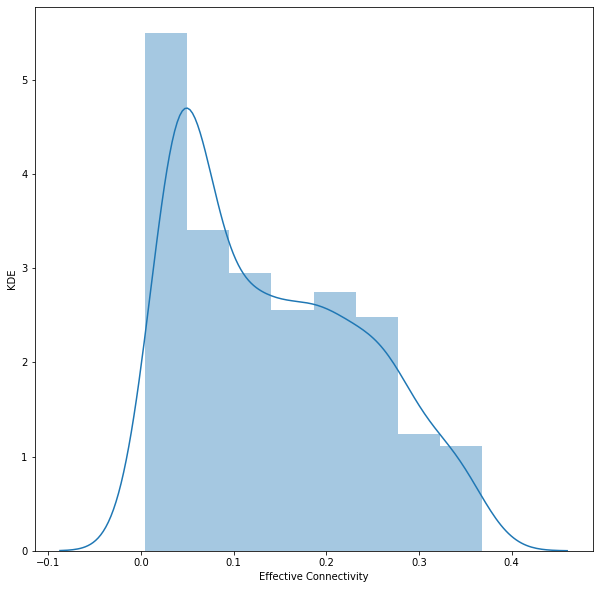

In [34]:
plt.clf()

fig, ax = plt.subplots(figsize = (10,10))

sns.distplot(effective_connectivity.values.flatten())

plt.ylabel('KDE')
plt.xlabel('Effective Connectivity')

plt.show()

<Figure size 432x288 with 0 Axes>

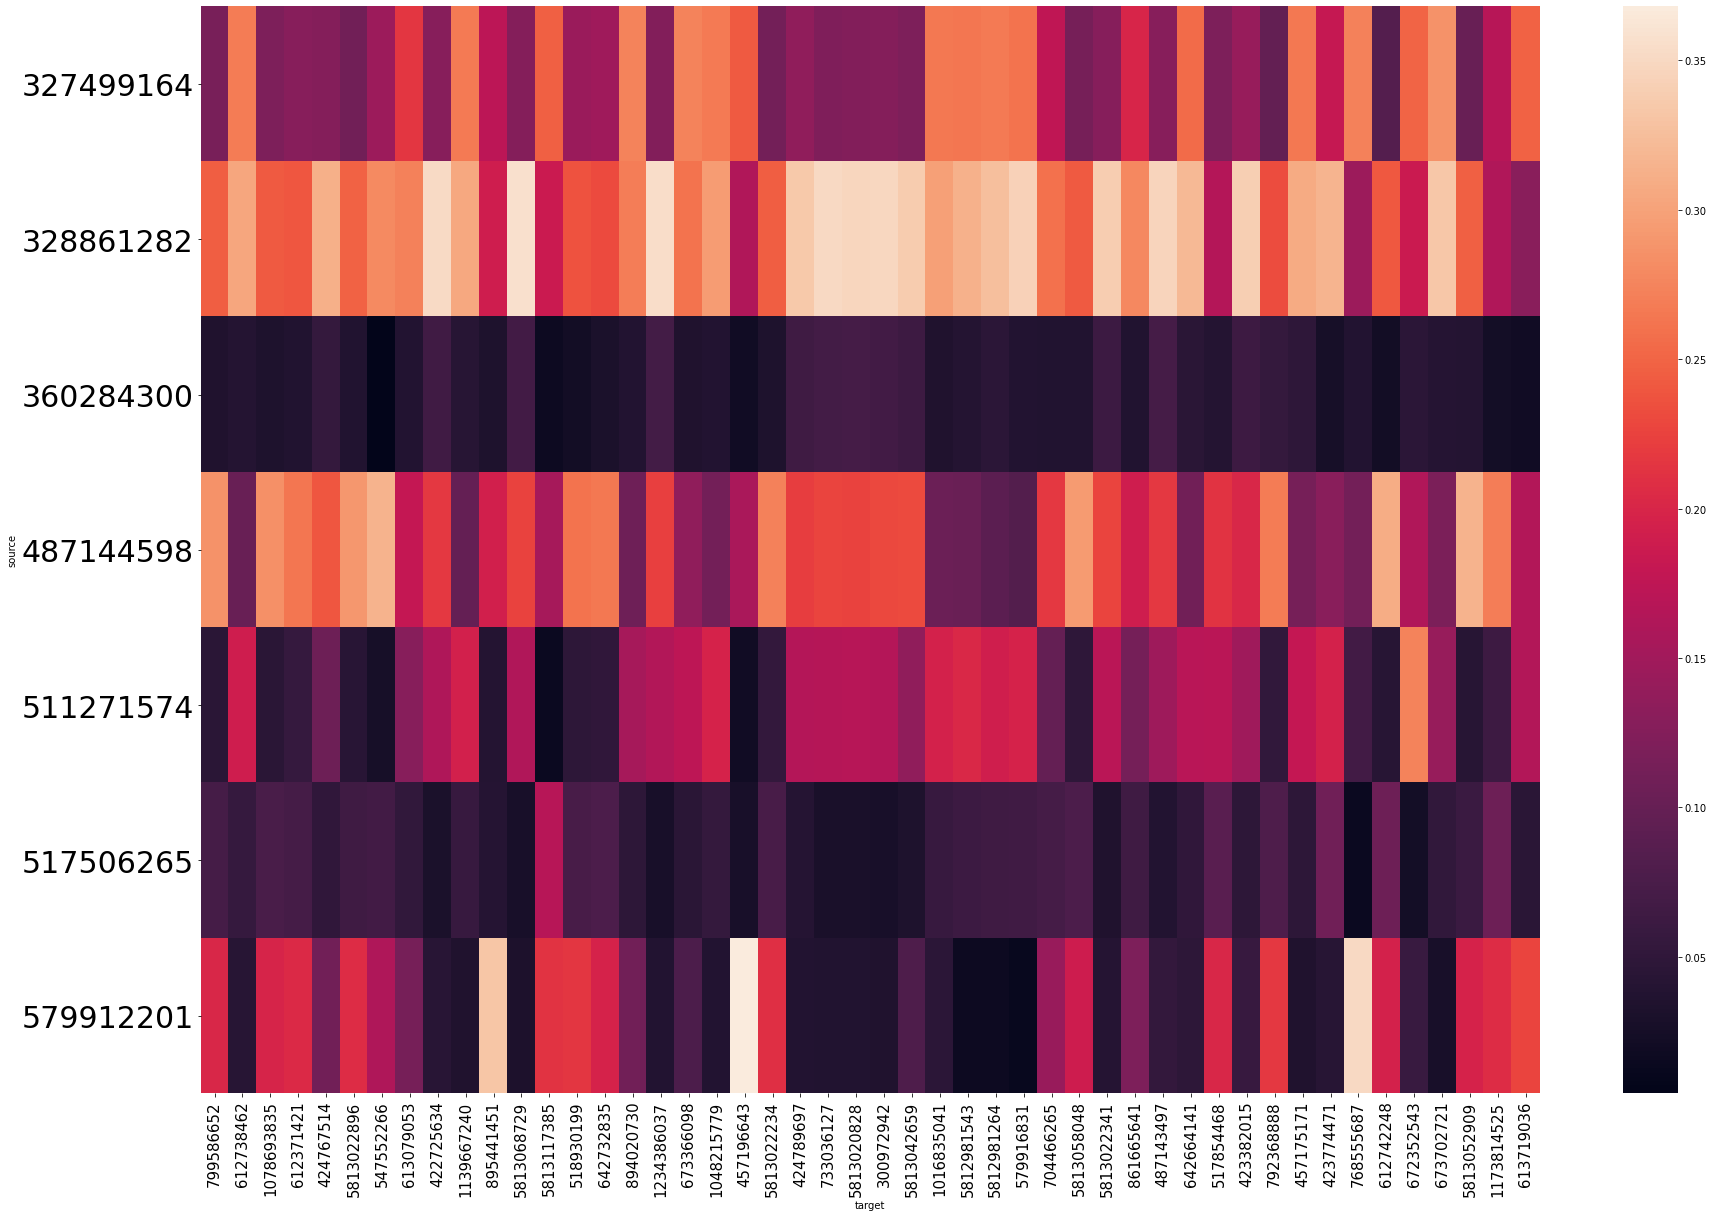

In [35]:
plt.clf()

fig, ax = plt.subplots(figsize = (30,20))

_ = sns.heatmap(effective_connectivity)

_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 15)

plt.show()

In [36]:
mbon_type_dict = dict(zip(mbon_df.bodyid, mbon_df.bodytype))
cent_name_dict = dict(zip(fib_cent_ca.id, fib_cent_ca.name))

In [37]:
named_effective_connectivity = effective_connectivity.copy()
named_effective_connectivity.index = [cent_name_dict[i] for i in named_effective_connectivity.index]
named_effective_connectivity.columns = [mbon_type_dict[i] for i in named_effective_connectivity.columns]
named_effective_connectivity

MBON05    MBON03    MBON09    MBON01    MBON11    MBON21  \
LHCENT2_R  0.116208  0.268279  0.120192  0.129360  0.126016  0.110756   
LHCENT1_R  0.245526  0.302786  0.242984  0.238981  0.312402  0.248129   
LHCENT8_R  0.034218  0.038905  0.033715  0.036551  0.054816  0.036470   
LHCENT3_R  0.286892  0.102362  0.285147  0.264243  0.239293  0.291164   
LHCENT8_R  0.045041  0.190136  0.044155  0.056310  0.105442  0.042878   
LHCENT4_R  0.070969  0.055920  0.075013  0.070080  0.051150  0.064293   
LHCENT5_R  0.201147  0.041612  0.198794  0.204475  0.110880  0.206311   

             MBON33    MBON04    MBON06    MBON13  ...    MBON20  MBON15-like  \
LHCENT2_R  0.145556  0.215485  0.128538  0.267140  ...  0.097152     0.265296   
LHCENT1_R  0.279496  0.271815  0.352364  0.304568  ...  0.232176     0.308185   
LHCENT8_R  0.004317  0.037577  0.065938  0.041780  ...  0.054562     0.048889   
LHCENT3_R  0.314900  0.179232  0.216886  0.099491  ...  0.268113     0.114963   
LHCENT8_R  0.026978  0.129200  0.162006  0.194193  ...  0.052292     0.179185   
LHCENT4_R  0.067986  0.052158  0.030840  0.057318  ...  0.078950     0.048148   
LHCENT5_R  0.160767  0.114533  0.043428  0.035509  ...  0.216756     0.035333   

             MBON19    MBON10    MBON25    MBON10    MBON15    MBON29  \
LHCENT2_R  0.181778  0.272388  0.084299  0.249074  0.286845  0.101645   
LHCENT1_R  0.315841  0.145522  0.241313  0.185847  0.333716  0.246233   
LHCENT8_R  0.025996  0.037313  0.022201  0.045635  0.040868  0.039319   
LHCENT3_R  0.130078  0.111940  0.309459  0.162831  0.118263  0.315352   
LHCENT8_R  0.195967  0.067164  0.041506  0.274074  0.141379  0.041280   
LHCENT4_R  0.108358  0.014925  0.105598  0.023810  0.051724  0.059752   
LHCENT5_R  0.041983  0.350746  0.195624  0.058730  0.027203  0.196418   

             MBON34    MBON10  
LHCENT2_R  0.168973  0.248485  
LHCENT1_R  0.162745  0.130303  
LHCENT8_R  0.023529  0.021212  
LHCENT3_R  0.269031  0.163636  
LHCENT8_R  0.062745  0.163636  
LHCENT4_R  0.105882  0.045455  
LHCENT5_R  0.207093  0.227273  

[7 rows x 48 columns]

<Figure size 432x288 with 0 Axes>

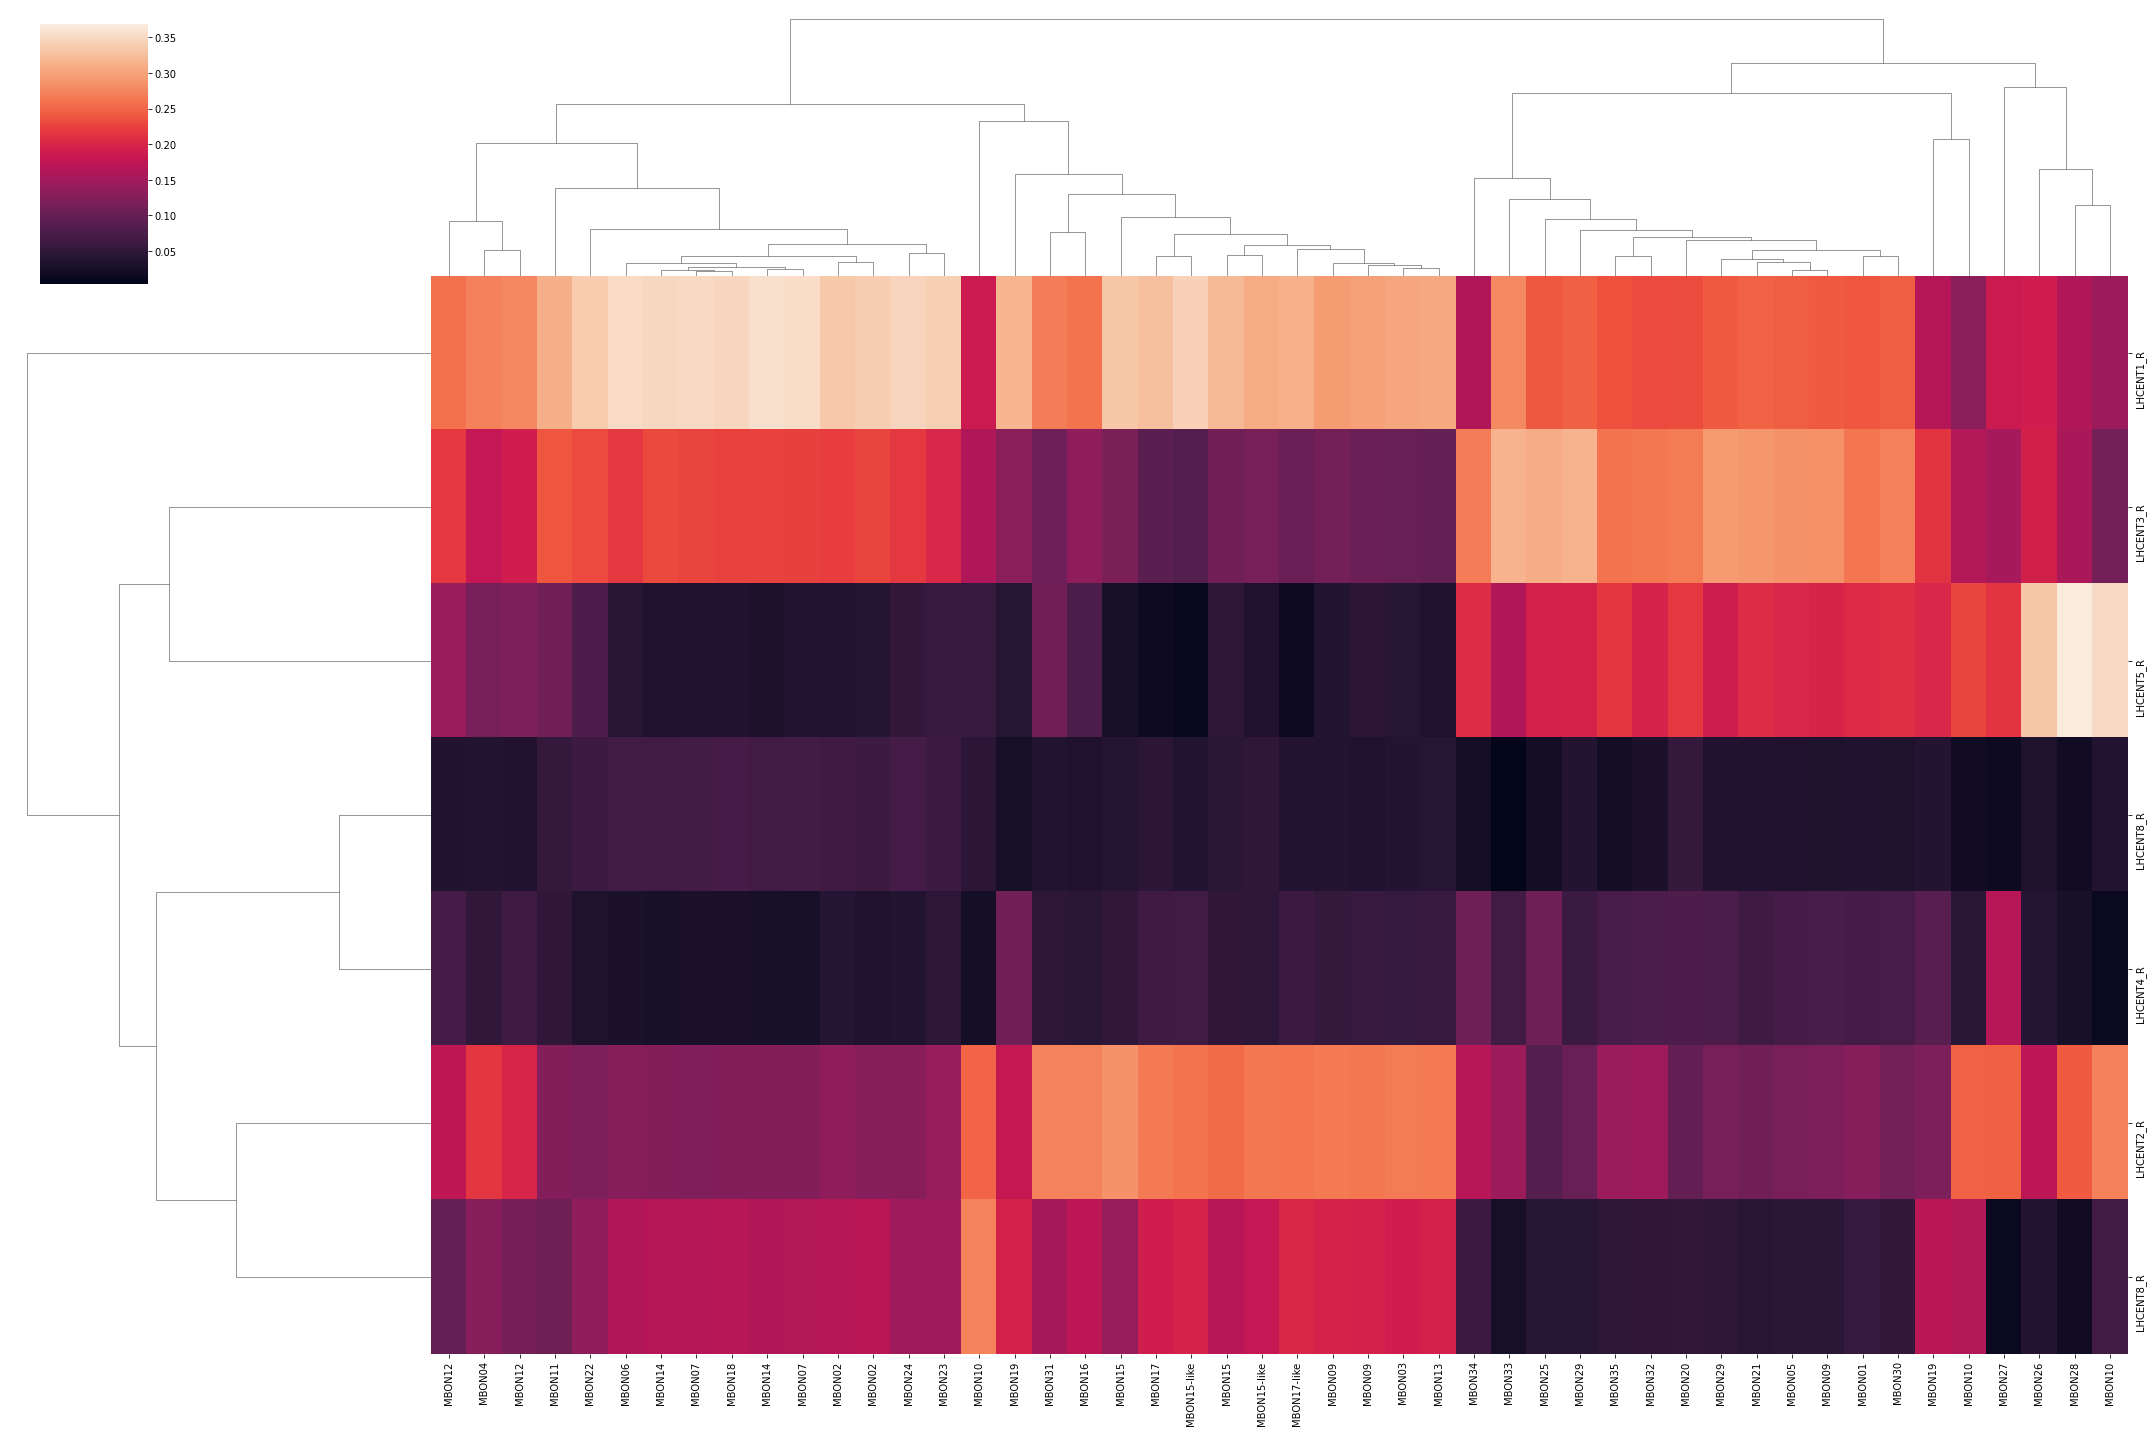

In [38]:
plt.clf()

clust = sns.clustermap(named_effective_connectivity, figsize = (30,20))

plt.show()

In [39]:
reordered_adjx = named_effective_connectivity.iloc[clust.dendrogram_row.reordered_ind,clust.dendrogram_col.reordered_ind].copy()

In [40]:
mbon_predictions = pd.read_csv("/Users/admin/Documents/LMB/First Year Report/september_2020/neurot_pred/MBON NT Prediction Results-GMR2.csv")
mbon_predictions.dropna(how = 'all', inplace=True)
mbon_predictions.head()

neutu bodyid     type                       name neurotransmitter  \
0    612371421.0  MBON01           MBON01(y5B'2a)_R              glu   
1    424789697.0  MBON02           MBON02(B2B'2a)_R              glu   
2    487925037.0  MBON03            MBON03(B'2mp)_R              glu   
3    487925063.0  MBON04  MBON04(B'2mp_bilateral)_R              glu   
4    799586652.0  MBON05          MBON05(y4>y1y2)_L              glu   

   FAFB skid MATCH NT Prediction results  % of top NT prediction  Unnamed: 7  \
0        2109445.0                   glu                    98.0         NaN   
1        1360012.0                   glu                    73.0         NaN   
2        5256152.0                   glu                    75.0         NaN   
3        3841770.0                   glu                    93.0         NaN   
4         870683.0                   glu                    72.0         NaN   

   Unnamed: 8  Unnamed: 9  ...  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0         NaN         NaN  ...          NaN          NaN          NaN   
1         NaN         NaN  ...          NaN          NaN          NaN   
2         NaN         NaN  ...          NaN          NaN          NaN   
3         NaN         NaN  ...          NaN          NaN          NaN   
4         NaN         NaN  ...          NaN          NaN          NaN   

   Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 20  Unnamed: 21  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 22 columns]

In [41]:
mbon_to_neurot = dict(zip(mbon_predictions.type.tolist(), mbon_predictions['NT Prediction results']))
mbon_to_neurot['MBON10'] = 'gaba'

In [42]:
neurot_to_col = {
    
    "gaba" : "#1bb6af",
    'unknown' : "#ababab",
    'ach' : "#ee4244",
    'glu' : "#8fda04",
}
neurot_to_col

{'gaba': '#1bb6af', 'unknown': '#ababab', 'ach': '#ee4244', 'glu': '#8fda04'}

In [43]:
mbon_to_color = dict(zip(reordered_adjx.columns.tolist(), [neurot_to_col[mbon_to_neurot[i]] for i in reordered_adjx.columns]))

In [44]:
cent_neurot = pd.read_csv('/Users/admin/Documents/LMB/Centrifugals/jefferislab_nt_predictions 2/level_2.csv')
cent_neurot

skid majorityNT  synapsesNT  synapsesSkid
0    1866895   dopamine         326           346
1     563760  glutamate         759          1048
2     181551       gaba         969          1034
3   11519759       gaba         564           792
4    1299740  glutamate         581           772
5     554327       gaba         826           870
6   13565080       gaba         934          1174
7   11519897       gaba         523           570
8   11543484       gaba        1011          1266
9    1288606       gaba         244           311
10   3394015       gaba         828          1264

In [45]:
fib_bid = [639585968,328861282,487144598,360284300,511271574,545738451,576773752,608465100,
           700884019,5813012889,5901208658,764339342,327499164,5813068669,330268940,517506265,
           359214479,359891881,5813046968,610601810,329225149,329897255,579912201]

fafb_skid = [2737889,3394015,11543484,554327,181551,3406328,1306961,4316192,
             3843810,3550733,16182188,2217060,13565080,1288606,11519759,563760,
             1543938,11523814,11522492,2200406,3307440,3307440,11519897]

fib_to_fafb_cent_dict = dict(zip(fib_bid, fafb_skid))
fib_to_fafb_cent_dict

{639585968: 2737889,
 328861282: 3394015,
 487144598: 11543484,
 360284300: 554327,
 511271574: 181551,
 545738451: 3406328,
 576773752: 1306961,
 608465100: 4316192,
 700884019: 3843810,
 5813012889: 3550733,
 5901208658: 16182188,
 764339342: 2217060,
 327499164: 13565080,
 5813068669: 1288606,
 330268940: 11519759,
 517506265: 563760,
 359214479: 1543938,
 359891881: 11523814,
 5813046968: 11522492,
 610601810: 2200406,
 329225149: 3307440,
 329897255: 3307440,
 579912201: 11519897}

In [46]:
cent_neurot_dict = dict(zip(cent_neurot.skid.tolist(), cent_neurot.majorityNT.tolist()))
cent_neurot_dict

{1866895: 'dopamine',
 563760: 'glutamate',
 181551: 'gaba',
 11519759: 'gaba',
 1299740: 'glutamate',
 554327: 'gaba',
 13565080: 'gaba',
 11519897: 'gaba',
 11543484: 'gaba',
 1288606: 'gaba',
 3394015: 'gaba'}

In [47]:
not_in_neurot = [i for i in fafb_skid if i not in cent_neurot.skid.tolist()]

unknown = ['Unknown'] * len([i for i in fafb_skid if i not in cent_neurot.skid.tolist()])

unknown_dict = dict(zip(not_in_neurot, unknown))

In [48]:
cent_neurot_dict = {**cent_neurot_dict, **unknown_dict}
cent_neurot_dict

{1866895: 'dopamine',
 563760: 'glutamate',
 181551: 'gaba',
 11519759: 'gaba',
 1299740: 'glutamate',
 554327: 'gaba',
 13565080: 'gaba',
 11519897: 'gaba',
 11543484: 'gaba',
 1288606: 'gaba',
 3394015: 'gaba',
 2737889: 'Unknown',
 3406328: 'Unknown',
 1306961: 'Unknown',
 4316192: 'Unknown',
 3843810: 'Unknown',
 3550733: 'Unknown',
 16182188: 'Unknown',
 2217060: 'Unknown',
 1543938: 'Unknown',
 11523814: 'Unknown',
 11522492: 'Unknown',
 2200406: 'Unknown',
 3307440: 'Unknown'}

In [49]:
new_cols = {'dopamine' : '#4287f5', 'glutamate' : "#8fda04"}
neurot_to_col = {**neurot_to_col, **new_cols}

In [50]:
cent_name_dict_rev = {s:k for k, s in cent_name_dict.items()}

In [51]:
cent_names = reordered_adjx.index.tolist()
cols = [neurot_to_col[cent_neurot_dict[fib_to_fafb_cent_dict[cent_name_dict_rev[i]]]] for i in reordered_adjx.index.tolist()]
cent_col_dict_names = dict(zip(cent_names, cols))

In [52]:
cent_col_dict_names

{'LHCENT1_R': '#1bb6af',
 'LHCENT3_R': '#1bb6af',
 'LHCENT5_R': '#1bb6af',
 'LHCENT8_R': '#1bb6af',
 'LHCENT4_R': '#8fda04',
 'LHCENT2_R': '#1bb6af'}

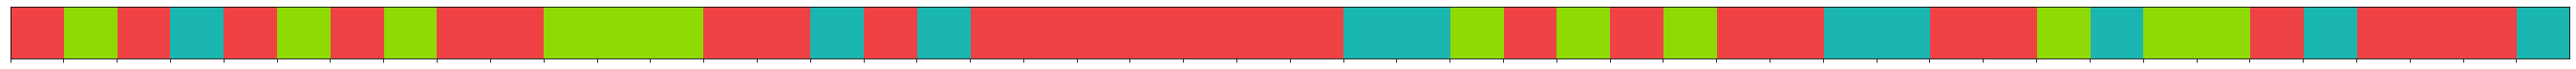

In [53]:
sns.palplot([mbon_to_color[i] for i in list(reordered_adjx.columns)])

<Figure size 432x288 with 0 Axes>

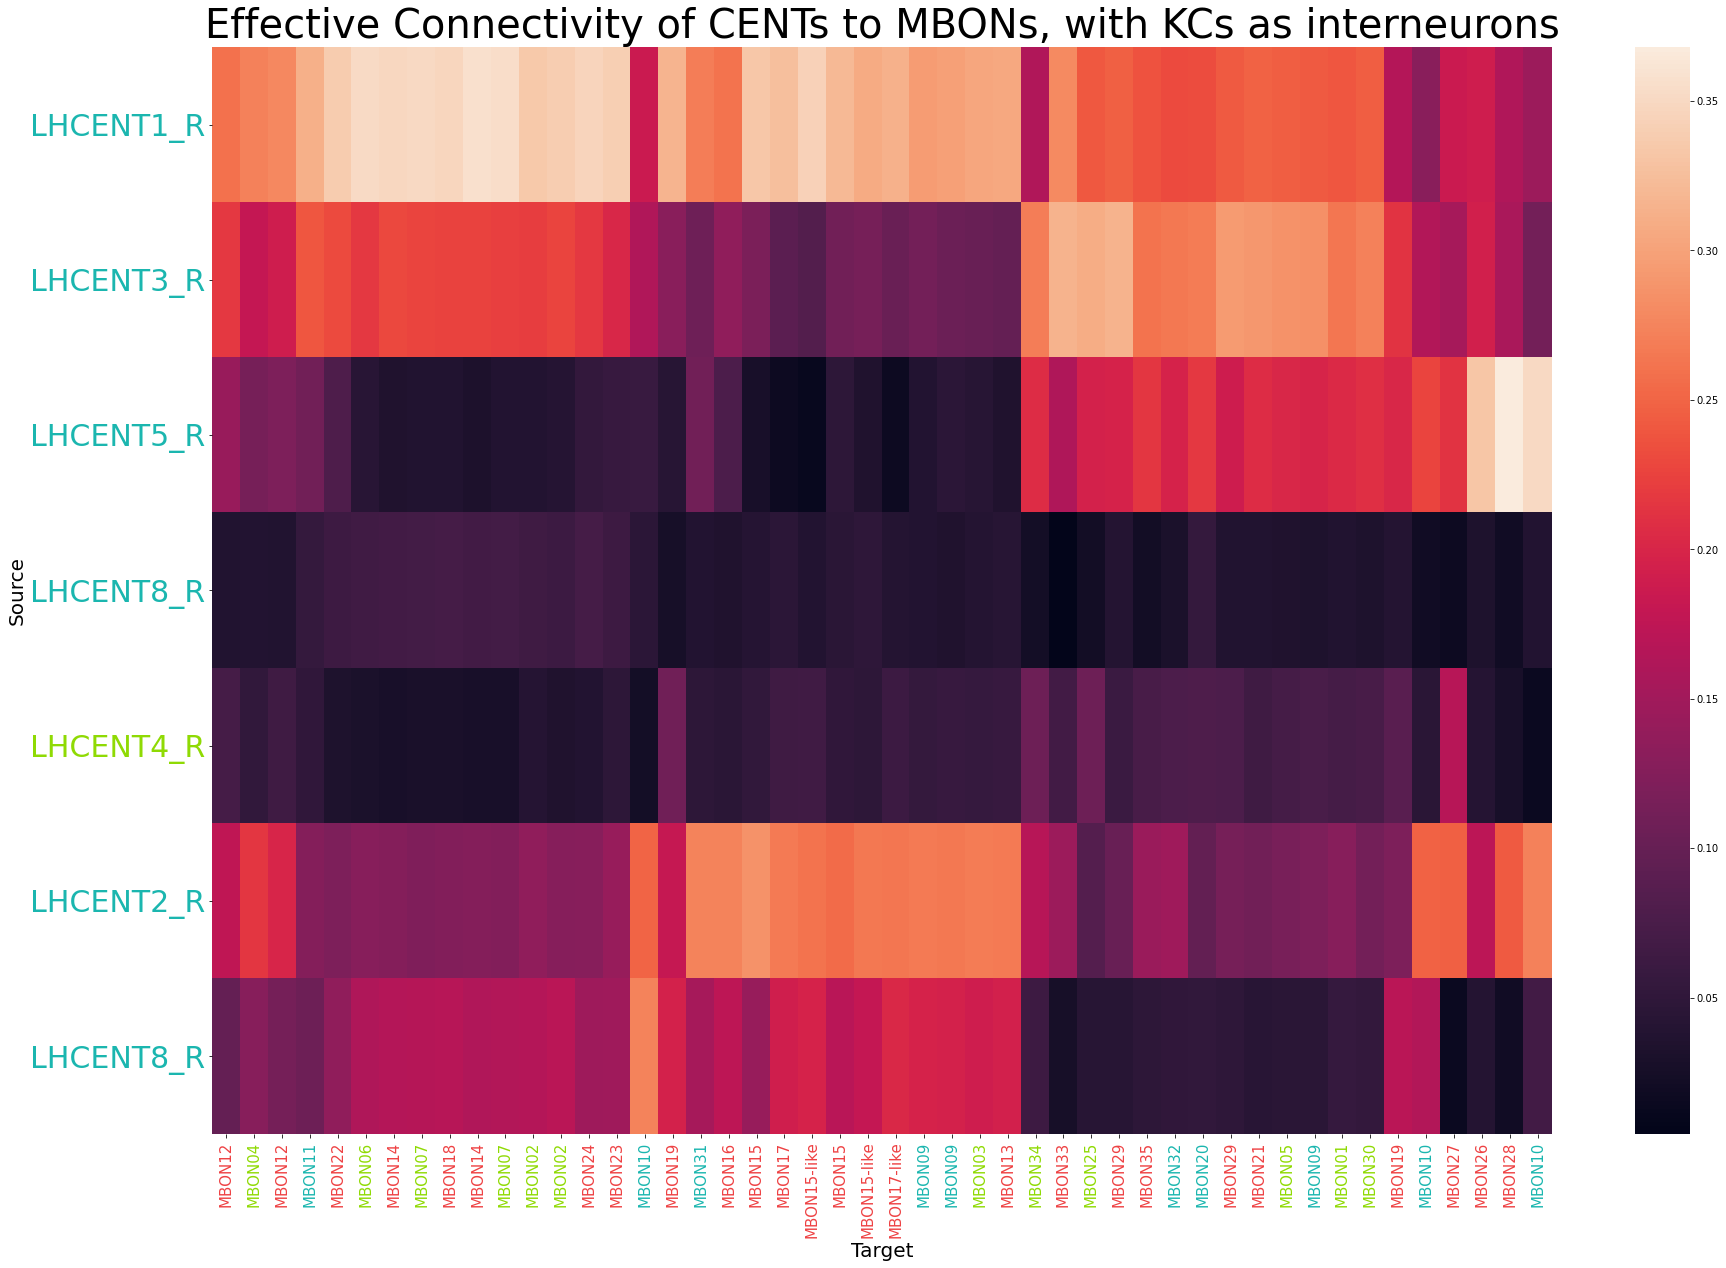

In [54]:
plt.clf()

fig, ax = plt.subplots(figsize = (30,20))

_ = sns.heatmap(reordered_adjx)

_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 15)

_.set_ylabel('Source', fontsize = 20)
_.set_xlabel('Target', fontsize = 20)

for x in _.get_yticklabels():
    tick_text = x.get_text()
    
    x.set_color(cent_col_dict_names[tick_text])
    
for x in _.get_xticklabels():
    tick_text = x.get_text()
    
    x.set_color(mbon_to_color[tick_text])

plt.title('Effective Connectivity of CENTs to MBONs, with KCs as interneurons', fontsize = 40)
plt.show()

# need to tidy the above so that mbons of the same type are grouped / only use RHS mbons

In [55]:
duplicated_dict = dict(Counter(list(reordered_adjx.columns)).most_common())

In [56]:
test = KC_to_mbon_adjx.copy()
test

target      799586652   612738462   1078693835  612371421   424767514   \
source                                                                   
5813032771       174.0         0.0        60.0        52.0        52.0   
1224137495        80.0         0.0        49.0        20.0        22.0   
799560834          0.0        61.0         0.0         2.0         1.0   
5813053885        39.0         0.0        18.0        58.0        26.0   
1173347968         0.0        58.0         0.0        21.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         6.0   
394755782          0.0         0.0         0.0         0.0         3.0   
301314208          0.0         0.0         0.0         0.0         8.0   
798537456          0.0         0.0         0.0         0.0        10.0   
922677121          0.0         0.0         0.0         0.0         5.0   

target      5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                  ...   
5813032771        52.0        43.0        41.0         0.0         0.0  ...   
1224137495        19.0        36.0        18.0         1.0         0.0  ...   
799560834          0.0         0.0         6.0         0.0        29.0  ...   
5813053885        19.0         0.0         1.0         0.0         0.0  ...   
1173347968         0.0         0.0        12.0         0.0        15.0  ...   
...                ...         ...         ...         ...         ...  ...   
332344539          0.0         0.0         0.0         5.0         0.0  ...   
394755782          0.0         0.0         0.0        10.0         0.0  ...   
301314208          0.0         0.0         0.0         6.0         0.0  ...   
798537456          0.0         0.0         0.0         5.0         0.0  ...   
922677121          0.0         0.0         0.0         6.0         0.0  ...   

target      792368888   457175171   423774471   768555687   612742248   \
source                                                                   
5813032771         2.0         0.0         0.0         0.0         0.0   
1224137495         0.0         0.0         0.0         0.0         0.0   
799560834          0.0         3.0         3.0         0.0         0.0   
5813053885         8.0         0.0         0.0         0.0         3.0   
1173347968         0.0         1.0         0.0         3.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         0.0   
394755782          0.0         0.0         0.0         0.0         0.0   
301314208          0.0         0.0         0.0         0.0         0.0   
798537456          0.0         0.0         0.0         0.0         0.0   
922677121          0.0         0.0         0.0         0.0         0.0   

target      672352543   673702721   5813052909  1173814525  613719036   
source                                                                  
5813032771         0.0         0.0         0.0         0.0         1.0  
1224137495         0.0         0.0         0.0         0.0         0.0  
799560834          0.0         5.0         0.0         0.0         0.0  
5813053885         0.0         0.0         1.0         0.0         0.0  
1173347968         0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
332344539          0.0         0.0         0.0         0.0         0.0  
394755782          0.0         0.0         0.0         0.0         0.0  
301314208          0.0         0.0         0.0         0.0         0.0  
798537456          0.0         0.0         0.0         0.0         0.0  
922677121          0.0         0.0         0.0         0.0         0.0  

[919 rows x 48 columns]

In [57]:
test_named = test.copy()
test_named.columns = [mbon_type_dict[i] for i in test_named.columns]
test_named

MBON05  MBON03  MBON09  MBON01  MBON11  MBON21  MBON33  MBON04  \
source                                                                       
5813032771   174.0     0.0    60.0    52.0    52.0    52.0    43.0    41.0   
1224137495    80.0     0.0    49.0    20.0    22.0    19.0    36.0    18.0   
799560834      0.0    61.0     0.0     2.0     1.0     0.0     0.0     6.0   
5813053885    39.0     0.0    18.0    58.0    26.0    19.0     0.0     1.0   
1173347968     0.0    58.0     0.0    21.0     0.0     0.0     0.0    12.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
332344539      0.0     0.0     0.0     0.0     6.0     0.0     0.0     0.0   
394755782      0.0     0.0     0.0     0.0     3.0     0.0     0.0     0.0   
301314208      0.0     0.0     0.0     0.0     8.0     0.0     0.0     0.0   
798537456      0.0     0.0     0.0     0.0    10.0     0.0     0.0     0.0   
922677121      0.0     0.0     0.0     0.0     5.0     0.0     0.0     0.0   

            MBON06  MBON13  ...  MBON20  MBON15-like  MBON19  MBON10  MBON25  \
source                      ...                                                
5813032771     0.0     0.0  ...     2.0          0.0     0.0     0.0     0.0   
1224137495     1.0     0.0  ...     0.0          0.0     0.0     0.0     0.0   
799560834      0.0    29.0  ...     0.0          3.0     3.0     0.0     0.0   
5813053885     0.0     0.0  ...     8.0          0.0     0.0     0.0     3.0   
1173347968     0.0    15.0  ...     0.0          1.0     0.0     3.0     0.0   
...            ...     ...  ...     ...          ...     ...     ...     ...   
332344539      5.0     0.0  ...     0.0          0.0     0.0     0.0     0.0   
394755782     10.0     0.0  ...     0.0          0.0     0.0     0.0     0.0   
301314208      6.0     0.0  ...     0.0          0.0     0.0     0.0     0.0   
798537456      5.0     0.0  ...     0.0          0.0     0.0     0.0     0.0   
922677121      6.0     0.0  ...     0.0          0.0     0.0     0.0     0.0   

            MBON10  MBON15  MBON29  MBON34  MBON10  
source                                              
5813032771     0.0     0.0     0.0     0.0     1.0  
1224137495     0.0     0.0     0.0     0.0     0.0  
799560834      0.0     5.0     0.0     0.0     0.0  
5813053885     0.0     0.0     1.0     0.0     0.0  
1173347968     0.0     0.0     0.0     0.0     0.0  
...            ...     ...     ...     ...     ...  
332344539      0.0     0.0     0.0     0.0     0.0  
394755782      0.0     0.0     0.0     0.0     0.0  
301314208      0.0     0.0     0.0     0.0     0.0  
798537456      0.0     0.0     0.0     0.0     0.0  
922677121      0.0     0.0     0.0     0.0     0.0  

[919 rows x 48 columns]

In [58]:
#test_named_grouped = test_named.groupby(lambda x:x, axis = 1).sum().copy()
#test_named_grouped
test_named_grouped = test_named.groupby(lambda x:x, axis = 1).mean().copy()
test_named_grouped

MBON01  MBON02  MBON03  MBON04  MBON05  MBON06  MBON07     MBON09  \
source                                                                          
5813032771    52.0     0.5     0.0    41.0   174.0     0.0     0.5  20.000000   
1224137495    20.0     0.0     0.0    18.0    80.0     1.0     0.0  16.666667   
799560834      2.0     5.0    61.0     6.0     0.0     0.0     0.0   9.333333   
5813053885    58.0     0.0     0.0     1.0    39.0     0.0     0.0   6.000000   
1173347968    21.0     1.0    58.0    12.0     0.0     0.0     0.0   9.666667   
...            ...     ...     ...     ...     ...     ...     ...        ...   
332344539      0.0     5.0     0.0     0.0     0.0     5.0     6.5   0.000000   
394755782      0.0     5.0     0.0     0.0     0.0    10.0     8.0   0.000000   
301314208      0.0     4.0     0.0     0.0     0.0     6.0     8.5   0.000000   
798537456      0.0     6.5     0.0     0.0     0.0     5.0     9.0   0.000000   
922677121      0.0     2.0     0.0     0.0     0.0     6.0     5.5   0.000000   

              MBON10  MBON11  ...  MBON26  MBON27  MBON28  MBON29  MBON30  \
source                        ...                                           
5813032771  0.333333    52.0  ...    26.0     9.0     0.0     8.0     5.0   
1224137495  0.000000    22.0  ...    15.0    10.0     0.0     2.5     2.0   
799560834   0.000000     1.0  ...     0.0     0.0     0.0     0.0     0.0   
5813053885  0.000000    26.0  ...     1.0     0.0     0.0     7.0    14.0   
1173347968  1.000000     0.0  ...     5.0     0.0     0.0     0.0     0.0   
...              ...     ...  ...     ...     ...     ...     ...     ...   
332344539   0.000000     6.0  ...     0.0     0.0     0.0     0.0     0.0   
394755782   0.000000     3.0  ...     0.0     0.0     0.0     0.0     0.0   
301314208   0.000000     8.0  ...     0.0     0.0     0.0     0.0     0.0   
798537456   0.000000    10.0  ...     0.0     0.0     0.0     0.0     0.0   
922677121   0.000000     5.0  ...     0.0     0.0     0.0     0.0     0.0   

            MBON31  MBON32  MBON33  MBON34  MBON35  
source                                              
5813032771     0.0    20.0    43.0     0.0    12.0  
1224137495     0.0    33.0    36.0     0.0    33.0  
799560834     12.0     1.0     0.0     0.0     0.0  
5813053885     0.0    14.0     0.0     0.0     5.0  
1173347968     9.0     1.0     0.0     0.0     0.0  
...            ...     ...     ...     ...     ...  
332344539      0.0     0.0     0.0     0.0     0.0  
394755782      0.0     0.0     0.0     0.0     0.0  
301314208      0.0     0.0     0.0     0.0     0.0  
798537456      0.0     0.0     0.0     0.0     0.0  
922677121      0.0     0.0     0.0     0.0     0.0  

[919 rows x 36 columns]

# Threshold > 10 synapses

In [59]:
test_named_grouped_norm = test_named_grouped.div(test_named_grouped.sum(axis = 0), axis = 1).copy()

In [60]:
new_eff_conn = KC_only_norm @ test_named_grouped_norm
new_eff_conn

MBON01    MBON02    MBON03    MBON04    MBON05    MBON06  \
source                                                                  
327499164  0.129360  0.132205  0.268279  0.215485  0.116208  0.128538   
328861282  0.238981  0.336642  0.302786  0.271815  0.245526  0.352364   
360284300  0.036551  0.063284  0.038905  0.037577  0.034218  0.065938   
487144598  0.264243  0.223590  0.102362  0.179232  0.286892  0.216886   
511271574  0.056310  0.168178  0.190136  0.129200  0.045041  0.162006   
517506265  0.070080  0.037437  0.055920  0.052158  0.070969  0.030840   
579912201  0.204475  0.038663  0.041612  0.114533  0.201147  0.043428   

             MBON07    MBON09    MBON10    MBON11  ...    MBON26    MBON27  \
source                                             ...                       
327499164  0.122738  0.189075  0.255242  0.126016  ...  0.172183  0.246488   
328861282  0.352691  0.268170  0.162634  0.312402  ...  0.190297  0.185922   
360284300  0.069590  0.034967  0.037970  0.054816  ...  0.033451  0.017098   
487144598  0.224493  0.201443  0.149261  0.239293  ...  0.193036  0.153858   
511271574  0.165185  0.115964  0.193683  0.105442  ...  0.038928  0.014833   
517506265  0.028468  0.066119  0.026210  0.051150  ...  0.040141  0.168662   
579912201  0.036835  0.124262  0.175000  0.110880  ...  0.331964  0.213139   

             MBON28    MBON29    MBON30    MBON31    MBON32    MBON33  \
source                                                                  
327499164  0.242553  0.112496  0.111741  0.273925  0.148013  0.145556   
328861282  0.162766  0.242713  0.245266  0.269713  0.230931  0.279496   
360284300  0.021277  0.036483  0.033766  0.037030  0.030884  0.004317   
487144598  0.157447  0.296242  0.272433  0.107725  0.265233  0.314900   
511271574  0.020213  0.047402  0.053939  0.153783  0.050554  0.026978   
517506265  0.027660  0.075136  0.073422  0.048023  0.077393  0.067986   
579912201  0.368085  0.189528  0.209433  0.109801  0.196993  0.160767   

             MBON34    MBON35  
source                         
327499164  0.168973  0.143933  
328861282  0.162745  0.236227  
360284300  0.023529  0.022329  
487144598  0.269031  0.261389  
511271574  0.062745  0.047601  
517506265  0.105882  0.073368  
579912201  0.207093  0.215152  

[7 rows x 36 columns]

In [61]:
new_eff_conn.index = [cent_name_dict[i] for i in new_eff_conn.index]

<Figure size 432x288 with 0 Axes>

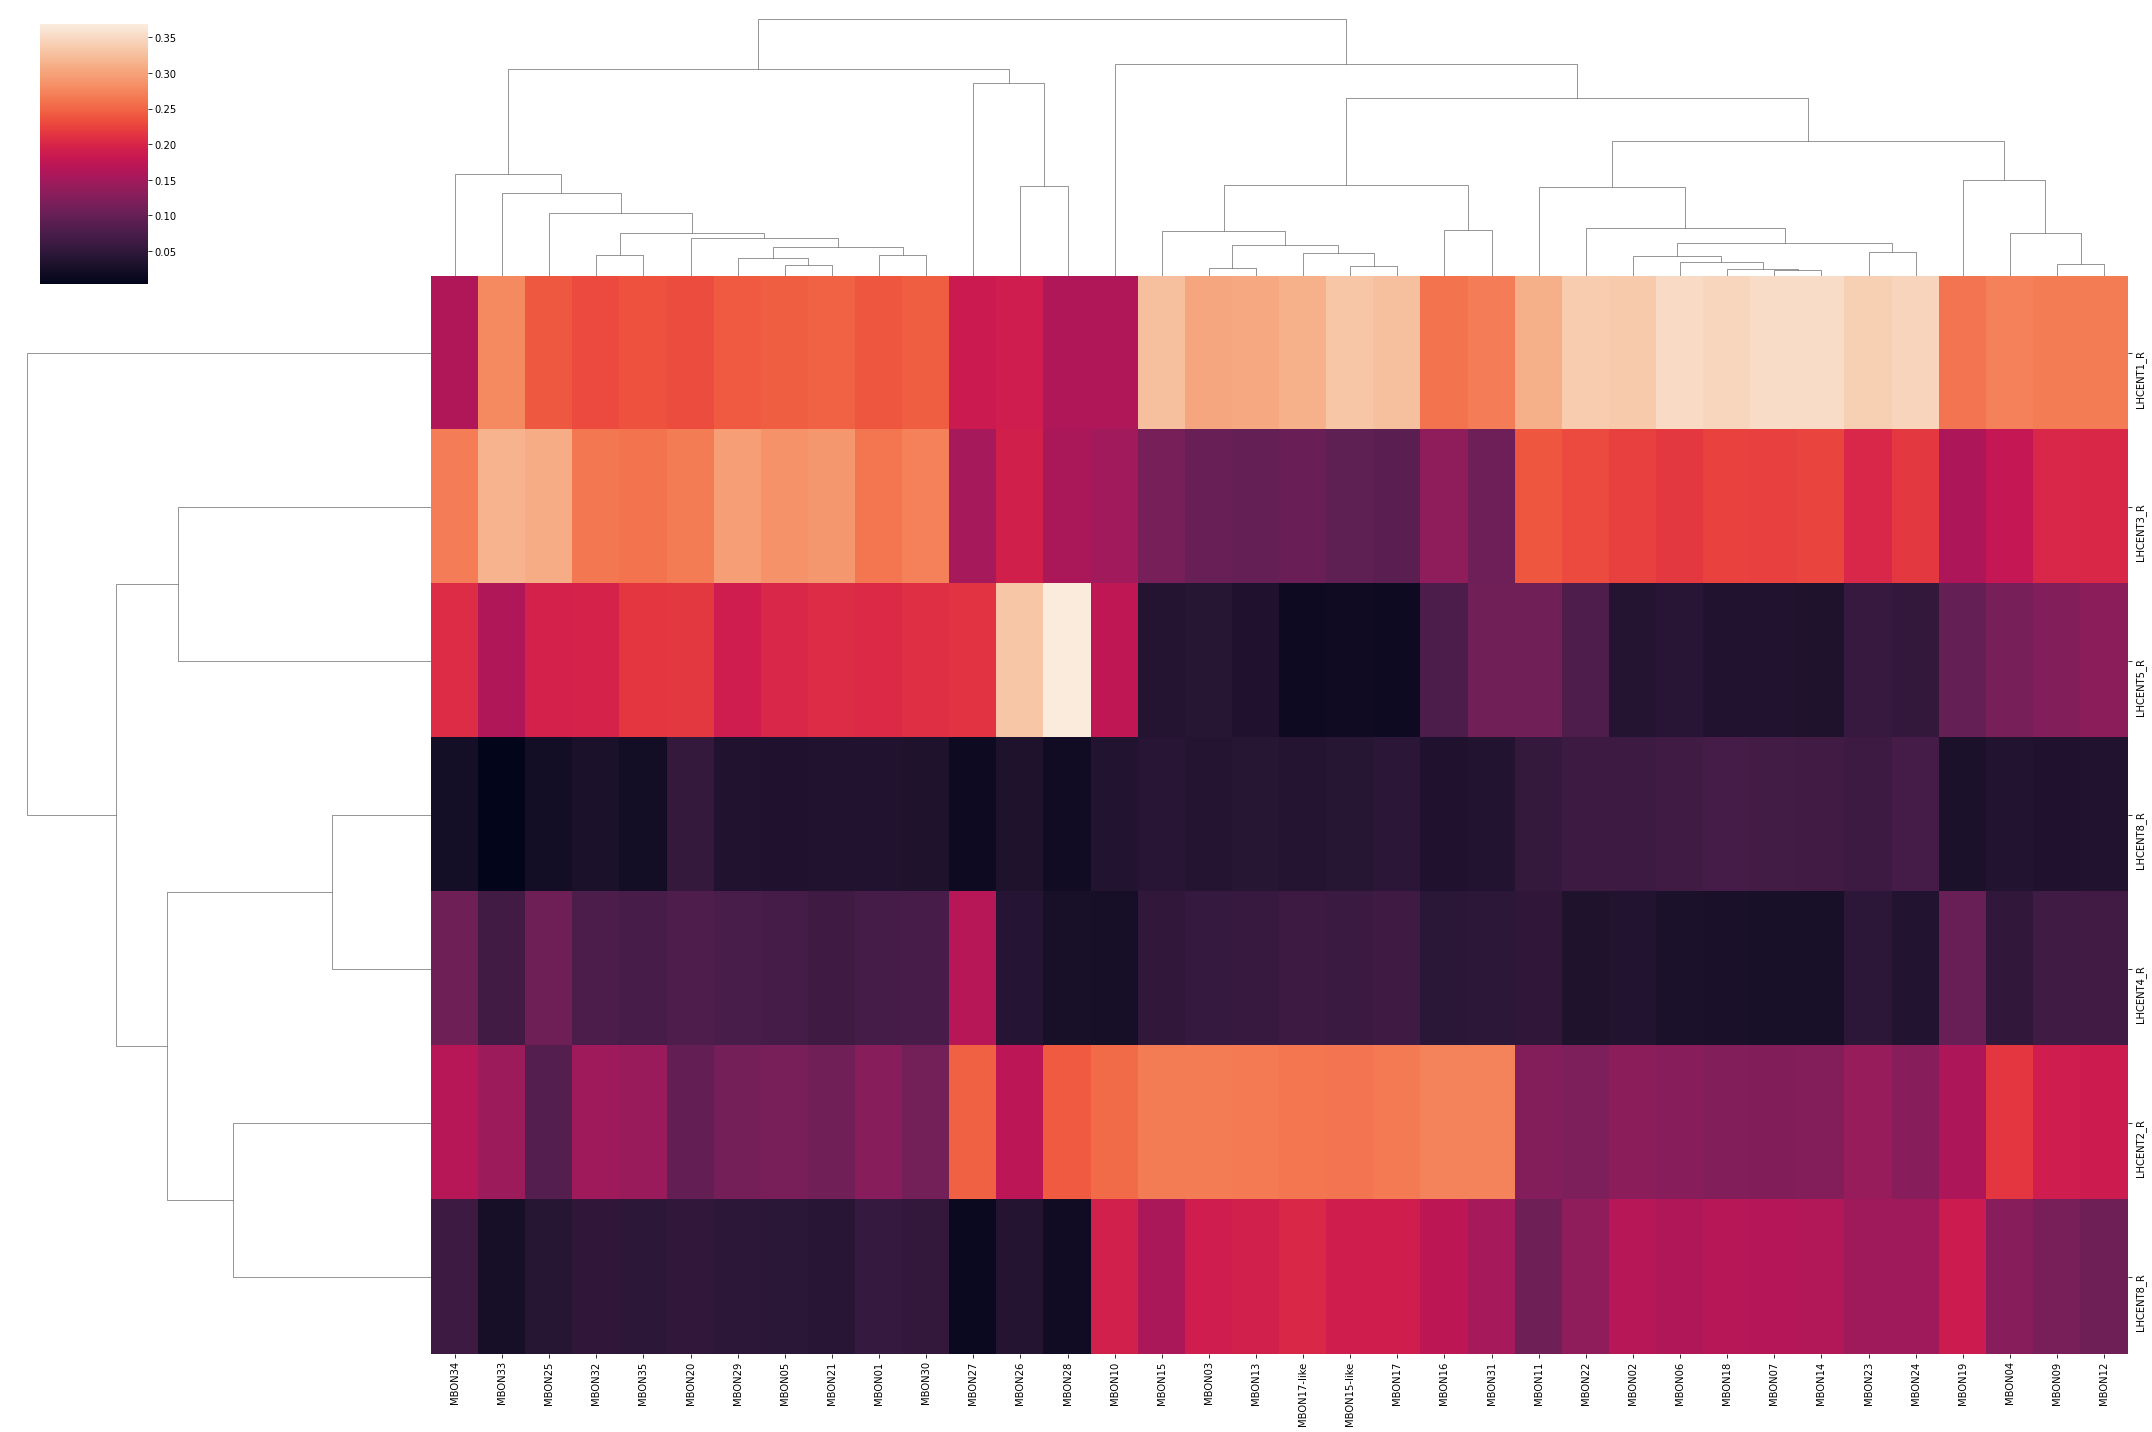

In [62]:
plt.clf()

# Using average euclidean clustering

clust = sns.clustermap(new_eff_conn, figsize = (30,20))

plt.show()

In [63]:
reordered_adjx_new_eff_conn = new_eff_conn.iloc[clust.dendrogram_row.reordered_ind, 
                                                clust.dendrogram_col.reordered_ind].copy()

In [64]:
# nl = []

# for i in reordered_adjx_new_eff_conn.columns:
    
#     if duplicated_dict[i] > 1:
        
#         lab = i + '* summed'
        
#         nl.append(lab)
        
#     else:
        
#         nl.append(i)
# nl

nl = []

for i in reordered_adjx_new_eff_conn.columns:
    
    if duplicated_dict[i] > 1:
        
        lab = i + '* averaged'
        
        nl.append(lab)
        
    else:
        
        nl.append(i)
nl

['MBON34',
 'MBON33',
 'MBON25',
 'MBON32',
 'MBON35',
 'MBON20',
 'MBON29* averaged',
 'MBON05',
 'MBON21',
 'MBON01',
 'MBON30',
 'MBON27',
 'MBON26',
 'MBON28',
 'MBON10* averaged',
 'MBON15* averaged',
 'MBON03',
 'MBON13',
 'MBON17-like',
 'MBON15-like* averaged',
 'MBON17',
 'MBON16',
 'MBON31',
 'MBON11',
 'MBON22',
 'MBON02* averaged',
 'MBON06',
 'MBON18',
 'MBON07* averaged',
 'MBON14* averaged',
 'MBON23',
 'MBON24',
 'MBON19* averaged',
 'MBON04',
 'MBON09* averaged',
 'MBON12* averaged']

In [65]:
sns.set(rc={'axes.facecolor':'white'})

In [66]:
mbon_to_color

{'MBON12': '#ee4244',
 'MBON04': '#8fda04',
 'MBON11': '#1bb6af',
 'MBON22': '#ee4244',
 'MBON06': '#8fda04',
 'MBON14': '#ee4244',
 'MBON07': '#8fda04',
 'MBON18': '#ee4244',
 'MBON02': '#8fda04',
 'MBON24': '#ee4244',
 'MBON23': '#ee4244',
 'MBON10': '#1bb6af',
 'MBON19': '#ee4244',
 'MBON31': '#1bb6af',
 'MBON16': '#ee4244',
 'MBON15': '#ee4244',
 'MBON17': '#ee4244',
 'MBON15-like': '#ee4244',
 'MBON17-like': '#ee4244',
 'MBON09': '#1bb6af',
 'MBON03': '#8fda04',
 'MBON13': '#ee4244',
 'MBON34': '#8fda04',
 'MBON33': '#ee4244',
 'MBON25': '#8fda04',
 'MBON29': '#ee4244',
 'MBON35': '#ee4244',
 'MBON32': '#1bb6af',
 'MBON20': '#1bb6af',
 'MBON21': '#ee4244',
 'MBON05': '#8fda04',
 'MBON01': '#8fda04',
 'MBON30': '#8fda04',
 'MBON27': '#ee4244',
 'MBON26': '#ee4244',
 'MBON28': '#ee4244'}

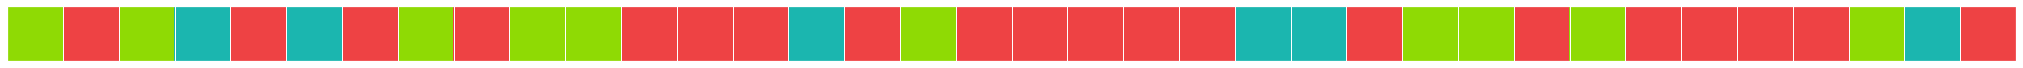

In [67]:
sns.palplot([mbon_to_color[i] for i in reordered_adjx_new_eff_conn.columns])

In [68]:
reordered_adjx_new_eff_conn

MBON34    MBON33    MBON25    MBON32    MBON35    MBON20  \
LHCENT1_R  0.162745  0.279496  0.241313  0.230931  0.236227  0.232176   
LHCENT3_R  0.269031  0.314900  0.309459  0.265233  0.261389  0.268113   
LHCENT5_R  0.207093  0.160767  0.195624  0.196993  0.215152  0.216756   
LHCENT8_R  0.023529  0.004317  0.022201  0.030884  0.022329  0.054562   
LHCENT4_R  0.105882  0.067986  0.105598  0.077393  0.073368  0.078950   
LHCENT2_R  0.168973  0.145556  0.084299  0.148013  0.143933  0.097152   
LHCENT8_R  0.062745  0.026978  0.041506  0.050554  0.047601  0.052292   

             MBON29    MBON05    MBON21    MBON01  ...    MBON06    MBON18  \
LHCENT1_R  0.242713  0.245526  0.248129  0.238981  ...  0.352364  0.347669   
LHCENT3_R  0.296242  0.286892  0.291164  0.264243  ...  0.216886  0.225215   
LHCENT5_R  0.189528  0.201147  0.206311  0.204475  ...  0.043428  0.035613   
LHCENT8_R  0.036483  0.034218  0.036470  0.036551  ...  0.065938  0.070224   
LHCENT4_R  0.075136  0.070969  0.064293  0.070080  ...  0.030840  0.028638   
LHCENT2_R  0.112496  0.116208  0.110756  0.129360  ...  0.128538  0.124678   
LHCENT8_R  0.047402  0.045041  0.042878  0.056310  ...  0.162006  0.167963   

             MBON07    MBON14    MBON23    MBON24    MBON19    MBON04  \
LHCENT1_R  0.352691  0.353417  0.340372  0.346320  0.262313  0.271815   
LHCENT3_R  0.224493  0.227195  0.201243  0.217108  0.159769  0.179232   
LHCENT5_R  0.036835  0.033458  0.057629  0.052848  0.098752  0.114533   
LHCENT8_R  0.069590  0.067662  0.063557  0.070558  0.030805  0.037577   
LHCENT4_R  0.028468  0.028363  0.047078  0.037199  0.101436  0.052158   
LHCENT2_R  0.122738  0.126154  0.141981  0.128228  0.159636  0.215485   
LHCENT8_R  0.165185  0.163750  0.148141  0.147739  0.187289  0.129200   

             MBON09    MBON12  
LHCENT1_R  0.268170  0.268427  
LHCENT3_R  0.201443  0.202843  
LHCENT5_R  0.124262  0.131842  
LHCENT8_R  0.034967  0.036331  
LHCENT4_R  0.066119  0.067096  
LHCENT2_R  0.189075  0.187179  
LHCENT8_R  0.115964  0.106283  

[7 rows x 36 columns]

# Threshold > 10 synapses? 

<Figure size 432x288 with 0 Axes>

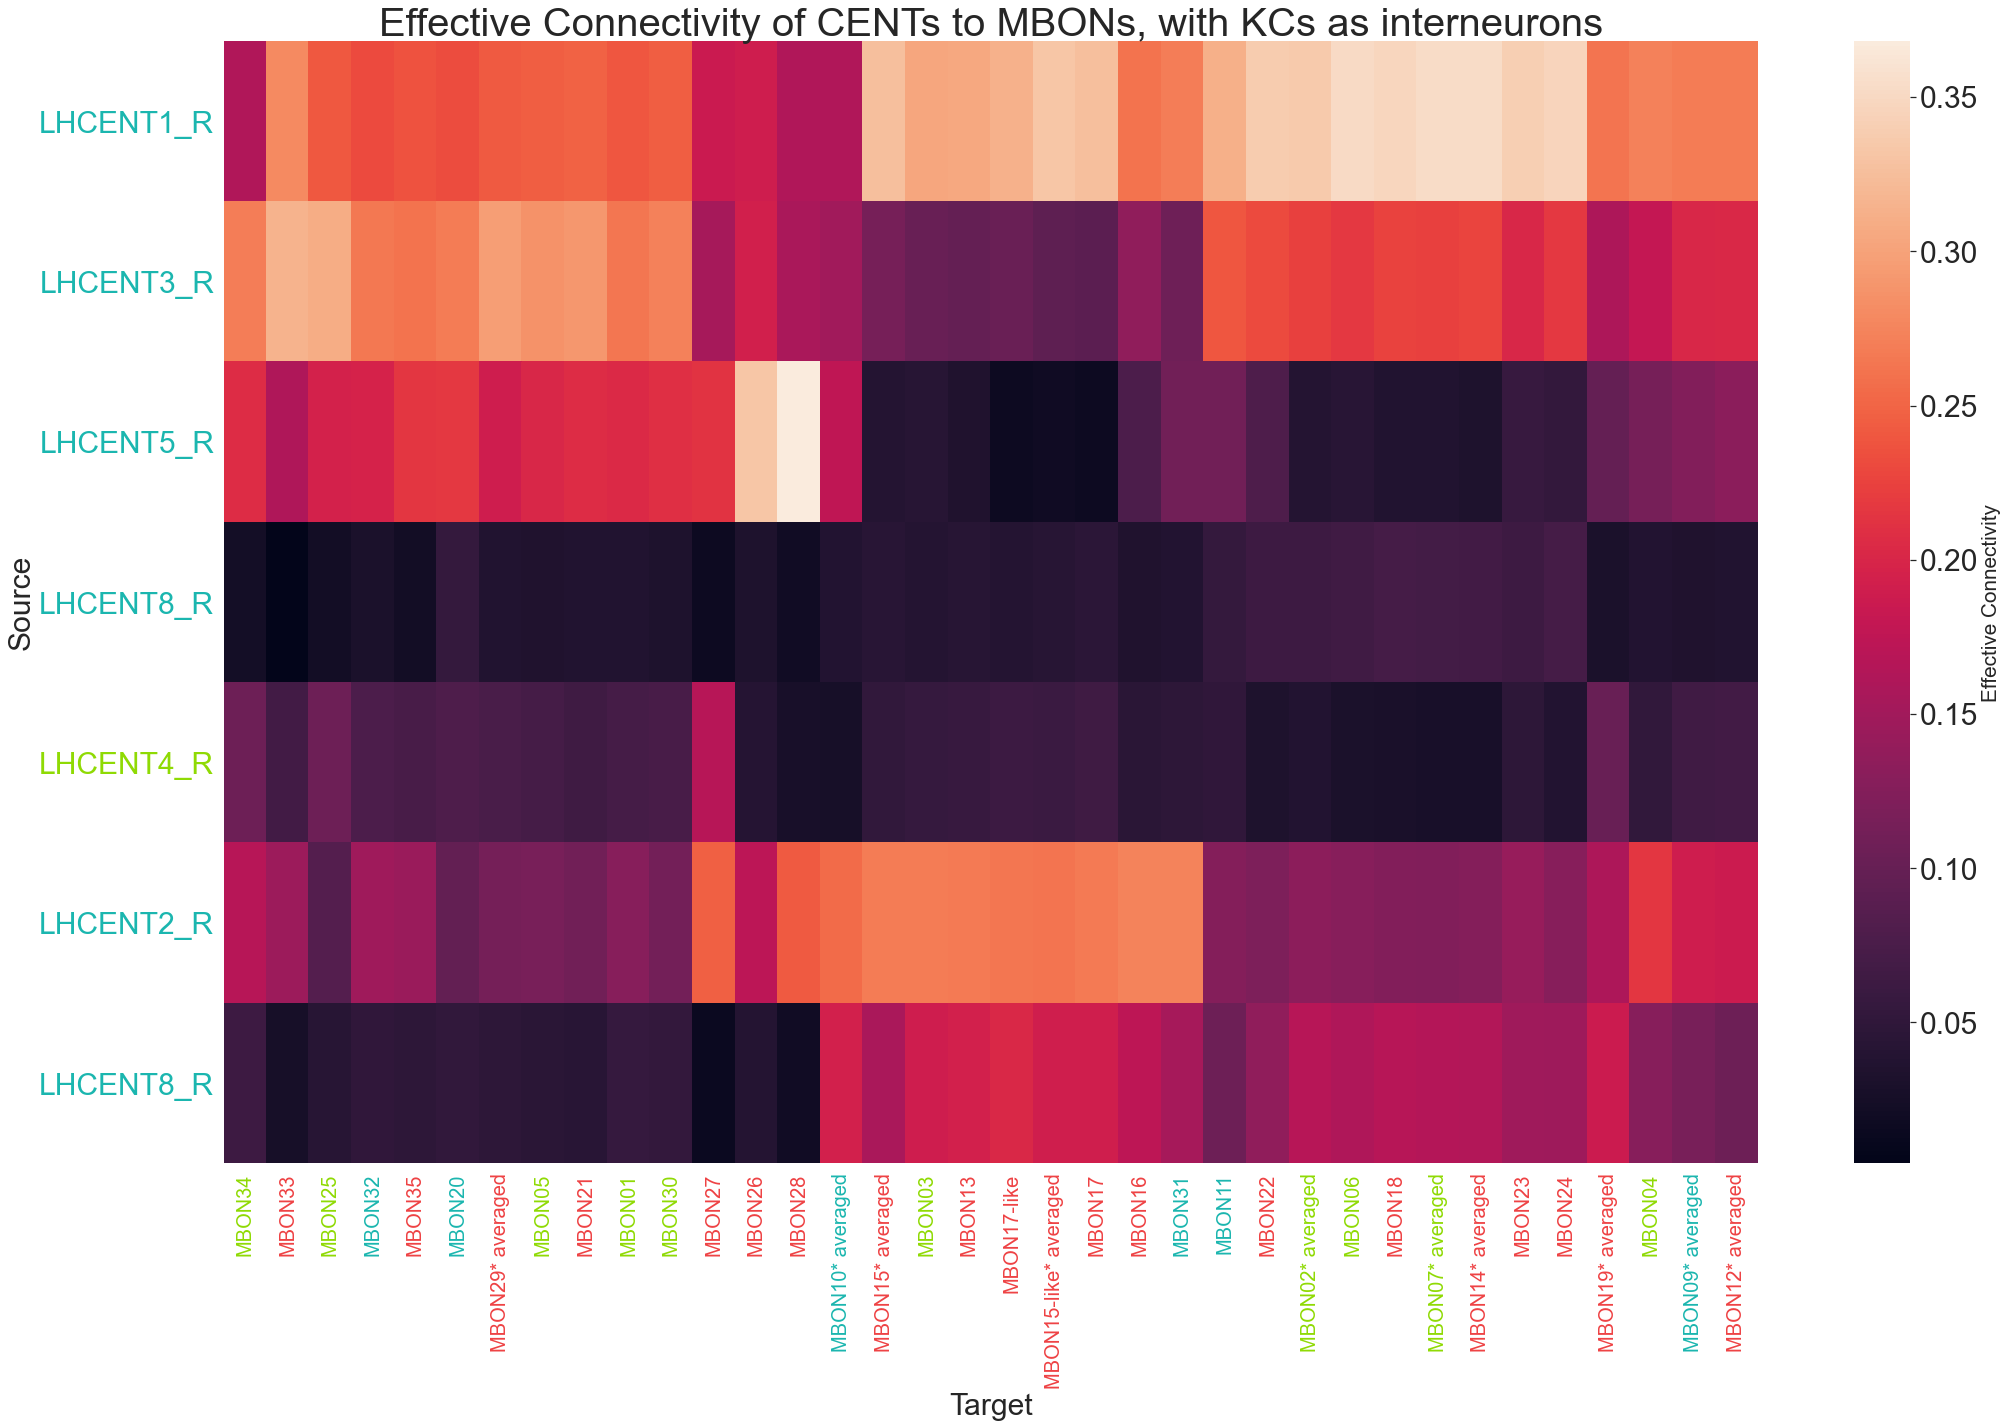

In [69]:
plt.clf()

fig, ax = plt.subplots(figsize = (30,20))

_ = sns.heatmap(reordered_adjx_new_eff_conn)

_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 20)

_.set_ylabel('Source', fontsize = 30)
_.set_xlabel('Target', fontsize = 30)

for x in _.get_yticklabels():
    tick_text = x.get_text()
    
    x.set_color(cent_col_dict_names[tick_text])
    
for x in _.get_xticklabels():
    tick_text = x.get_text()
    x.set_color(mbon_to_color[tick_text])

# Changing tick labels to note the summed values

ax.set_xticklabels(nl)

plt.title('Effective Connectivity of CENTs to MBONs, with KCs as interneurons', fontsize = 40)


cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)
cbar.set_label(label = 'Effective Connectivity', size = 'xx-large')

plt.tight_layout()

plt.show()

#plt.savefig(os.getcwd() + '/CENT_eff_conn_groups.png', dpi = 100)

#### Looking at the effective connectivity of the individual MBONs who were summed

In [70]:
KC_to_mbon_adjx

target      799586652   612738462   1078693835  612371421   424767514   \
source                                                                   
5813032771       174.0         0.0        60.0        52.0        52.0   
1224137495        80.0         0.0        49.0        20.0        22.0   
799560834          0.0        61.0         0.0         2.0         1.0   
5813053885        39.0         0.0        18.0        58.0        26.0   
1173347968         0.0        58.0         0.0        21.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         6.0   
394755782          0.0         0.0         0.0         0.0         3.0   
301314208          0.0         0.0         0.0         0.0         8.0   
798537456          0.0         0.0         0.0         0.0        10.0   
922677121          0.0         0.0         0.0         0.0         5.0   

target      5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                  ...   
5813032771        52.0        43.0        41.0         0.0         0.0  ...   
1224137495        19.0        36.0        18.0         1.0         0.0  ...   
799560834          0.0         0.0         6.0         0.0        29.0  ...   
5813053885        19.0         0.0         1.0         0.0         0.0  ...   
1173347968         0.0         0.0        12.0         0.0        15.0  ...   
...                ...         ...         ...         ...         ...  ...   
332344539          0.0         0.0         0.0         5.0         0.0  ...   
394755782          0.0         0.0         0.0        10.0         0.0  ...   
301314208          0.0         0.0         0.0         6.0         0.0  ...   
798537456          0.0         0.0         0.0         5.0         0.0  ...   
922677121          0.0         0.0         0.0         6.0         0.0  ...   

target      792368888   457175171   423774471   768555687   612742248   \
source                                                                   
5813032771         2.0         0.0         0.0         0.0         0.0   
1224137495         0.0         0.0         0.0         0.0         0.0   
799560834          0.0         3.0         3.0         0.0         0.0   
5813053885         8.0         0.0         0.0         0.0         3.0   
1173347968         0.0         1.0         0.0         3.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         0.0   
394755782          0.0         0.0         0.0         0.0         0.0   
301314208          0.0         0.0         0.0         0.0         0.0   
798537456          0.0         0.0         0.0         0.0         0.0   
922677121          0.0         0.0         0.0         0.0         0.0   

target      672352543   673702721   5813052909  1173814525  613719036   
source                                                                  
5813032771         0.0         0.0         0.0         0.0         1.0  
1224137495         0.0         0.0         0.0         0.0         0.0  
799560834          0.0         5.0         0.0         0.0         0.0  
5813053885         0.0         0.0         1.0         0.0         0.0  
1173347968         0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
332344539          0.0         0.0         0.0         0.0         0.0  
394755782          0.0         0.0         0.0         0.0         0.0  
301314208          0.0         0.0         0.0         0.0         0.0  
798537456          0.0         0.0         0.0         0.0         0.0  
922677121          0.0         0.0         0.0         0.0         0.0  

[919 rows x 48 columns]

In [71]:
blah = []

for i in KC_to_mbon_adjx:
    
    if duplicated_dict[mbon_type_dict[i]] > 1: 
        
        blah.append(i)

blah

[1078693835,
 5813068729,
 1234386037,
 1048215779,
 424789697,
 733036127,
 300972942,
 1016835041,
 579916831,
 704466265,
 5813058048,
 5813022341,
 861665641,
 642664141,
 517854468,
 457175171,
 423774471,
 768555687,
 672352543,
 673702721,
 5813052909,
 613719036]

In [72]:
KC_to_mbon_adjx_subset = KC_to_mbon_adjx.loc[:,KC_to_mbon_adjx.columns.isin(blah)].copy()
KC_to_mbon_adjx_subset

target      1078693835  5813068729  1234386037  1048215779  424789697   \
source                                                                   
5813032771        60.0         0.0         0.0         0.0         0.0   
1224137495        49.0         0.0         0.0         0.0         0.0   
799560834          0.0         0.0         0.0        18.0         8.0   
5813053885        18.0         0.0         0.0         0.0         0.0   
1173347968         0.0         0.0         0.0        11.0         2.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         5.0         5.0         0.0         2.0   
394755782          0.0         9.0         8.0         0.0         7.0   
301314208          0.0        10.0         8.0         0.0         4.0   
798537456          0.0         6.0         8.0         0.0         7.0   
922677121          0.0        10.0         7.0         0.0         2.0   

target      733036127   300972942   1016835041  579916831   704466265   ...  \
source                                                                  ...   
5813032771         1.0         0.0         0.0         0.0        10.0  ...   
1224137495         0.0         0.0         1.0         0.0        11.0  ...   
799560834          0.0         0.0        10.0         9.0        11.0  ...   
5813053885         0.0         0.0         0.0         0.0        14.0  ...   
1173347968         0.0         0.0        18.0         4.0        10.0  ...   
...                ...         ...         ...         ...         ...  ...   
332344539          8.0        10.0         0.0         0.0         0.0  ...   
394755782          8.0         5.0         0.0         0.0         0.0  ...   
301314208          9.0         6.0         0.0         0.0         0.0  ...   
798537456         10.0         8.0         0.0         0.0         0.0  ...   
922677121          4.0         7.0         0.0         0.0         0.0  ...   

target      861665641   642664141   517854468   457175171   423774471   \
source                                                                   
5813032771         6.0         0.0         0.0         0.0         0.0   
1224137495         8.0         0.0         0.0         0.0         0.0   
799560834          7.0         4.0         0.0         3.0         3.0   
5813053885         9.0         0.0         0.0         0.0         0.0   
1173347968         9.0         1.0         0.0         1.0         0.0   
...                ...         ...         ...         ...         ...   
332344539          0.0         0.0         0.0         0.0         0.0   
394755782          0.0         0.0         0.0         0.0         0.0   
301314208          0.0         0.0         0.0         0.0         0.0   
798537456          0.0         0.0         0.0         0.0         0.0   
922677121          0.0         0.0         0.0         0.0         0.0   

target      768555687   672352543   673702721   5813052909  613719036   
source                                                                  
5813032771         0.0         0.0         0.0         0.0         1.0  
1224137495         0.0         0.0         0.0         0.0         0.0  
799560834          0.0         0.0         5.0         0.0         0.0  
5813053885         0.0         0.0         0.0         1.0         0.0  
1173347968         3.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
332344539          0.0         0.0         0.0         0.0         0.0  
394755782          0.0         0.0         0.0         0.0         0.0  
301314208          0.0         0.0         0.0         0.0         0.0  
798537456          0.0         0.0         0.0         0.0         0.0  
922677121          0.0         0.0         0.0         0.0         0.0  

[919 rows x 22 columns]

In [73]:
KC_to_mbon_adjx_subset_norm = KC_to_mbon_adjx_subset.div(KC_to_mbon_adjx_subset.sum(axis = 0), axis = 1).copy()
KC_to_mbon_adjx_subset_norm

target      1078693835  5813068729  1234386037  1048215779  424789697   \
source                                                                   
5813032771    0.013225    0.000000    0.000000    0.000000    0.000000   
1224137495    0.010800    0.000000    0.000000    0.000000    0.000000   
799560834     0.000000    0.000000    0.000000    0.008160    0.001417   
5813053885    0.003967    0.000000    0.000000    0.000000    0.000000   
1173347968    0.000000    0.000000    0.000000    0.004986    0.000354   
...                ...         ...         ...         ...         ...   
332344539     0.000000    0.000644    0.000640    0.000000    0.000354   
394755782     0.000000    0.001160    0.001025    0.000000    0.001240   
301314208     0.000000    0.001288    0.001025    0.000000    0.000708   
798537456     0.000000    0.000773    0.001025    0.000000    0.001240   
922677121     0.000000    0.001288    0.000897    0.000000    0.000354   

target      733036127   300972942   1016835041  579916831   704466265   ...  \
source                                                                  ...   
5813032771    0.000126    0.000000    0.000000    0.000000    0.004322  ...   
1224137495    0.000000    0.000000    0.000535    0.000000    0.004754  ...   
799560834     0.000000    0.000000    0.005350    0.008902    0.004754  ...   
5813053885    0.000000    0.000000    0.000000    0.000000    0.006050  ...   
1173347968    0.000000    0.000000    0.009631    0.003956    0.004322  ...   
...                ...         ...         ...         ...         ...  ...   
332344539     0.001012    0.001404    0.000000    0.000000    0.000000  ...   
394755782     0.001012    0.000702    0.000000    0.000000    0.000000  ...   
301314208     0.001138    0.000842    0.000000    0.000000    0.000000  ...   
798537456     0.001265    0.001123    0.000000    0.000000    0.000000  ...   
922677121     0.000506    0.000983    0.000000    0.000000    0.000000  ...   

target      861665641   642664141   517854468   457175171   423774471   \
source                                                                   
5813032771    0.002601    0.000000         0.0    0.000000    0.000000   
1224137495    0.003468    0.000000         0.0    0.000000    0.000000   
799560834     0.003034    0.011050         0.0    0.006667    0.008746   
5813053885    0.003901    0.000000         0.0    0.000000    0.000000   
1173347968    0.003901    0.002762         0.0    0.002222    0.000000   
...                ...         ...         ...         ...         ...   
332344539     0.000000    0.000000         0.0    0.000000    0.000000   
394755782     0.000000    0.000000         0.0    0.000000    0.000000   
301314208     0.000000    0.000000         0.0    0.000000    0.000000   
798537456     0.000000    0.000000         0.0    0.000000    0.000000   
922677121     0.000000    0.000000         0.0    0.000000    0.000000   

target      768555687   672352543   673702721   5813052909  613719036   
source                                                                  
5813032771    0.000000         0.0    0.000000    0.000000    0.018182  
1224137495    0.000000         0.0    0.000000    0.000000    0.000000  
799560834     0.000000         0.0    0.019157    0.000000    0.000000  
5813053885    0.000000         0.0    0.000000    0.003096    0.000000  
1173347968    0.044776         0.0    0.000000    0.000000    0.000000  
...                ...         ...         ...         ...         ...  
332344539     0.000000         0.0    0.000000    0.000000    0.000000  
394755782     0.000000         0.0    0.000000    0.000000    0.000000  
301314208     0.000000         0.0    0.000000    0.000000    0.000000  
798537456     0.000000         0.0    0.000000    0.000000    0.000000  
922677121     0.000000         0.0    0.000000    0.000000    0.000000  

[919 rows x 22 columns]

In [74]:
subset_eff_conn = KC_only_norm @ KC_to_mbon_adjx_subset_norm
subset_eff_conn

target     1078693835  5813068729  1234386037  1048215779  424789697   \
source                                                                  
327499164    0.120192    0.126159    0.124500    0.265798    0.136311   
328861282    0.242984    0.358036    0.354593    0.294908    0.334567   
360284300    0.033715    0.067813    0.069674    0.037851    0.064747   
487144598    0.285147    0.225008    0.222363    0.111922    0.221034   
511271574    0.044155    0.162594    0.163676    0.196683    0.165846   
517506265    0.075013    0.028390    0.027895    0.055304    0.039845   
579912201    0.198794    0.032000    0.037300    0.037534    0.037649   

target     733036127   300972942   1016835041  579916831   704466265   ...  \
source                                                                 ...   
327499164    0.120999    0.126149    0.265730    0.260699    0.175256  ...   
328861282    0.350813    0.348384    0.297753    0.342845    0.259349  ...   
360284300    0.069508    0.067498    0.034600    0.038246    0.036330  ...   
487144598    0.226596    0.229579    0.103915    0.082822    0.216437  ...   
511271574    0.166676    0.165009    0.195006    0.197115    0.099237  ...   
517506265    0.029033    0.028334    0.057294    0.066106    0.070009  ...   
579912201    0.036375    0.035048    0.045702    0.012166    0.143383  ...   

target     861665641   642664141   517854468   457175171   423774471   \
source                                                                  
327499164    0.199139    0.255157    0.119873    0.265296    0.181778   
328861282    0.277532    0.321087    0.166187    0.308185    0.315841   
360284300    0.036331    0.045120    0.039442    0.048889    0.025996   
487144598    0.189207    0.110773    0.213089    0.114963    0.130078   
511271574    0.113351    0.169245    0.171706    0.179185    0.195967   
517506265    0.064174    0.051105    0.089005    0.048148    0.108358   
579912201    0.120266    0.047514    0.200698    0.035333    0.041983   

target     768555687   672352543   673702721   5813052909  613719036   
source                                                                 
327499164    0.272388    0.249074    0.286845    0.101645    0.248485  
328861282    0.145522    0.185847    0.333716    0.246233    0.130303  
360284300    0.037313    0.045635    0.040868    0.039319    0.021212  
487144598    0.111940    0.162831    0.118263    0.315352    0.163636  
511271574    0.067164    0.274074    0.141379    0.041280    0.163636  
517506265    0.014925    0.023810    0.051724    0.059752    0.045455  
579912201    0.350746    0.058730    0.027203    0.196418    0.227273  

[7 rows x 22 columns]

<Figure size 432x288 with 0 Axes>

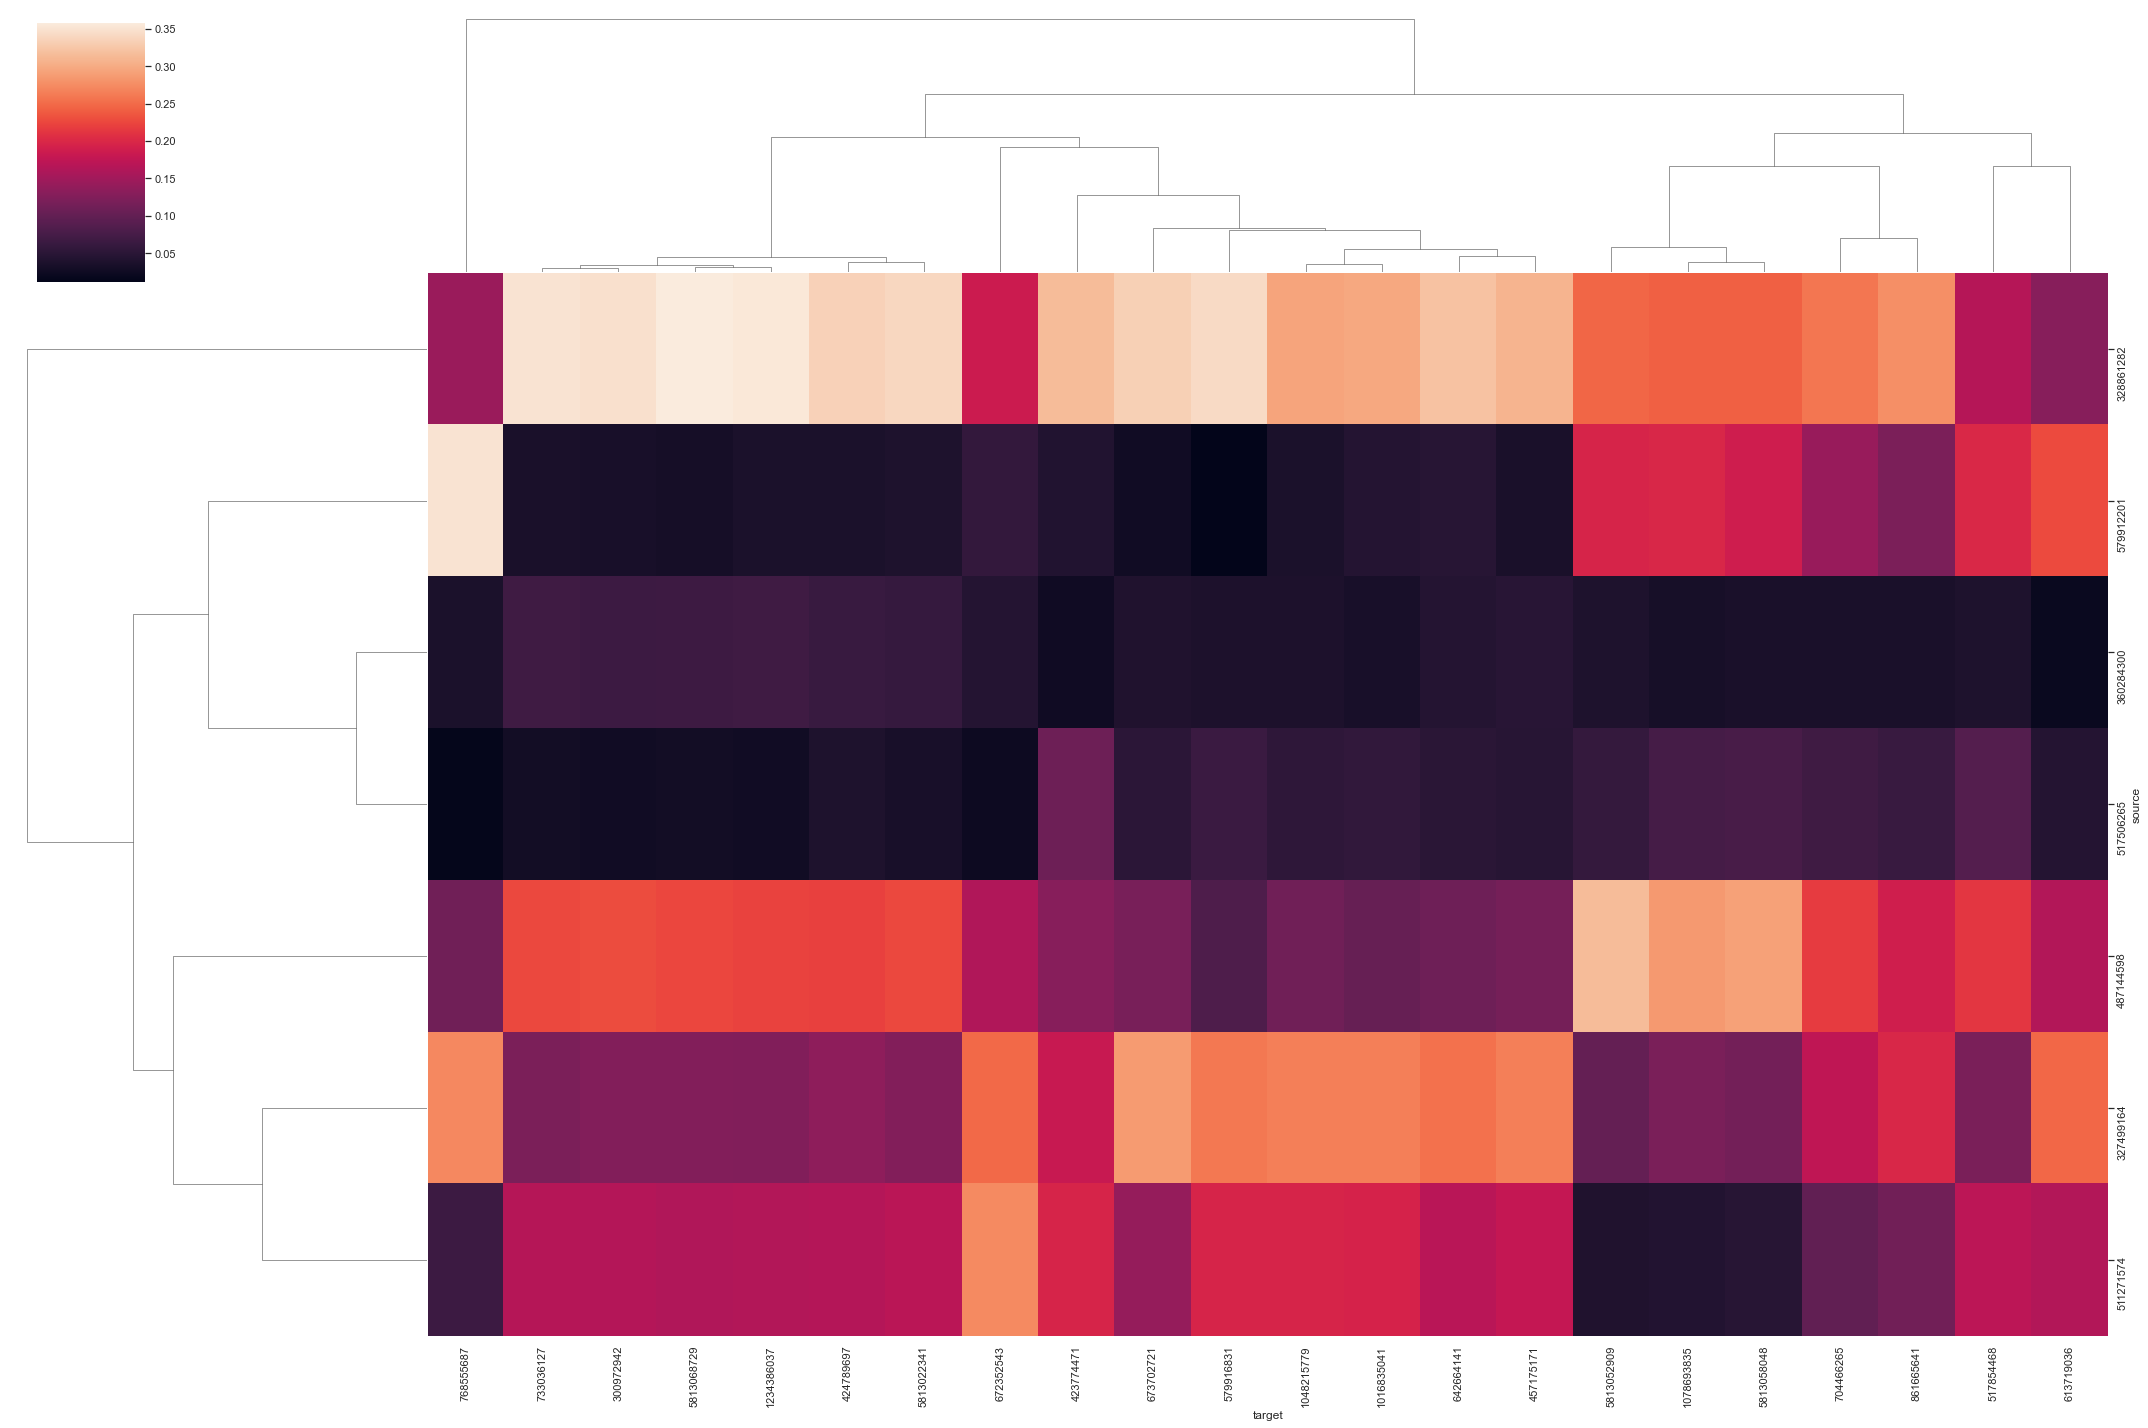

In [75]:
plt.clf()

# Using average euclidean clustering

clust = sns.clustermap(subset_eff_conn, figsize = (30,20))

plt.show()

In [76]:
reordered_subset_eff_conn = subset_eff_conn.iloc[clust.dendrogram_row.reordered_ind, 
                                                 clust.dendrogram_col.reordered_ind]
reordered_subset_eff_conn

target     768555687   733036127   300972942   5813068729  1234386037  \
source                                                                  
328861282    0.145522    0.350813    0.348384    0.358036    0.354593   
579912201    0.350746    0.036375    0.035048    0.032000    0.037300   
360284300    0.037313    0.069508    0.067498    0.067813    0.069674   
517506265    0.014925    0.029033    0.028334    0.028390    0.027895   
487144598    0.111940    0.226596    0.229579    0.225008    0.222363   
327499164    0.272388    0.120999    0.126149    0.126159    0.124500   
511271574    0.067164    0.166676    0.165009    0.162594    0.163676   

target     424789697   5813022341  672352543   423774471   673702721   ...  \
source                                                                 ...   
328861282    0.334567    0.339393    0.185847    0.315841    0.333716  ...   
579912201    0.037649    0.040007    0.058730    0.041983    0.027203  ...   
360284300    0.064747    0.061344    0.045635    0.025996    0.040868  ...   
517506265    0.039845    0.034244    0.023810    0.108358    0.051724  ...   
487144598    0.221034    0.226979    0.162831    0.130078    0.118263  ...   
327499164    0.136311    0.126762    0.249074    0.181778    0.286845  ...   
511271574    0.165846    0.171270    0.274074    0.195967    0.141379  ...   

target     1016835041  642664141   457175171   5813052909  1078693835  \
source                                                                  
328861282    0.297753    0.321087    0.308185    0.246233    0.242984   
579912201    0.045702    0.047514    0.035333    0.196418    0.198794   
360284300    0.034600    0.045120    0.048889    0.039319    0.033715   
517506265    0.057294    0.051105    0.048148    0.059752    0.075013   
487144598    0.103915    0.110773    0.114963    0.315352    0.285147   
327499164    0.265730    0.255157    0.265296    0.101645    0.120192   
511271574    0.195006    0.169245    0.179185    0.041280    0.044155   

target     5813058048  704466265   861665641   517854468   613719036   
source                                                                 
328861282    0.242088    0.259349    0.277532    0.166187    0.130303  
579912201    0.188305    0.143383    0.120266    0.200698    0.227273  
360284300    0.035980    0.036330    0.036331    0.039442    0.021212  
517506265    0.077866    0.070009    0.064174    0.089005    0.045455  
487144598    0.292851    0.216437    0.189207    0.213089    0.163636  
327499164    0.114421    0.175256    0.199139    0.119873    0.248485  
511271574    0.048489    0.099237    0.113351    0.171706    0.163636  

[7 rows x 22 columns]

In [77]:
nl2 = []

for i in reordered_subset_eff_conn.columns:
    
    lab = mbon_type_dict[i] + " - {}".format(i)
    
    nl2.append(lab)
    
nl2

['MBON10 - 768555687',
 'MBON07 - 733036127',
 'MBON14 - 300972942',
 'MBON14 - 5813068729',
 'MBON07 - 1234386037',
 'MBON02 - 424789697',
 'MBON02 - 5813022341',
 'MBON10 - 672352543',
 'MBON19 - 423774471',
 'MBON15 - 673702721',
 'MBON15-like - 579916831',
 'MBON09 - 1048215779',
 'MBON09 - 1016835041',
 'MBON15 - 642664141',
 'MBON15-like - 457175171',
 'MBON29 - 5813052909',
 'MBON09 - 1078693835',
 'MBON29 - 5813058048',
 'MBON12 - 704466265',
 'MBON12 - 861665641',
 'MBON19 - 517854468',
 'MBON10 - 613719036']

In [78]:
reordered_subset_eff_conn.index = [cent_name_dict[i] for i in reordered_subset_eff_conn.index]
reordered_subset_eff_conn.columns = [mbon_type_dict[i] for i in reordered_subset_eff_conn.columns]
reordered_subset_eff_conn

MBON10    MBON07    MBON14    MBON14    MBON07    MBON02  \
LHCENT1_R  0.145522  0.350813  0.348384  0.358036  0.354593  0.334567   
LHCENT5_R  0.350746  0.036375  0.035048  0.032000  0.037300  0.037649   
LHCENT8_R  0.037313  0.069508  0.067498  0.067813  0.069674  0.064747   
LHCENT4_R  0.014925  0.029033  0.028334  0.028390  0.027895  0.039845   
LHCENT3_R  0.111940  0.226596  0.229579  0.225008  0.222363  0.221034   
LHCENT2_R  0.272388  0.120999  0.126149  0.126159  0.124500  0.136311   
LHCENT8_R  0.067164  0.166676  0.165009  0.162594  0.163676  0.165846   

             MBON02    MBON10    MBON19    MBON15  ...    MBON09    MBON15  \
LHCENT1_R  0.339393  0.185847  0.315841  0.333716  ...  0.297753  0.321087   
LHCENT5_R  0.040007  0.058730  0.041983  0.027203  ...  0.045702  0.047514   
LHCENT8_R  0.061344  0.045635  0.025996  0.040868  ...  0.034600  0.045120   
LHCENT4_R  0.034244  0.023810  0.108358  0.051724  ...  0.057294  0.051105   
LHCENT3_R  0.226979  0.162831  0.130078  0.118263  ...  0.103915  0.110773   
LHCENT2_R  0.126762  0.249074  0.181778  0.286845  ...  0.265730  0.255157   
LHCENT8_R  0.171270  0.274074  0.195967  0.141379  ...  0.195006  0.169245   

           MBON15-like    MBON29    MBON09    MBON29    MBON12    MBON12  \
LHCENT1_R     0.308185  0.246233  0.242984  0.242088  0.259349  0.277532   
LHCENT5_R     0.035333  0.196418  0.198794  0.188305  0.143383  0.120266   
LHCENT8_R     0.048889  0.039319  0.033715  0.035980  0.036330  0.036331   
LHCENT4_R     0.048148  0.059752  0.075013  0.077866  0.070009  0.064174   
LHCENT3_R     0.114963  0.315352  0.285147  0.292851  0.216437  0.189207   
LHCENT2_R     0.265296  0.101645  0.120192  0.114421  0.175256  0.199139   
LHCENT8_R     0.179185  0.041280  0.044155  0.048489  0.099237  0.113351   

             MBON19    MBON10  
LHCENT1_R  0.166187  0.130303  
LHCENT5_R  0.200698  0.227273  
LHCENT8_R  0.039442  0.021212  
LHCENT4_R  0.089005  0.045455  
LHCENT3_R  0.213089  0.163636  
LHCENT2_R  0.119873  0.248485  
LHCENT8_R  0.171706  0.163636  

[7 rows x 22 columns]

<Figure size 432x288 with 0 Axes>

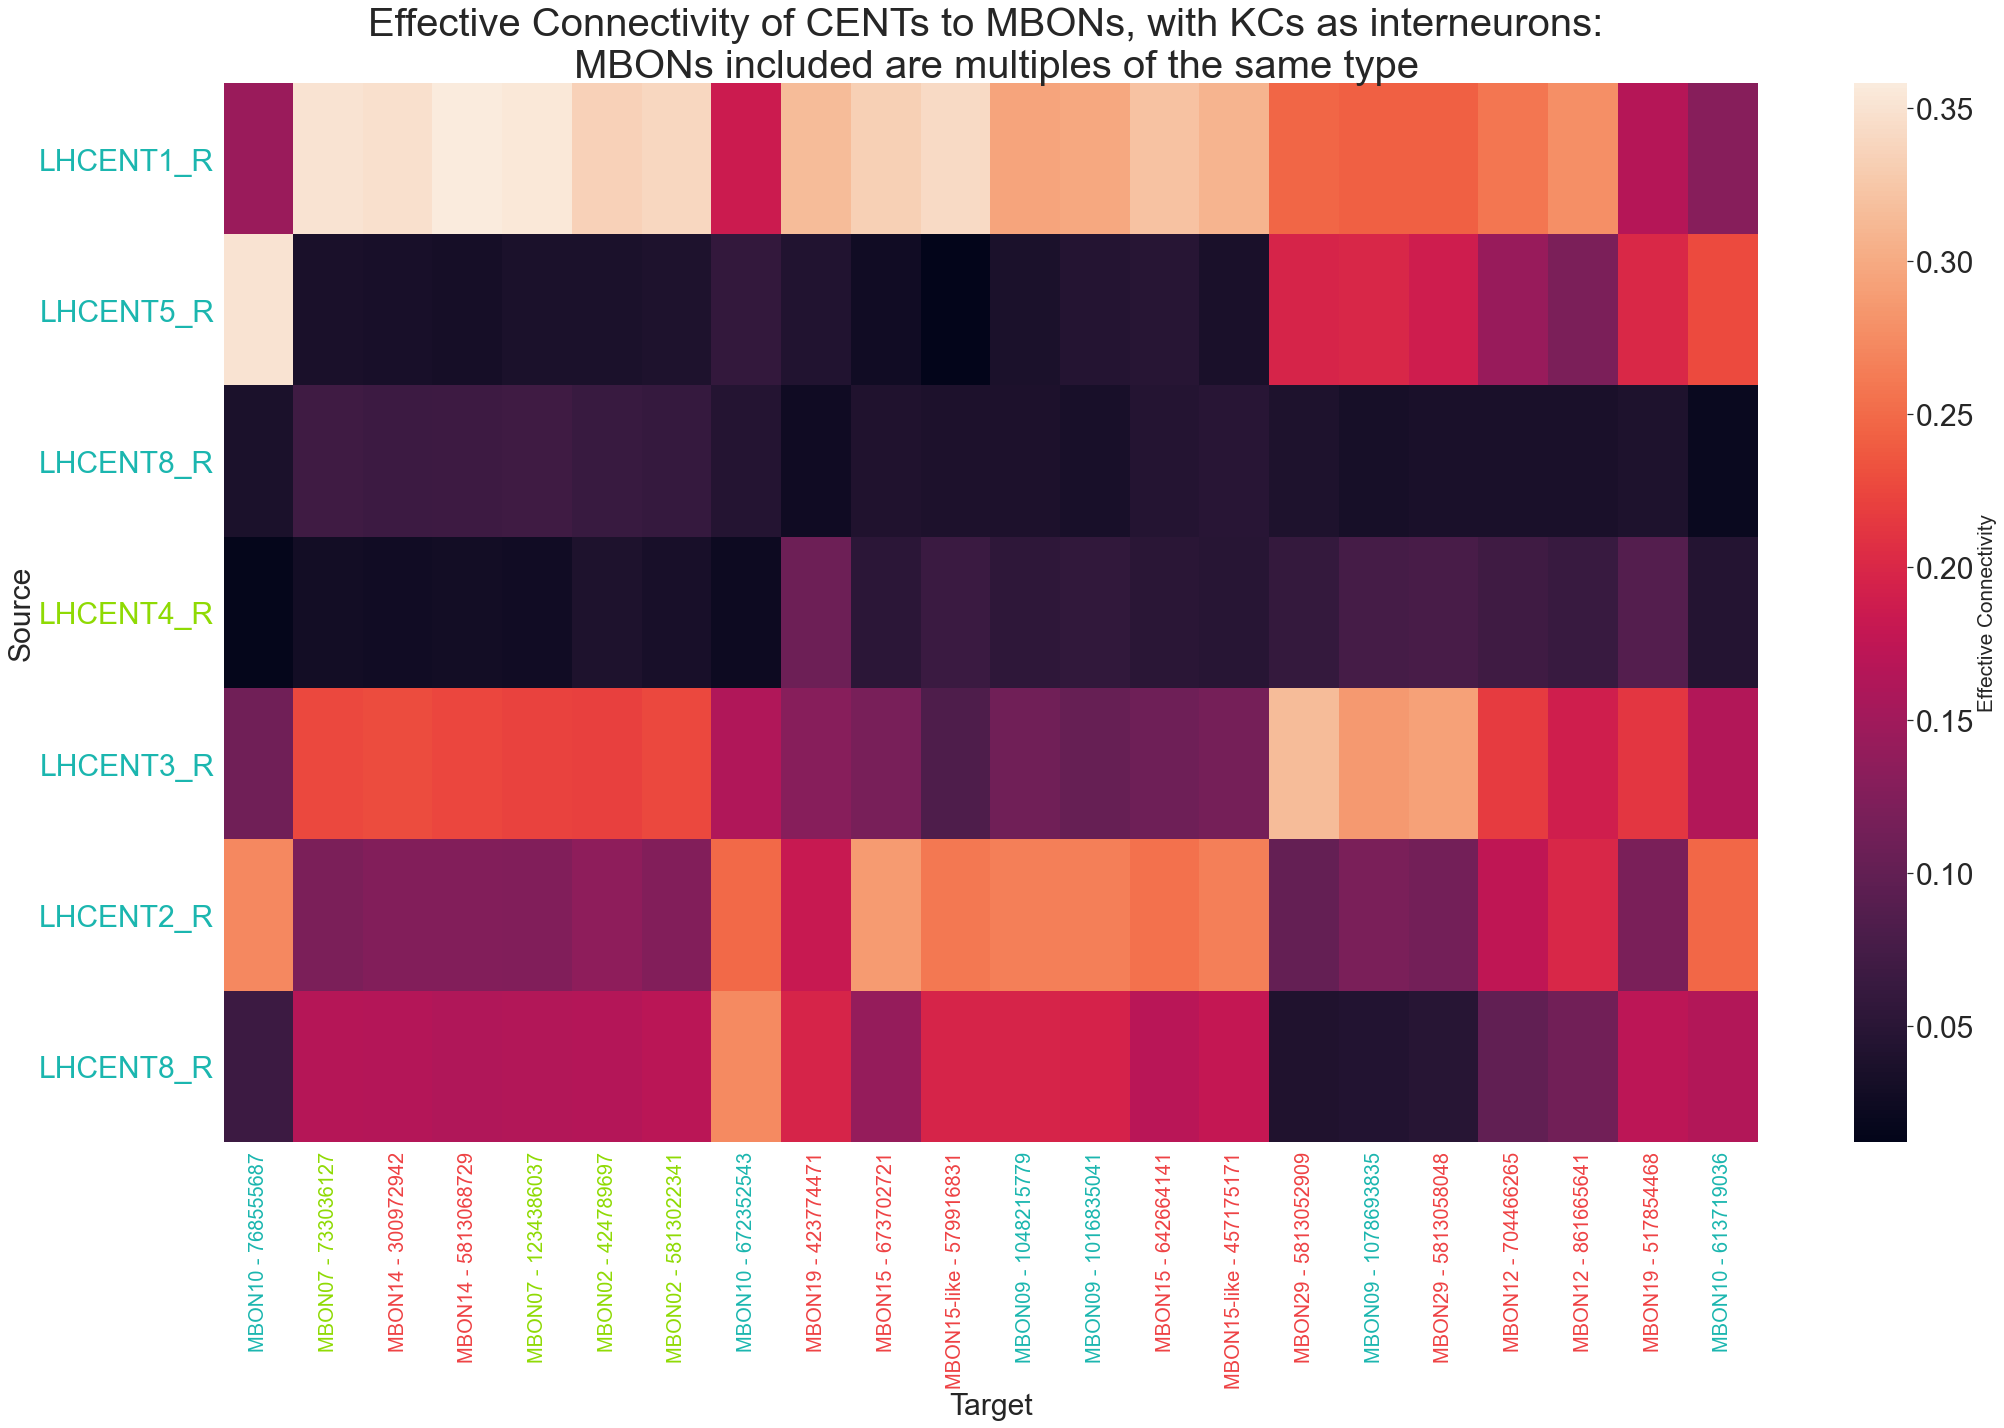

In [79]:
plt.clf()

fig, ax = plt.subplots(figsize = (30,20))

_ = sns.heatmap(reordered_subset_eff_conn, cmap = 'rocket')

_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 20)

_.set_ylabel('Source', fontsize = 30)
_.set_xlabel('Target', fontsize = 30)

for x in _.get_yticklabels():
    tick_text = x.get_text()
    
    x.set_color(cent_col_dict_names[tick_text])
    
for x in _.get_xticklabels():
    tick_text = x.get_text()
    x.set_color(mbon_to_color[tick_text])

# Changing tick labels to note the summed values

ax.set_xticklabels(nl2)

plt.title('Effective Connectivity of CENTs to MBONs, with KCs as interneurons: \n MBONs included are multiples of the same type', 
          fontsize = 40)

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)
cbar.set_label(label = 'Effective Connectivity', size = 'xx-large')

plt.tight_layout()

plt.show()

#plt.savefig(os.getcwd() + '/CENT_eff_conn_singles.png', dpi = 100)

# Effective Connectivity using % of postsynaptic budget

- [x] Normalise the CENT --> KC connections by the total no of KC postsynapses in the CA
- [x] Normalise the KC --> MBON connections by the total no of MBON postsynapses in the MB

## Repeat for presynaptic budget: 

- [x] Normalise the CENT --> KC connections by the total number of CENT presynapses in the CA
- [x] Normalise the KC --> MBON connections by the total number of KC presynapses in the MB

## postsyn budget of KCs in CA, then presyn budget of KCs in 

- [x] Normalise the CENT --> KC connections by the total number of CENT postsynapses in the CA
- [x] Normalise the KC --> MBON connections by the total number of KC presynapses in the MB

In [80]:
def synaptic_budget_norm_by_area(x, pre_post = 'post', roi = None):
    
    # x is a connectivity matrix with rows as source and columns and targets
    
    syn_val = []
    bids = []
    
    if pre_post == 'pre':
        
        for i in tqdm(x.index):
            
            n, p = nvneu.fetch_neurons(i)
            n_roi_pre = p[p.roi == roi][pre_post].tolist()
            bid = list(np.unique(p.bodyId))
            
            syn_val.append(n_roi_pre)
            bids.append(bid)
            
    elif pre_post == 'post':
        
        for i in tqdm(x.columns):
            
            n, p = nvneu.fetch_neurons(i)
            n_roi_post = p[p.roi == roi][pre_post].tolist()
            bid = list(np.unique(p.bodyId))
            
            syn_val.append(n_roi_post)
            bids.append(bid)
            
    syn_val = list(chain.from_iterable(syn_val))
    bids = list(chain.from_iterable(bids))
                
    bid_to_syn_val_dict = dict(zip(bids, syn_val))
    
    return(bid_to_syn_val_dict)  
        

# postsyn budget

In [138]:
# Finding number of KC postsynapses in the CA
postsyn_norm = KC_only.copy()
a = synaptic_budget_norm_by_area(postsyn_norm, pre_post = 'post', roi = 'CA(R)')
for i in tqdm(postsyn_norm.columns):
    
    postsyn_norm.loc[:, i] = postsyn_norm.loc[:, i] / a[i]
    
# Finding the number of MBON postsynapses in the MB
mb_postsyn_norm = KC_to_mbon_adjx.copy()
b = synaptic_budget_norm_by_area(mb_postsyn_norm, pre_post = 'post', roi = 'MB(R)')
for i in tqdm(mb_postsyn_norm.columns):
    
    mb_postsyn_norm.loc[:, i] = mb_postsyn_norm.loc[:, i] / b[i]
    

100%|██████████| 48/48 [00:00<00:00, 2685.00it/s]


In [139]:
postsyn_norm_eff_con = postsyn_norm @ mb_postsyn_norm

<Figure size 432x288 with 0 Axes>

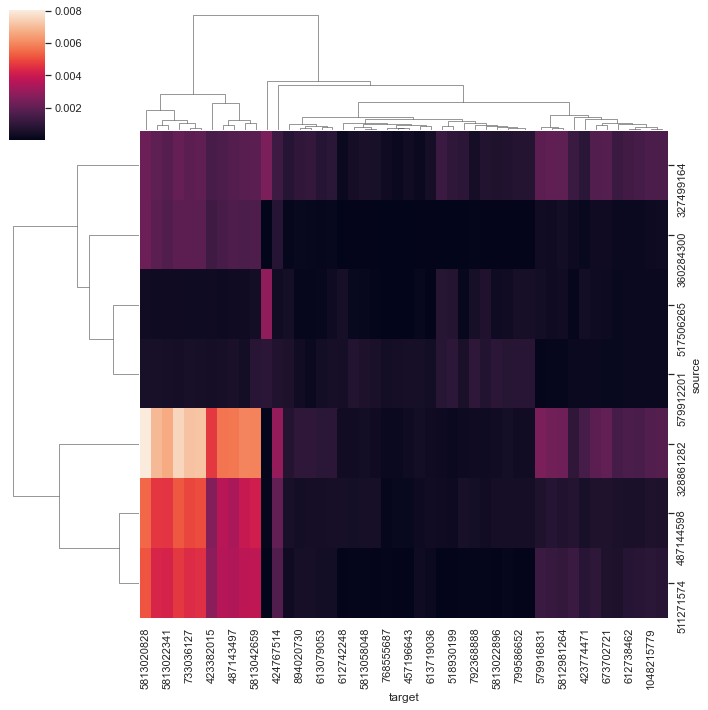

In [140]:
plt.clf()

clust = sns.clustermap(postsyn_norm_eff_con)

plt.show()

In [141]:
postsyn_norm_eff_con = postsyn_norm_eff_con.iloc[clust.dendrogram_row.reordered_ind, 
                                                   clust.dendrogram_col.reordered_ind].copy()

In [142]:
postsyn_norm_eff_con

target     5813020828  1234386037  5813022341  5813068729  733036127   \
source                                                                  
327499164    0.002215    0.001960    0.001799    0.002135    0.001938   
360284300    0.002223    0.001908    0.001677    0.001950    0.001923   
517506265    0.000355    0.000306    0.000320    0.000330    0.000314   
579912201    0.000509    0.000509    0.000489    0.000465    0.000527   
328861282    0.008042    0.006977    0.006700    0.007578    0.007178   
487144598    0.005498    0.004680    0.004646    0.005223    0.004934   
511271574    0.005163    0.004326    0.004260    0.004688    0.004459   

target     300972942   423382015   422725634   487143497   424789697   ...  \
source                                                                 ...   
327499164    0.001989    0.001512    0.001624    0.001758    0.001826  ...   
360284300    0.001894    0.001336    0.001518    0.001663    0.001597  ...   
517506265    0.000311    0.000320    0.000271    0.000318    0.000346  ...   
579912201    0.000493    0.000446    0.000481    0.000553    0.000407  ...   
328861282    0.007215    0.004695    0.005708    0.005778    0.005998  ...   
487144598    0.005035    0.002665    0.003646    0.003403    0.003940  ...   
511271574    0.004556    0.002856    0.003555    0.003468    0.003746  ...   

target     5812981264  672352543   423774471   1139667240  673702721   \
source                                                                  
327499164    0.001960    0.001244    0.000895    0.001722    0.001789   
360284300    0.000402    0.000272    0.000162    0.000321    0.000335   
517506265    0.000363    0.000102    0.000397    0.000305    0.000272   
579912201    0.000106    0.000222    0.000197    0.000201    0.000167   
328861282    0.002276    0.001025    0.001493    0.001930    0.002023   
487144598    0.000700    0.000774    0.000519    0.000648    0.000658   
511271574    0.001078    0.001232    0.000880    0.001007    0.000653   

target     642664141   612738462   1016835041  1048215779  457175171   
source                                                                 
327499164    0.001229    0.001409    0.001465    0.001595    0.001587  
360284300    0.000232    0.000231    0.000211    0.000265    0.000308  
517506265    0.000183    0.000233    0.000236    0.000245    0.000198  
579912201    0.000180    0.000204    0.000241    0.000197    0.000228  
328861282    0.001480    0.001585    0.001565    0.001709    0.001784  
487144598    0.000572    0.000540    0.000557    0.000659    0.000619  
511271574    0.000631    0.000819    0.000871    0.000895    0.000869  

[7 rows x 48 columns]

<Figure size 432x288 with 0 Axes>

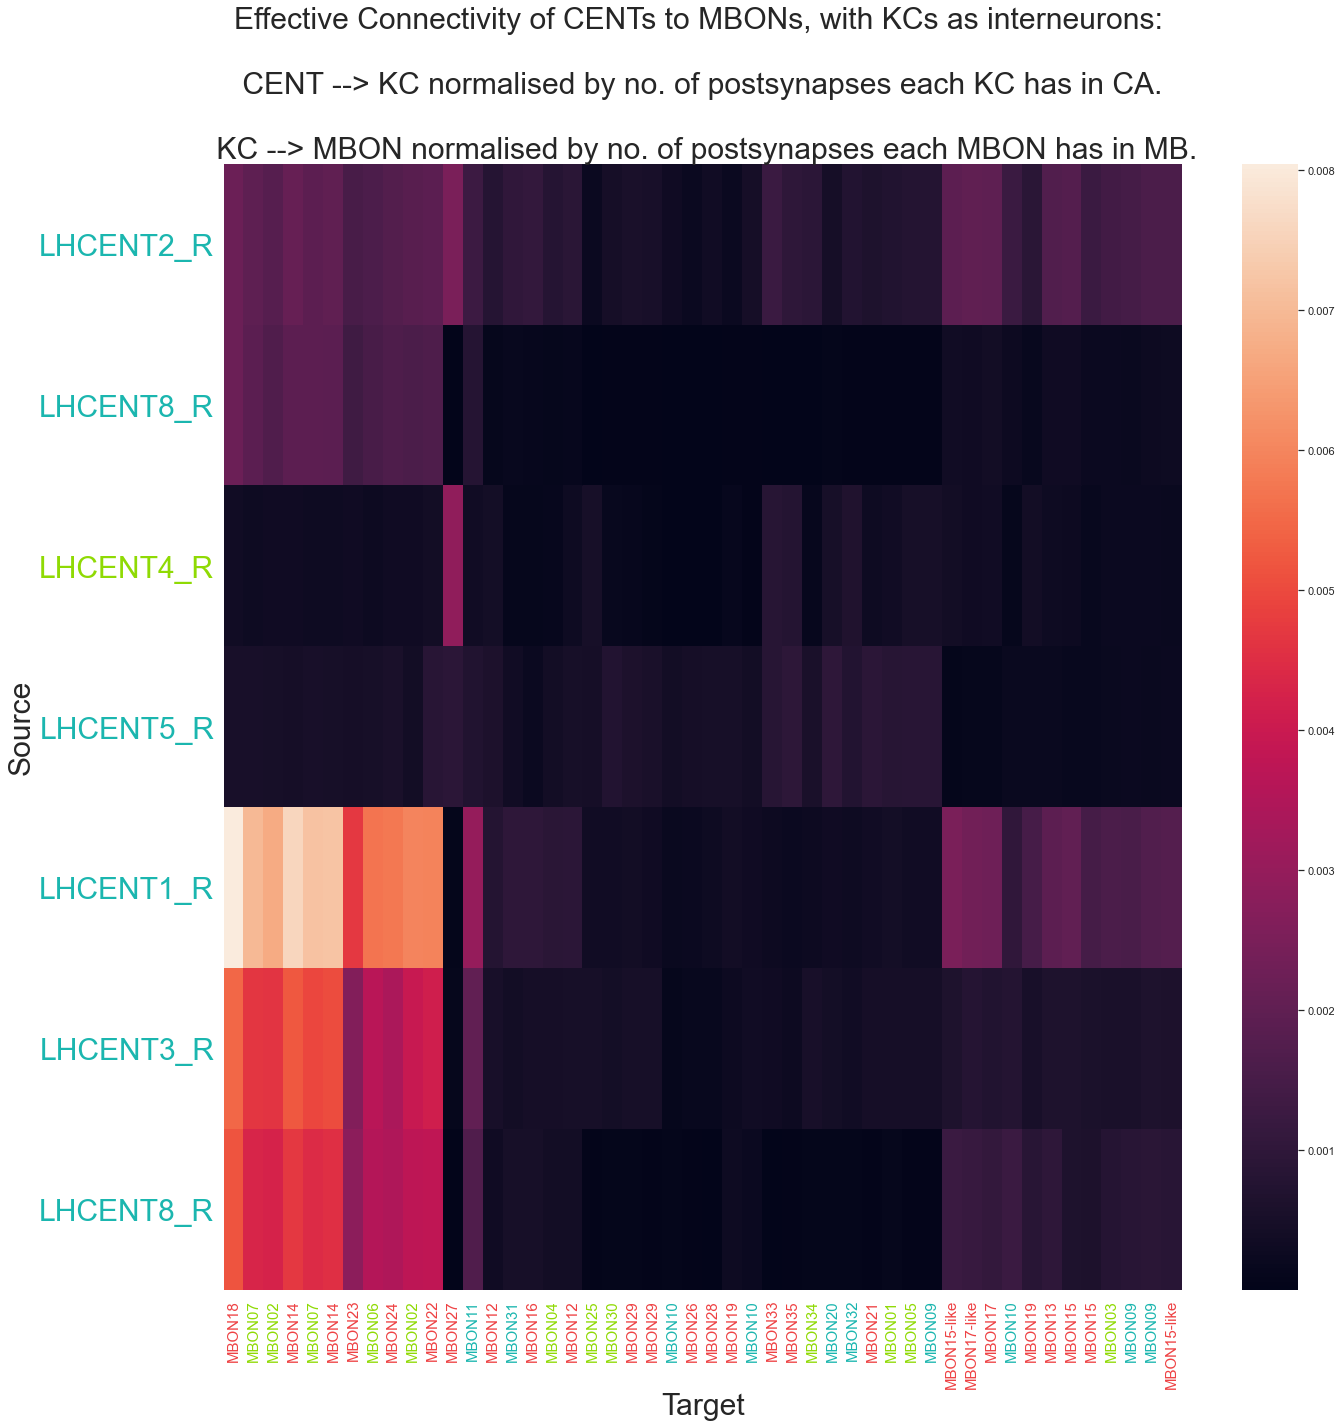

In [143]:
plt.clf()

fig, ax = plt.subplots(figsize = (20,20))

_ = sns.heatmap(postsyn_norm_eff_con, 
                xticklabels=[mbon_type_dict[i] for i in postsyn_norm_eff_con.columns],
                yticklabels=[cent_name_dict[i] for i in postsyn_norm_eff_con.index])



_.set_ylabel('Source', fontsize = 30)
_.set_xlabel('Target', fontsize = 30)

_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 15)

for x in _.get_yticklabels():
    tick_text = x.get_text()
    x.set_color(cent_col_dict_names[(tick_text)])



for x in _.get_xticklabels():
    tick_text = x.get_text()
    x.set_color(mbon_to_color[tick_text])

plt.title("""Effective Connectivity of CENTs to MBONs, with KCs as interneurons: 
\n CENT --> KC normalised by no. of postsynapses each KC has in CA. 
\n KC --> MBON normalised by no. of postsynapses each MBON has in MB.""", 
          fontsize = 30)
    
plt.tight_layout()

plt.show()

#plt.savefig(os.getcwd() + '/EC_postsyn_norm.png', dpi = 100)

#### grouping the above by similar type (average or sum?)

In [107]:
postsyn_norm_grouped = KC_to_mbon_adjx.copy()
postsyn_norm_grouped.columns = [mbon_type_dict[i] for i in KC_to_mbon_adjx]
postsyn_norm_grouped = postsyn_norm_grouped.groupby(lambda x:x, axis = 1).mean().copy()
postsyn_norm_grouped

MBON01  MBON02  MBON03  MBON04  MBON05  MBON06  MBON07     MBON09  \
source                                                                          
5813032771    52.0     0.5     0.0    41.0   174.0     0.0     0.5  20.000000   
1224137495    20.0     0.0     0.0    18.0    80.0     1.0     0.0  16.666667   
799560834      2.0     5.0    61.0     6.0     0.0     0.0     0.0   9.333333   
5813053885    58.0     0.0     0.0     1.0    39.0     0.0     0.0   6.000000   
1173347968    21.0     1.0    58.0    12.0     0.0     0.0     0.0   9.666667   
...            ...     ...     ...     ...     ...     ...     ...        ...   
332344539      0.0     5.0     0.0     0.0     0.0     5.0     6.5   0.000000   
394755782      0.0     5.0     0.0     0.0     0.0    10.0     8.0   0.000000   
301314208      0.0     4.0     0.0     0.0     0.0     6.0     8.5   0.000000   
798537456      0.0     6.5     0.0     0.0     0.0     5.0     9.0   0.000000   
922677121      0.0     2.0     0.0     0.0     0.0     6.0     5.5   0.000000   

              MBON10  MBON11  ...  MBON26  MBON27  MBON28  MBON29  MBON30  \
source                        ...                                           
5813032771  0.333333    52.0  ...    26.0     9.0     0.0     8.0     5.0   
1224137495  0.000000    22.0  ...    15.0    10.0     0.0     2.5     2.0   
799560834   0.000000     1.0  ...     0.0     0.0     0.0     0.0     0.0   
5813053885  0.000000    26.0  ...     1.0     0.0     0.0     7.0    14.0   
1173347968  1.000000     0.0  ...     5.0     0.0     0.0     0.0     0.0   
...              ...     ...  ...     ...     ...     ...     ...     ...   
332344539   0.000000     6.0  ...     0.0     0.0     0.0     0.0     0.0   
394755782   0.000000     3.0  ...     0.0     0.0     0.0     0.0     0.0   
301314208   0.000000     8.0  ...     0.0     0.0     0.0     0.0     0.0   
798537456   0.000000    10.0  ...     0.0     0.0     0.0     0.0     0.0   
922677121   0.000000     5.0  ...     0.0     0.0     0.0     0.0     0.0   

            MBON31  MBON32  MBON33  MBON34  MBON35  
source                                              
5813032771     0.0    20.0    43.0     0.0    12.0  
1224137495     0.0    33.0    36.0     0.0    33.0  
799560834     12.0     1.0     0.0     0.0     0.0  
5813053885     0.0    14.0     0.0     0.0     5.0  
1173347968     9.0     1.0     0.0     0.0     0.0  
...            ...     ...     ...     ...     ...  
332344539      0.0     0.0     0.0     0.0     0.0  
394755782      0.0     0.0     0.0     0.0     0.0  
301314208      0.0     0.0     0.0     0.0     0.0  
798537456      0.0     0.0     0.0     0.0     0.0  
922677121      0.0     0.0     0.0     0.0     0.0  

[919 rows x 36 columns]

# presyn budget 


In [108]:
KC_CA_presyn_norm = KC_only.copy()
a = synaptic_budget_norm_by_area(KC_CA_presyn_norm, pre_post = 'pre', roi = 'CA(R)')

for i in tqdm(KC_CA_presyn_norm.index):
    
    KC_CA_presyn_norm.loc[i, :] = KC_CA_presyn_norm.loc[i, :] / a[i]
    
KC_to_MBON_presyn_norm = KC_to_mbon_adjx.copy()
b = synaptic_budget_norm_by_area(KC_to_MBON_presyn_norm, pre_post = 'pre', roi = 'MB(R)')

for i in tqdm(KC_to_MBON_presyn_norm.index): 
    
    KC_to_MBON_presyn_norm.loc[i, :] = KC_to_MBON_presyn_norm.loc[i, :] / b[i]

100%|██████████| 919/919 [00:00<00:00, 2729.64it/s]


In [109]:
KC_CA_presyn_norm.head()

target     301309622   301314150   301314154   301314208   301318641   \
source                                                                  
327499164    0.000000    0.000000    0.000000    0.000000    0.005814   
328861282    0.003367    0.010101    0.006734    0.006734    0.003367   
360284300    0.000000    0.000000    0.000000    0.000000    0.017857   
487144598    0.003279    0.013115    0.016393    0.006557    0.009836   
511271574    0.000000    0.005348    0.000000    0.000000    0.000000   

target     331999156   332003629   332003730   332003899   332007728   ...  \
source                                                                 ...   
327499164    0.000000    0.011628    0.000000    0.000000    0.005814  ...   
328861282    0.016835    0.010101    0.003367    0.000000    0.003367  ...   
360284300    0.017857    0.008929    0.000000    0.000000    0.017857  ...   
487144598    0.003279    0.000000    0.000000    0.000000    0.000000  ...   
511271574    0.010695    0.000000    0.000000    0.005348    0.005348  ...   

target     5813110238  5813110928  5813113782  5813114253  5813128857  \
source                                                                  
327499164    0.000000    0.000000    0.000000    0.000000    0.000000   
328861282    0.000000    0.003367    0.003367    0.010101    0.023569   
360284300    0.000000    0.000000    0.000000    0.000000    0.000000   
487144598    0.003279    0.000000    0.000000    0.000000    0.009836   
511271574    0.000000    0.000000    0.000000    0.000000    0.016043   

target     5901193485  5901197726  5901198074  5901202076  5901207528  
source                                                                 
327499164    0.000000    0.000000    0.046512    0.005814    0.011628  
328861282    0.000000    0.006734    0.000000    0.003367    0.020202  
360284300    0.000000    0.000000    0.000000    0.000000    0.017857  
487144598    0.003279    0.000000    0.000000    0.003279    0.003279  
511271574    0.000000    0.000000    0.000000    0.000000    0.026738  

[5 rows x 919 columns]

In [110]:
KC_to_MBON_presyn_norm.head()

target      799586652   612738462   1078693835  612371421   424767514   \
source                                                                   
5813032771    0.319853    0.000000    0.110294    0.095588    0.095588   
1224137495    0.209974    0.000000    0.128609    0.052493    0.057743   
799560834     0.000000    0.232824    0.000000    0.007634    0.003817   
5813053885    0.135889    0.000000    0.062718    0.202091    0.090592   
1173347968    0.000000    0.257778    0.000000    0.093333    0.000000   

target      5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                  ...   
5813032771    0.095588    0.079044    0.075368    0.000000    0.000000  ...   
1224137495    0.049869    0.094488    0.047244    0.002625    0.000000  ...   
799560834     0.000000    0.000000    0.022901    0.000000    0.110687  ...   
5813053885    0.066202    0.000000    0.003484    0.000000    0.000000  ...   
1173347968    0.000000    0.000000    0.053333    0.000000    0.066667  ...   

target      792368888   457175171   423774471   768555687   612742248   \
source                                                                   
5813032771    0.003676    0.000000     0.00000    0.000000    0.000000   
1224137495    0.000000    0.000000     0.00000    0.000000    0.000000   
799560834     0.000000    0.011450     0.01145    0.000000    0.000000   
5813053885    0.027875    0.000000     0.00000    0.000000    0.010453   
1173347968    0.000000    0.004444     0.00000    0.013333    0.000000   

target      672352543   673702721   5813052909  1173814525  613719036   
source                                                                  
5813032771         0.0    0.000000    0.000000         0.0    0.001838  
1224137495         0.0    0.000000    0.000000         0.0    0.000000  
799560834          0.0    0.019084    0.000000         0.0    0.000000  
5813053885         0.0    0.000000    0.003484         0.0    0.000000  
1173347968         0.0    0.000000    0.000000         0.0    0.000000  

[5 rows x 48 columns]

In [111]:
presyn_eff_conn = KC_CA_presyn_norm @ KC_to_MBON_presyn_norm
presyn_eff_conn

target     799586652   612738462   1078693835  612371421   424767514   \
source                                                                  
327499164    0.060702    0.058765    0.043689    0.074701    0.129030   
328861282    0.029405    0.040751    0.020068    0.036542    0.193870   
360284300    0.010364    0.015407    0.007762    0.014383    0.138650   
487144598    0.033759    0.011570    0.023815    0.039305    0.129229   
511271574    0.008762    0.030487    0.005994    0.013232    0.174264   
517506265    0.018340    0.010395    0.013851    0.020893    0.026966   
579912201    0.051207    0.003836    0.034714    0.057631    0.047890   

target     5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                 ...   
327499164    0.025804    0.002089    0.021271    0.128395    0.039505  ...   
328861282    0.012538    0.001180    0.013867    0.268096    0.027140  ...   
360284300    0.004358    0.000070    0.005237    0.193434    0.011979  ...   
487144598    0.014583    0.001118    0.007113    0.164804    0.007610  ...   
511271574    0.003621    0.000189    0.008673    0.267253    0.020730  ...   
517506265    0.006421    0.000582    0.004273    0.022017    0.007426  ...   
579912201    0.022355    0.002084    0.006046    0.019752    0.002368  ...   

target     792368888   457175171   423774471   768555687   612742248   \
source                                                                  
327499164    0.004617    0.005761    0.003019    0.000670    0.001332   
328861282    0.003125    0.003977    0.002985    0.000229    0.001218   
360284300    0.001534    0.001862    0.000929    0.000122    0.000323   
487144598    0.003585    0.001218    0.001033    0.000105    0.001577   
511271574    0.001254    0.002883    0.002646    0.000118    0.000393   
517506265    0.001884    0.000750    0.001466    0.000022    0.001151   
579912201    0.006011    0.000328    0.000324    0.000356    0.001527   

target     672352543   673702721   5813052909  1173814525  613719036   
source                                                                 
327499164    0.001580    0.003384    0.002021    0.001398    0.000487  
328861282    0.000751    0.002468    0.001393    0.000290    0.000221  
360284300    0.000499    0.001024    0.000492    0.000069    0.000111  
487144598    0.000492    0.000674    0.001976    0.000491    0.000169  
511271574    0.001254    0.001139    0.000338    0.000158    0.000211  
517506265    0.000152    0.000536    0.000610    0.000242    0.000074  
579912201    0.000149    0.000174    0.001639    0.000520    0.000171  

[7 rows x 48 columns]

<Figure size 432x288 with 0 Axes>

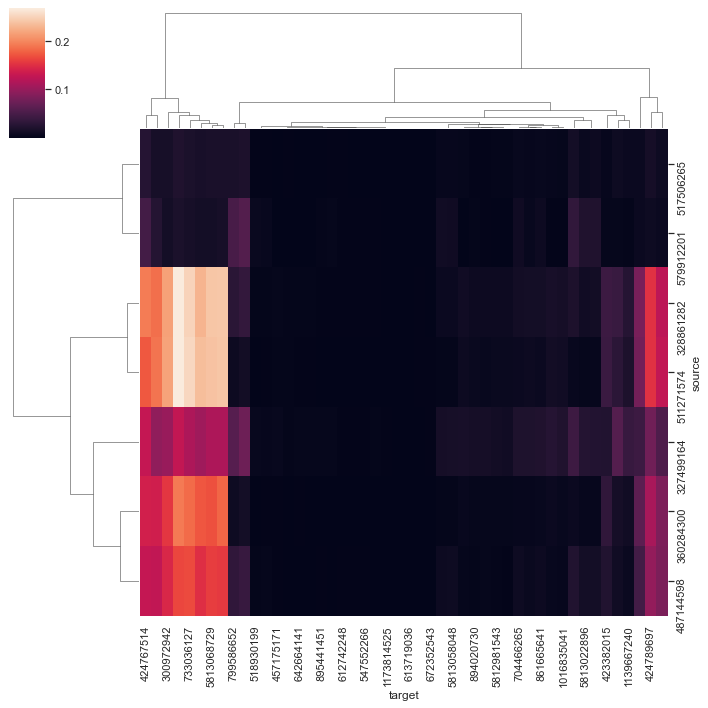

In [112]:
plt.clf()

clust = sns.clustermap(presyn_eff_conn)

plt.show()

In [113]:
presyn_eff_conn = presyn_eff_conn.iloc[clust.dendrogram_row.reordered_ind, 
                                       clust.dendrogram_col.reordered_ind].copy()

<Figure size 432x288 with 0 Axes>

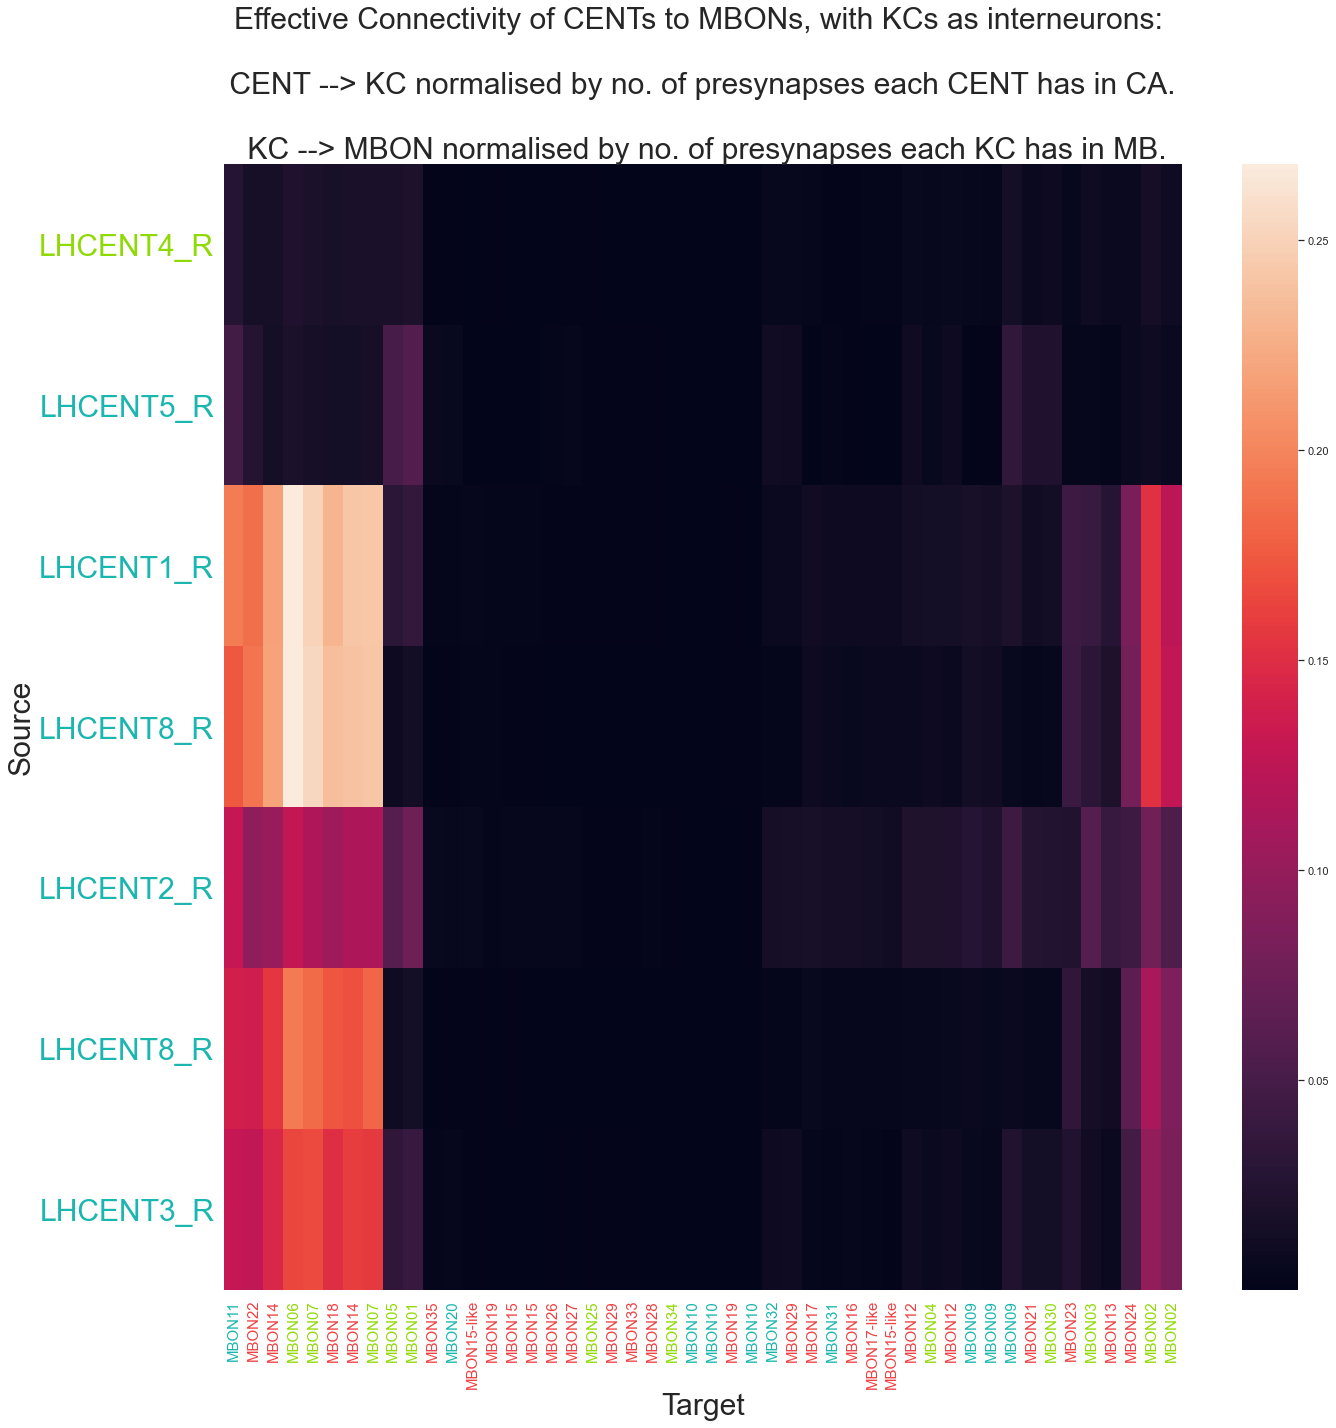

In [114]:
plt.clf()

fig, ax = plt.subplots(figsize = (20,20))

_ = sns.heatmap(presyn_eff_conn, 
                xticklabels=[mbon_type_dict[i] for i in presyn_eff_conn.columns],
                yticklabels=[cent_name_dict[i] for i in presyn_eff_conn.index])

_.set_ylabel('Source', fontsize = 30)
_.set_xlabel('Target', fontsize = 30)

_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 15)

for x in _.get_yticklabels():
    tick_text = x.get_text()
    x.set_color(cent_col_dict_names[(tick_text)])



for x in _.get_xticklabels():
    tick_text = x.get_text()
    x.set_color(mbon_to_color[tick_text])


plt.title("""Effective Connectivity of CENTs to MBONs, with KCs as interneurons: 
\n CENT --> KC normalised by no. of presynapses each CENT has in CA. 
\n KC --> MBON normalised by no. of presynapses each KC has in MB.""", 
          fontsize = 30)
    
plt.tight_layout()

plt.show()

#plt.savefig(os.getcwd() + '/EC_presyn_norm.png', dpi = 100)

### now try 

- [x] postsyn budget of KCs for CENT --> KC connectivity,
- [x] then presyn budget of KCs for KCs --> MBON connectivity

In [115]:
# Finding number of KC postsynapses in the CA
KC_CA_postsyn_norm = KC_only.copy()
a = synaptic_budget_norm_by_area(KC_CA_postsyn_norm, pre_post = 'post', roi = 'CA(R)')

for i in tqdm(KC_CA_postsyn_norm.columns):
    
    KC_CA_postsyn_norm.loc[:, i] = KC_CA_postsyn_norm.loc[:, i] / a[i]
    
# Finding the number of KC presynapses in the MB
KC_to_MBON_presyn_norm = KC_to_mbon_adjx.copy()
b = synaptic_budget_norm_by_area(KC_to_MBON_presyn_norm, pre_post = 'pre', roi = 'MB(R)')
for i in tqdm(KC_to_MBON_presyn_norm.index):
    
    KC_to_MBON_presyn_norm.loc[i, :] = KC_to_MBON_presyn_norm.loc[i, :] / b[i]
    

100%|██████████| 919/919 [00:00<00:00, 2940.41it/s]


In [116]:
KC_CA_postsyn_norm.head()

target     301309622   301314150   301314154   301314208   301318641   \
source                                                                  
327499164    0.000000    0.000000    0.000000    0.000000    0.009615   
328861282    0.014286    0.020270    0.021978    0.022727    0.009615   
360284300    0.000000    0.000000    0.000000    0.000000    0.019231   
487144598    0.014286    0.027027    0.054945    0.022727    0.028846   
511271574    0.000000    0.006757    0.000000    0.000000    0.000000   

target     331999156   332003629   332003730   332003899   332007728   ...  \
source                                                                 ...   
327499164    0.000000    0.018018    0.000000    0.000000    0.009434  ...   
328861282    0.031646    0.027027    0.047619    0.000000    0.009434  ...   
360284300    0.012658    0.009009    0.000000    0.000000    0.018868  ...   
487144598    0.006329    0.000000    0.000000    0.000000    0.000000  ...   
511271574    0.012658    0.000000    0.000000    0.047619    0.009434  ...   

target     5813110238  5813110928  5813113782  5813114253  5813128857  \
source                                                                  
327499164    0.000000    0.000000       0.000    0.000000    0.000000   
328861282    0.000000    0.008621       0.008    0.025424    0.044872   
360284300    0.000000    0.000000       0.000    0.000000    0.000000   
487144598    0.009346    0.000000       0.000    0.000000    0.019231   
511271574    0.000000    0.000000       0.000    0.000000    0.019231   

target     5901193485  5901197726  5901198074  5901202076  5901207528  
source                                                                 
327499164    0.000000    0.000000    0.026667    0.008065    0.013245  
328861282    0.000000    0.009302    0.000000    0.008065    0.039735  
360284300    0.000000    0.000000    0.000000    0.000000    0.013245  
487144598    0.003968    0.000000    0.000000    0.008065    0.006623  
511271574    0.000000    0.000000    0.000000    0.000000    0.033113  

[5 rows x 919 columns]

In [117]:
KC_to_MBON_presyn_norm.head()

target      799586652   612738462   1078693835  612371421   424767514   \
source                                                                   
5813032771    0.319853    0.000000    0.110294    0.095588    0.095588   
1224137495    0.209974    0.000000    0.128609    0.052493    0.057743   
799560834     0.000000    0.232824    0.000000    0.007634    0.003817   
5813053885    0.135889    0.000000    0.062718    0.202091    0.090592   
1173347968    0.000000    0.257778    0.000000    0.093333    0.000000   

target      5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                  ...   
5813032771    0.095588    0.079044    0.075368    0.000000    0.000000  ...   
1224137495    0.049869    0.094488    0.047244    0.002625    0.000000  ...   
799560834     0.000000    0.000000    0.022901    0.000000    0.110687  ...   
5813053885    0.066202    0.000000    0.003484    0.000000    0.000000  ...   
1173347968    0.000000    0.000000    0.053333    0.000000    0.066667  ...   

target      792368888   457175171   423774471   768555687   612742248   \
source                                                                   
5813032771    0.003676    0.000000     0.00000    0.000000    0.000000   
1224137495    0.000000    0.000000     0.00000    0.000000    0.000000   
799560834     0.000000    0.011450     0.01145    0.000000    0.000000   
5813053885    0.027875    0.000000     0.00000    0.000000    0.010453   
1173347968    0.000000    0.004444     0.00000    0.013333    0.000000   

target      672352543   673702721   5813052909  1173814525  613719036   
source                                                                  
5813032771         0.0    0.000000    0.000000         0.0    0.001838  
1224137495         0.0    0.000000    0.000000         0.0    0.000000  
799560834          0.0    0.019084    0.000000         0.0    0.000000  
5813053885         0.0    0.000000    0.003484         0.0    0.000000  
1173347968         0.0    0.000000    0.000000         0.0    0.000000  

[5 rows x 48 columns]

In [118]:
postsyn_presyn_eff_conn = KC_CA_postsyn_norm @ KC_to_MBON_presyn_norm 

In [119]:
postsyn_presyn_eff_conn

target     799586652   612738462   1078693835  612371421   424767514   \
source                                                                  
327499164    0.096415    0.092071    0.062302    0.100503    0.176736   
328861282    0.038428    0.105629    0.026157    0.052925    0.445809   
360284300    0.004843    0.015351    0.003681    0.007895    0.120969   
487144598    0.046048    0.035560    0.032428    0.055876    0.316139   
511271574    0.007192    0.055199    0.005058    0.013983    0.261555   
517506265    0.060121    0.015524    0.038154    0.051581    0.047684   
579912201    0.106185    0.012572    0.066550    0.112157    0.094232   

target     5813022896  547552266   613079053   422725634   1139667240  ...  \
source                                                                 ...   
327499164    0.030608    0.013231    0.029338    0.177589    0.062223  ...   
328861282    0.016227    0.001866    0.032247    0.655121    0.071438  ...   
360284300    0.002050    0.000034    0.004522    0.176647    0.011859  ...   
487144598    0.019634    0.001970    0.015486    0.441113    0.023551  ...   
511271574    0.003015    0.000156    0.014863    0.421369    0.037311  ...   
517506265    0.014037    0.008363    0.005044    0.027630    0.011232  ...   
579912201    0.043891    0.009071    0.013211    0.050832    0.006926  ...   

target     792368888   457175171   423774471   768555687   612742248   \
source                                                                  
327499164    0.005728    0.008993    0.004548    0.001050    0.001032   
328861282    0.003862    0.010212    0.007717    0.000689    0.001546   
360284300    0.000715    0.001774    0.000829    0.000122    0.000142   
487144598    0.004589    0.003517    0.002623    0.000354    0.002010   
511271574    0.000951    0.005001    0.004558    0.000292    0.000298   
517506265    0.006016    0.001139    0.002039    0.000033    0.002362   
579912201    0.013489    0.001201    0.000946    0.001196    0.002241   

target     672352543   673702721   5813052909  1173814525  613719036   
source                                                                 
327499164    0.002278    0.005275    0.003090    0.001215    0.000706  
328861282    0.001878    0.006253    0.001766    0.000345    0.000520  
360284300    0.000515    0.001017    0.000241    0.000035    0.000080  
487144598    0.001429    0.001995    0.002533    0.000610    0.000556  
511271574    0.002382    0.002002    0.000308    0.000120    0.000374  
517506265    0.000195    0.000849    0.000458    0.000170    0.000100  
579912201    0.000398    0.000477    0.003036    0.000708    0.000613  

[7 rows x 48 columns]

<Figure size 432x288 with 0 Axes>

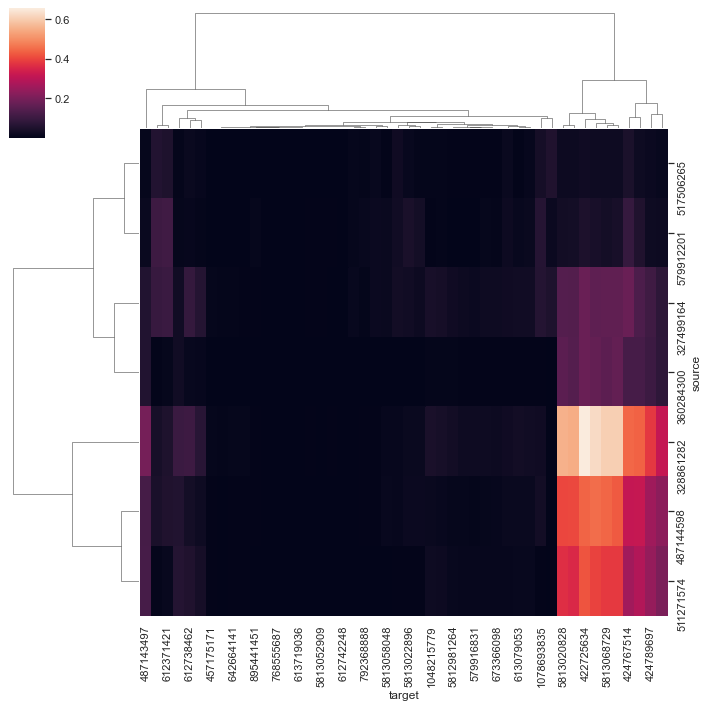

In [120]:
plt.clf()

clust = sns.clustermap(postsyn_presyn_eff_conn)

plt.show()

In [121]:
postsyn_presyn_eff_conn = postsyn_presyn_eff_conn.iloc[clust.dendrogram_row.reordered_ind, 
                                                       clust.dendrogram_col.reordered_ind]

<Figure size 432x288 with 0 Axes>

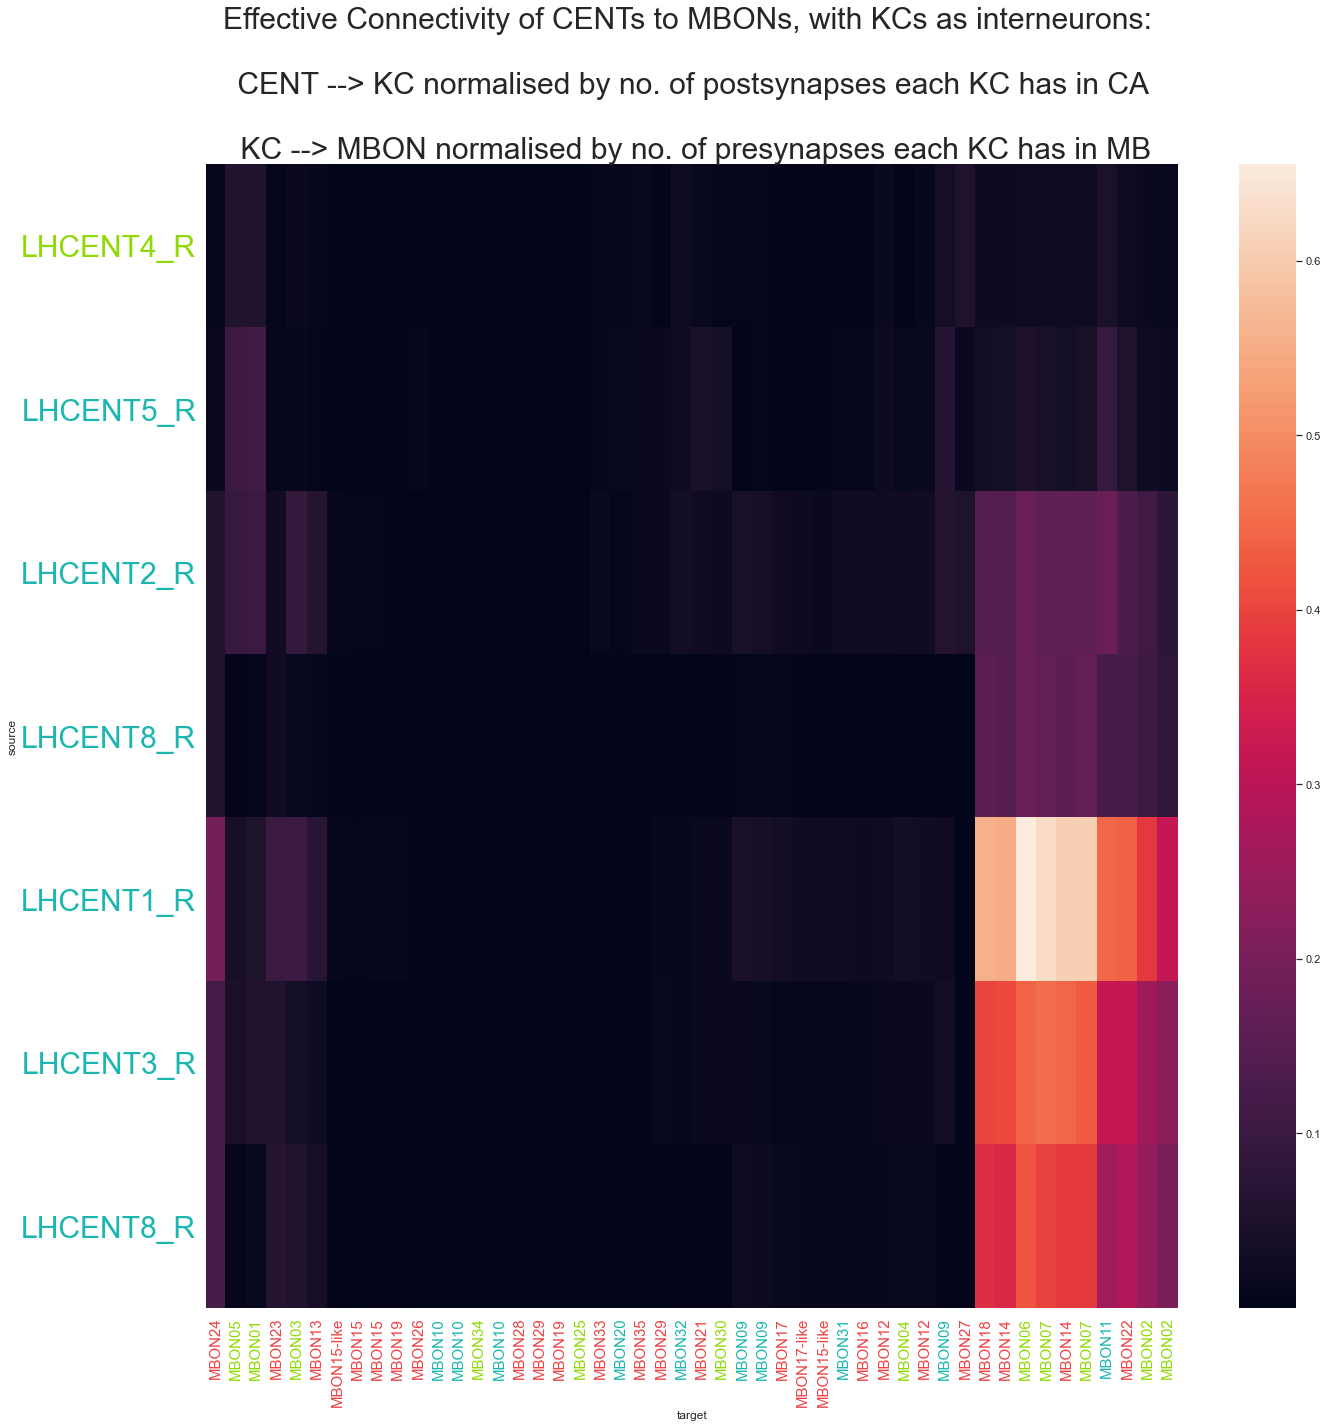

In [122]:
plt.clf()

fig, ax = plt.subplots(figsize = (20,20))

_ = sns.heatmap(postsyn_presyn_eff_conn, 
                xticklabels=[mbon_type_dict[i] for i in postsyn_presyn_eff_conn.columns],
                yticklabels=[cent_name_dict[i] for i in postsyn_presyn_eff_conn.index])



_.set_yticklabels(_.get_yticklabels(), rotation = 0, fontsize = 30)
_.set_xticklabels(_.get_xticklabels(), rotation = 90, fontsize = 15)

for x in _.get_yticklabels():
    tick_text = x.get_text()
    x.set_color(cent_col_dict_names[(tick_text)])



for x in _.get_xticklabels():
    tick_text = x.get_text()
    x.set_color(mbon_to_color[tick_text])


plt.title("""Effective Connectivity of CENTs to MBONs, with KCs as interneurons: 
\n CENT --> KC normalised by no. of postsynapses each KC has in CA 
\n KC --> MBON normalised by no. of presynapses each KC has in MB""", 
          fontsize = 30)

plt.tight_layout()

plt.show()

#plt.savefig(os.getcwd() + '/EC_presyn_postsyn_norm.png', dpi = 100)